In [1]:
# takes a simple graph, return a list of edges of a multigraph
def graphToMultigraph(g):
    for i in range(g.num_verts()):
        if min(g.neighbors(i)) < i:
            break
    edges = []
    for j in range(i,g.num_verts()):
        edges.append(g.neighbors(j))
    return edges

# takes a g6 string, return a multigraph object
def g6ToMultigraph(g6):
    g = Graph(multiedges=True, loops=True)
    g.add_edges(graphToMultigraph(Graph(g6)))
    return g

# plot a list of g6 graphs with tutte polynomial as the title
def plotGraphsFromG6(g6s):
    for g6 in g6s:
        print(g6)
        g, tp = multigraphG6TuttePolynomial(g6)
        g.plot(title = tp).show()
        
def multigraphG6TuttePolynomial(g6):
    g = g6ToMultigraph(g6)
    return g, g.tutte_polynomial()

In [2]:
# load database as read only
path = !pwd
path = path[0] + "/TP.db"
D=SQLDatabase(path, read_only=True)

UNIQ = 0           # tutte unique
ONE_CUT=1          # non-unique with 1 cut
TWO_CUT_TWST=2     # non-unique with 2 cut and whitney twist
TWO_CUT_NON_TWST=3 # non-unique with 2 cut but no whiney twist
TRI_CUT=4          #  non-unique and triconnected
labels_d = {UNIQ : "tutte unique",
          ONE_CUT : "non-unique with 1 cut",
          TWO_CUT_TWST : "non-unique with 2 cut and whitney twist",
          TWO_CUT_NON_TWST : "non-unique with 2 cut but no whiney twist",
          TRI_CUT : "non-unique and triconnected"}

In [3]:
D.get_skeleton()

{'TP': {'graph6': {'sql': 'TEXT',
   'primary_key': True,
   'index': True,
   'unique': True},
  'vertices': {'sql': 'INTEGER',
   'primary_key': False,
   'index': False,
   'unique': False},
  'edges': {'sql': 'INTEGER',
   'primary_key': False,
   'index': False,
   'unique': False},
  'connectivity': {'sql': 'INTEGER',
   'primary_key': False,
   'index': False,
   'unique': False},
  'tutte_polynomial': {'sql': 'TEXT',
   'primary_key': False,
   'index': False,
   'unique': False},
  'label': {'sql': 'INTEGER',
   'primary_key': False,
   'index': False,
   'unique': False},
  'del_cards': {'sql': 'TEXT',
   'primary_key': False,
   'index': False,
   'unique': False},
  'con_cards': {'sql': 'TEXT',
   'primary_key': False,
   'index': False,
   'unique': False},
  'n_deck': {'sql': 'INTEGER',
   'primary_key': False,
   'index': False,
   'unique': False}}}

In [4]:
# number of tutte unique graphs, non-unique with 1 cut, non-unique with whitney twist, etc
cur = D.get_cursor()
for label in labels_d:
    print(labels_d[label])
    for m in range(1, 15):
        q = f"select count(*) from TP where label={label} and edges={m}"
        print("m="+str(m), cur.execute(q).fetchall()[0][0])

tutte unique
m=1 1
m=2 1
m=3 2
m=4 3
m=5 6
m=6 12
m=7 24
m=8 52
m=9 128
m=10 331
m=11 941
m=12 3014
m=13 10676
m=14 41966
non-unique with 1 cut
m=1 0
m=2 1
m=3 3
m=4 9
m=5 27
m=6 89
m=7 301
m=8 1093
m=9 4163
m=10 16634
m=11 69342
m=12 300818
m=13 1352392
m=14 6287288
non-unique with 2 cut and whitney twist
m=1 0
m=2 0
m=3 0
m=4 0
m=5 0
m=6 2
m=7 8
m=8 38
m=9 151
m=10 611
m=11 2520
m=12 10716
m=13 46869
m=14 211917
non-unique with 2 cut but no whiney twist
m=1 0
m=2 0
m=3 0
m=4 0
m=5 0
m=6 0
m=7 0
m=8 0
m=9 0
m=10 0
m=11 7
m=12 38
m=13 175
m=14 669
non-unique and triconnected
m=1 0
m=2 0
m=3 0
m=4 0
m=5 0
m=6 0
m=7 0
m=8 0
m=9 0
m=10 0
m=11 0
m=12 9
m=13 27
m=14 119


In [27]:
# return a list of graphs match tp
def get_graphs_by_tp(tp):
    q = f"select graph6 from TP where tutte_polynomial='{tp}'"
    cur = D.get_cursor()
    return [i[0] for i in cur.execute(q).fetchall()]

# get tutte equivalent graphs
def get_tutte_eq_graphs(g6):
    g, tp = multigraphG6TuttePolynomial(g6)
    return get_graphs_by_tp(tp)

In [52]:
q = f"select count(*) from TP where n_deck>0 and label={UNIQ}"
print("tutte unique and has deck")
print(cur.execute(q).fetchall())

q = f"select count(*) from TP where n_deck=0 and label={UNIQ}"
print("tutte unique but has no deck")
print(cur.execute(q).fetchall())

q = f"select count(*) from TP where n_deck>0 and label!={UNIQ}"
print("non tutte unique but has deck")
print(cur.execute(q).fetchall())

q = f"select count(*) from TP where n_deck=0 and label!={UNIQ}"
print("non tutte unique and has no deck")
print(cur.execute(q).fetchall())

tutte unique and has deck
[(26582,)]
tutte unique but has no deck
[(30574,)]
non tutte unique but has deck
[(136,)]
non tutte unique and has no deck
[(8305900,)]


In [ ]:
q = f"select count(*) from TP where n_deck=1"
print("unique deck")
print(cur.execute(q).fetchall())

q = f"select count(*) from TP where n_deck=1 and label={UNIQ}"
print("unique deck and tutte unique")
print(cur.execute(q).fetchall())

q = f"select count(*) from TP where n_deck=1 and label!={UNIQ}"
print("unique deck but not tutte unique")
print(cur.execute(q).fetchall())

q = f"select count(*) from TP where n_deck!=1 and label={UNIQ}"
print("tutte unique but not deck unique")
print(cur.execute(q).fetchall())

In [ ]:
q = f"select count(*) from TP where n_deck > 1 and label={UNIQ}"
print("tutte unique but more than 1 deck")
print(cur.execute(q).fetchall())

q = f"select count(*) from TP where n_deck = 0 and label={UNIQ}"
print("tutte unique but not 0 deck")
print(cur.execute(q).fetchall())

In [ ]:
q = f"select graph6 from TP where n_deck=1 and label!={UNIQ}"
print("unique deck but not tutte unique")
ud_no_tu = [item[0] for item in cur.execute(q).fetchall()] # 28 graphs

In [6]:
q = f"select del_cards, con_cards from TP where n_deck=1 and label!={UNIQ}"
print("unique deck but not tutte unique")
result = cur.execute(q).fetchall() # 28 graphs

unique deck but not tutte unique


In [7]:
len(result)

30

In [ ]:
# graphs with unique deck, but not tutte unique
q = f"select count(*) from TP where n_deck=1 and label!={UNIQ}"
result = cur.execute(q).fetchall()

In [ ]:
ud_non_tu_g, ud_non_tu_poly = zip(*result)

In [ ]:
print(*ud_non_tu_g, sep="\n")

In [ ]:
g = get_tutte_eq_graphs(ud_non_tu_g[0])

In [ ]:
plotGraphsFromG6(g)

In [ ]:
q = f"select label from TP where graph6='{g[0]}'"
print(cur.execute(q).fetchall())
q = f"select label from TP where graph6='{g[1]}'"
print(cur.execute(q).fetchall())

In [ ]:
g = ["S???EB?gB?Q?K?a?B??o?P??S??S??K??","S???EB?gB?Q?K?a?G_?g?D??Q??S??K??"]

In [ ]:
q = f"select label from TP where graph6='{g[0]}'"
print(cur.execute(q).fetchall())
q = f"select label from TP where graph6='{g[1]}'"
print(cur.execute(q).fetchall())

In [ ]:
for g in ud_non_tu_g:
    q = f"select label from TP where graph6='{g}'"
    print(cur.execute(q).fetchall())

In [ ]:
plotGraphsFromG6(ud_non_tu_g[-1:])

In [ ]:
get_tutte_eq_graphs(ud_non_tu_g[-1])

In [ ]:
te_g = []
for g in ud_non_tu_g:
    te_g += get_tutte_eq_graphs(g)

In [ ]:
non_deck = []
cur = D.get_cursor()
for g in te_g:
    q = f"select n_deck from TP where graph6='{g}'"
    result = cur.execute(q).fetchall()
    if result[0][0] == 0:
        non_deck.append(g)



In [ ]:
plotGraphsFromG6(non_deck)

In [38]:
q = f"select tutte_polynomial, graph6 from TP where label={UNIQ}"
cur = D.get_cursor()
result = cur.execute(q).fetchall()
TU_D = {poly: g for (poly, g) in result}

# if g is a tutte unique graph, return its g6 string, else return an empty string
def get_unique_str(g):
    n_loops = g.number_of_loops()
    if n_loops == g.num_edges(): # if all edges are loops
        if n_loops == 0:
            return ""
        return str(n_loops) + "_loops"
    if n_loops > 0: # if g has loops, but not all edges, g is not tutte unique
        return ""
    tp = str(g.tutte_polynomial())
    if tp in TU_D: # g is tutte unique, return g6 string
        return TU_D[tp]
    else:
        return ""

def get_deck(g6):
    if isinstance(g6, str):
        g = g6ToMultigraph(g6)
    else:
        g = g6
        g.allow_multiple_edges(True)
        
    g_del = []
    g_ctc = []
    for e in g.edges():
        cp = Graph(g)
        if g.is_cut_edge(e): # if e is a bridge
            g_del.append("")
        else:        
            cp.delete_edge(e)
            g_del.append(get_unique_str(cp))
            cp.add_edge(e)
            
        cp.contract_edge(e)
        g_ctc.append(get_unique_str(cp))
    return g_del, g_ctc

In [ ]:
q = f"select graph6 from TP where n_deck>0 and label={UNIQ} order by edges"
result=cur.execute(q).fetchall()

In [ ]:
# tutte unique and has deck
tu_dk_g = [x[0] for x in result]
print(tu_dk_g[:20])

In [ ]:
get_tutte_eq_graphs("P??EEA_WC_I?a?I?B?CG?B??")

In [ ]:
print([e[:2] for e in g6ToMultigraph('P??EEA_WC_I?a?I?G_@G?B??').edges()])

In [ ]:
result[0]

In [49]:
cur = D.get_cursor()
q = f"select graph6,del_cards,con_cards from TP where n_deck=1 and label={UNIQ}"
print("tutte unique and deck unique")
result = cur.execute(q).fetchall()

tu_du_dict = {} # g6: deck
for g, dcstr, ccstr in result:
    dc = dcstr.split(",")
    cc = ccstr.split(",")
    unique_deck = to_unique_deck(dc, cc)
    unique_deck.sort()
    tu_du_dict[g] = unique_deck   

tutte unique and deck unique


In [13]:
eq = []
keys = list(tu_du_dict.keys())
for i in range(len(keys)-1):
    for j in range(i+1, len(keys)):
        if tu_du_dict[keys[i]] == tu_du_dict[keys[j]]:
            eq.append((keys[i], keys[j]))
print("finish")
    

finish


In [14]:
len(eq)

0

In [50]:
len(tu_du_dict)


8138

R???EB?gB?Q?K?a?G_?W?C_?I??K??


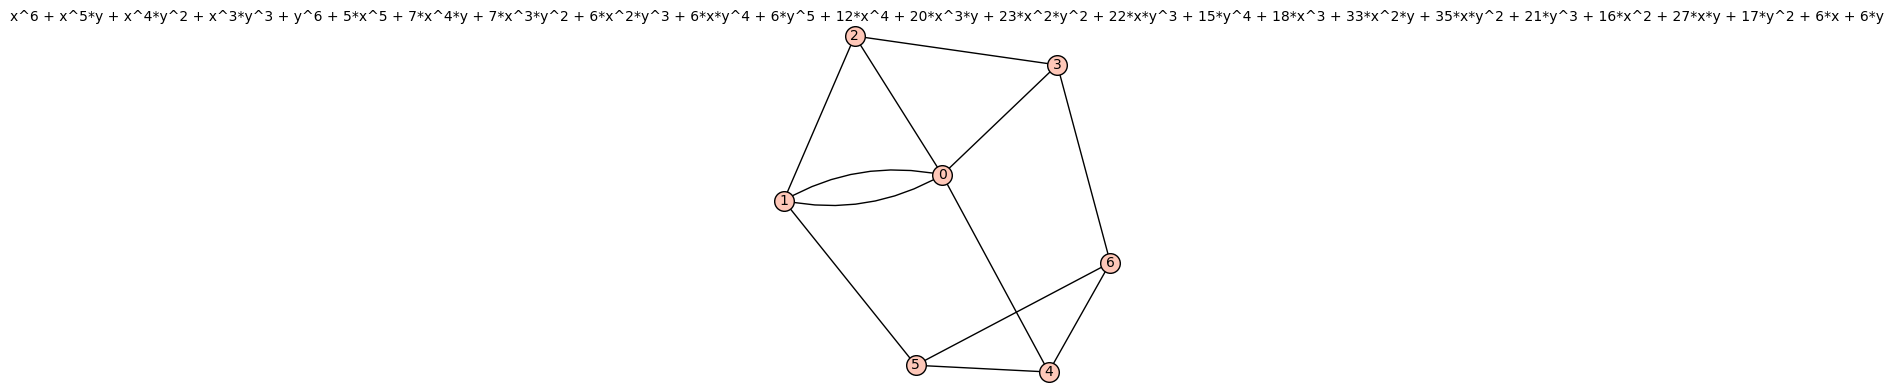

In [ ]:
tu_du_dict['I?qbC`OK?']

In [ ]:
tu_du_dict['J?BDC`GI?o?']

In [ ]:
deck(eq[0][0])

In [ ]:
deck(eq[0][1])

In [ ]:
g = g6ToMultigraph('H?qbC`O')
g.plot()

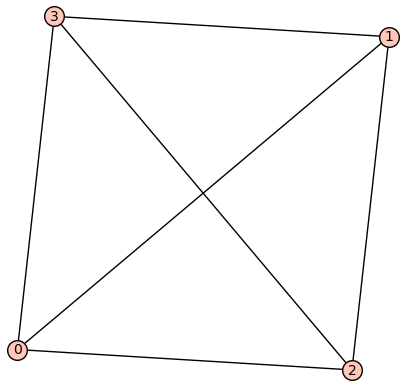

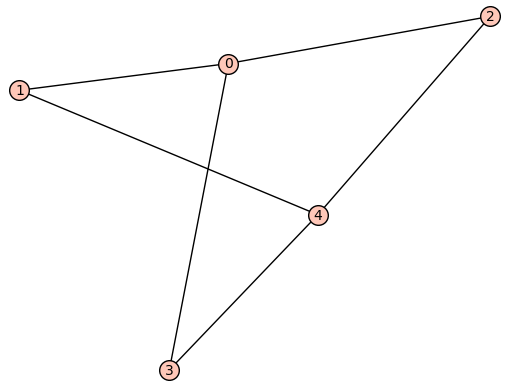

In [10]:
g6s = ['I?qbC`OK?', 'J?BDC`GI?o?']
k4 = g6ToMultigraph(g6s[0])
g2 = g6ToMultigraph(g6s[1])
k4.plot().show()
g2.plot().show()


In [ ]:
g2.plot().show()

In [ ]:
latex(g2)

In [ ]:
q = f"select graph6, label from TP where vertices>=6 and n_deck>0 and label!={UNIQ}"
print("non tutte unique but has deck")
result = cur.execute(q).fetchall()

In [ ]:
q = f"select count(*) from TP where n_deck>0 and label={TWO_CUT_TWST}"
print("non tutte unique but has deck")
result = cur.execute(q).fetchall()

In [ ]:
result

In [ ]:
q = f"select graph6 from TP where label={TWO_CUT_TWST}"
print("non tutte unique but has deck")
result = cur.execute(q).fetchall()

In [ ]:
len(result)

In [ ]:
gs = [i[0] for i in result]

In [ ]:
plotGraphsFromG6(gs[10000:10010])

In [ ]:
g = g6ToMultigraph("K?BED@OK@OB?")
g.plot().show()

In [ ]:
g.edges()

In [ ]:
deck("K?BED@OI@OB?")

In [ ]:
wt1 = graphs.CycleGraph(8)
wt1.add_edges([(0,6), (1,6), (1,3), (1,4), (4,6)])
wt1.plot().show()

wt2 = graphs.CycleGraph(8)
wt2.add_edges([(0,6), (1,6), (2,4), (1,4), (4,6)])
wt2.plot().show()

print(wt1.edges())
deck(wt1)



In [ ]:
def is_simple(g):
    mg = g6ToMultigraph(g)
    sg = mg.to_simple()
    return mg.num_edges() == sg.num_edges()

sg = filter(is_simple, gs)





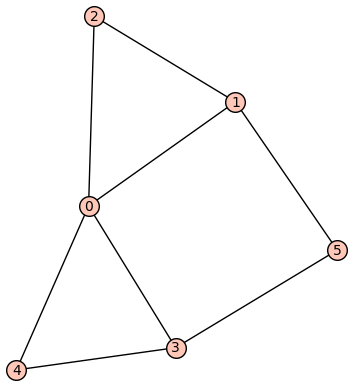

In [49]:
s = 'M??ED@_cCOB?P?D??'
g = g6ToMultigraph(s)
g.plot().show()

In [ ]:
missing_g = []
for g in gs:
    del_cards, con_cards = deck(g)
    missing = 0
    for i in range(len(del_cards)):
        if del_cards[i] == "" and con_cards[i] == "":
            missing += 1
    if missing <= 2:
        missing_g.append(g)
        print(missing_g)
    

In [ ]:
plotGraphsFromG6(missing_g)

In [6]:
def to_unique_deck(del_cards, con_cards):
    result_deck = []
    for i in range(len(del_cards)):
        if not del_cards[i] and con_cards[i]:
            result_deck.append(con_cards[i])
        elif not con_cards[i] and del_cards[i]:
            result_deck.append(del_cards[i])
        elif (con_cards[i] and del_cards[i]) or not (con_cards[i] and del_cards[i]):
            raise ValueError 
    return result_deck

In [ ]:
def missing_card(del_cards, con_cards):
    missing_idx = []
    for i in range(len(del_cards)):
        if not del_cards[i] and not con_cards[i]:
            missing_idx.append(i)
    return missing_idx

In [ ]:
missing_d = {} # g :[missing idx]
for g in missing_g:
    del_cards, con_cards = deck(g)
    missing_d[g] = missing_card(del_cards, con_cards)
    

In [ ]:
for g6 in missing_d:
    g = g6ToMultigraph(g6)
    eds = g.edges()
    for i in missing_d[g6]:
        print(eds[i])
    g.plot().show()

In [ ]:
cur = D.get_cursor()
q = f"select graph6, del_cards, con_cards from TP where label={UNIQ} and n_deck=1"
result = cur.execute(q).fetchall()

In [ ]:
g6, dc, cc = list(zip(*result))

In [ ]:
g_with_dc = []
for i, d in enumerate(dc):
    if len(list(filter(len, d.split(",")))) > 0:
        g_with_dc.append(g6[i])

In [ ]:
result_with_dc = []
for item in result:
    if len(list(filter(len, item[1].split(",")))) > 0 and len(list(filter(len, item[2].split(",")))) > 0:
        result_with_dc.append(item)

In [ ]:
len(g_with_dc), len(g6),len(result_with_dc)

In [ ]:
tutte_unique_has_deck = result

In [ ]:
tutte_unique_has_unique_deck = result

In [ ]:
tutte_unique_has_unique_deck_, del_cards, con_cards = zip(*result)

In [ ]:
tutte_unique_has_unique_deck_d = {} # {g : [deck of cards]}
for i,g in enumerate(tutte_unique_has_unique_deck_):
    tutte_unique_has_unique_deck_d[g] = to_unique_deck(del_cards[i].split(","), con_cards[i].split(","))

In [ ]:
tutte_unique_has_unique_deck_[10]

In [ ]:
g6 = tutte_unique_has_unique_deck_[100]
plotGraphsFromG6([g6])
plotGraphsFromG6(tutte_unique_has_unique_deck_d[g6])

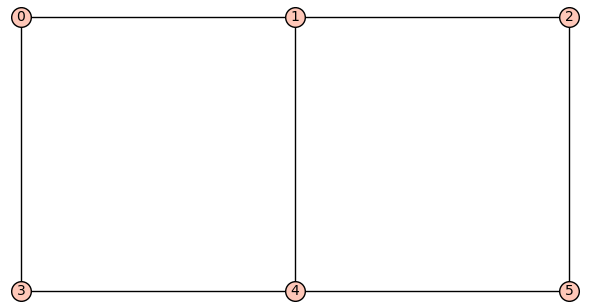

In [16]:
lad = graphs.LadderGraph(3)
lad.plot().show()
del_cards, con_cards = get_deck(lad)

In [17]:
del_cards, con_cards

(['', '', '', 'K??ED@OI?g@_', '', '', ''],
 ['J?BDBAOQ?o?',
  'J?BDBAOQ?o?',
  'J?BDBAOQ?o?',
  '',
  'J?BDBAOQ?o?',
  'J?BDBAOQ?o?',
  'J?BDBAOQ?o?'])

In [ ]:
def get_deck_graphs(g6):
    if isinstance(g6, str):
        g = g6ToMultigraph(g6)
    else:
        g = g6
        
    g_del = []
    g_ctc = []
    for e in g.edges():
        cp = Graph(g)
        cp.delete_edge(e)
        g_del.append(cp)
        
        cp.add_edge(e)
        cp.contract_edge(e)
        g_ctc.append(cp)
    return g_del, g_ctc

In [22]:
def get_n_deck(g_del, g_ctc):
    n = 1
    for i in range(len(g_del)):
        if not g_del[i] and not g_ctc[i]:
            return 0
        if g_del[i] and g_ctc[i]:
            n = n * 2
    return n

def to_unique_deck(del_cards, con_cards):
    assert isinstance(del_cards, list)
    result_deck = []
    for i in range(len(del_cards)):
        if not del_cards[i] and con_cards[i]:
            result_deck.append(con_cards[i])
        elif not con_cards[i] and del_cards[i]:
            result_deck.append(del_cards[i])
        elif (con_cards[i] and del_cards[i]):
            raise ValueError(f"not unique deck, repeted card at index {i}, {del_cards} {con_cards}")
        elif not (con_cards[i] and del_cards[i]):
            raise ValueError(f"no deck exists, missing card at index {i}")
    return result_deck

# given a deck check if it is one of the combination of del_cards and con_cards
# del_cards = [1,2,3] con_cards=[4,5,6] deck=[5,6,1], return True
# del_cards = [1,2,3] con_cards=[4,5,6] deck=[1,4,5], return False
def check_deck(del_cards, con_cards, deck_to_check):
    assert len(del_cards) == len(deck_to_check)
    
    for card in deck_to_check:
        if card in del_cards:
            idx = del_cards.index(card) #  index of first occurrence of del_card
            del_cards.pop(idx)
            con_cards.pop(idx)
        elif card in con_cards:
            idx = con_cards.index(card) #  index of first occurrence of del_card
            del_cards.pop(idx)
            con_cards.pop(idx)
        else:
            return False
    return True

assert check_deck([1,2,2], [4,5,5], [2,2,5]) == False
assert check_deck([1,2,3], [4,5,6], [1,2,4]) == False
assert check_deck([1,2,3], [4,5,6], [1,2,6]) == True
assert check_deck([1,1,1], [0,0,0], [1,1,1]) == True

# fixed_ends=['a', 'b', 'c']
# new_ends=[1, 2]
# all_combinations = 
# [[('a', 1), ('b', 1), ('c', 1)],
#  [('a', 1), ('b', 1), ('c', 2)],
#  [('a', 1), ('b', 2), ('c', 1)],
#  [('a', 1), ('b', 2), ('c', 2)],
#  [('a', 2), ('b', 1), ('c', 1)],
#  [('a', 2), ('b', 1), ('c', 2)],
#  [('a', 2), ('b', 2), ('c', 1)],
#  [('a', 2), ('b', 2), ('c', 2)]]

def get_all_combinations(fixed_ends, new_ends, new_edges, all_combinations):
    if not fixed_ends:
        all_combinations.append(new_edges)
        return

    for n_end in new_ends:
        get_all_combinations(fixed_ends[1:], new_ends, new_edges+[(fixed_ends[0], n_end)], all_combinations)
    return all_combinations
            
    
# split vertex v into two vertices
# return a list of non-isomorphic biconnected graphs
def reverse_contract(g):
    processed_graphs = []
    w = g.num_verts() # the new vertex
    
    for v in g.vertices():
        old_edges = g.edges_incident(v) # edges incident to v needs to chose between v and w
        fixed_ends = [e[0] if e[0]!=v else e[1] for e in old_edges]
        new_g = Graph(g)
        new_g.delete_edges(old_edges)
        new_g.add_edge(v, w)

        all_combinations = get_all_combinations(fixed_ends, [v, w], [], [])
        
        for edges in all_combinations[1:-1]: # ignore first one and last one, they are one-connected
            processed = False
            new_g.add_edges(edges)
            add_to(new_g, processed_graphs)
#             for processed_g in processed_graphs:
#                 if new_g.is_isomorphic(processed_g):
#                     processed = True
#                     break
#             if not processed:
#                 # DO SOMETHING
#                 processed_graphs.append(Graph(new_g))
            new_g.delete_edges(edges)
    return processed_graphs

# check if new_g is non-isomprhic to any graphs in result
# add it to result if it is
def add_to(new_g, result):
    repeated = False
    for g in result:
        if new_g.is_isomorphic(g):
            repeated = True
            break
    if not repeated:
        result.append(Graph(new_g))
        
# given a deck of card and number of vertices
# find the graphs that has the deck as its deck
# one-connect graph has no deck (PROOF)
def deckToGraph(deck):
    deck.sort() # sort for comparison
    deck_g = [g6ToMultigraph(g6) for g6 in set(deck)] # avoid calculating isomorphic cards
    cards_n = [g.order() for g in deck_g] # the number of vertices of each unique card
    result = []
    
    uniq_cards_n = list(set(cards_n))
    uniq_cards_n.sort()

    if len(uniq_cards_n) == 2: # we can distinguish a card is a del_card or a con_card
        con_n, del_n = uniq_cards_n
        assert del_n == con_n + 1 # |V| of a con_card is 1 smaller than |V| of a del_card
    else: # all the cards having same num_verts
        con_n = uniq_cards_n[0]
        del_n = uniq_cards_n[0]
        
    # DELETION CARDS
    del_indices = [i for i, x in enumerate(cards_n) if x == del_n] # indices of unique deletion cards
    for del_index in del_indices:
        del_card_g = Graph(deck_g[del_index]) # pick a del_card graph and make a copy
        del_card_vertices = del_card_g.vertices()

        for i in range(del_n-1):
            for j in range(i+1, del_n):
                u, v = (del_card_vertices[i], del_card_vertices[j])
                del_card_g.add_edge((u, v)) # add edge
                d, c = get_deck(del_card_g)
                if get_n_deck(d, c) == 1:
                    deck_to_check = to_unique_deck(d, c)
                    deck_to_check.sort()
                    if (deck_to_check == deck):
                        add_to(del_card_g, result)
                elif check_deck(d, c, deck):
                    add_to(del_card_g, result)
                del_card_g.delete_edge(u, v) # delete added edge
    # CONTRACTION CARDS
    con_indices = [i for i, x in enumerate(cards_n) if x == con_n] # indices of unique deletion cards
    for con_index in con_indices:
        reverse_contract_graphs = reverse_contract(Graph(deck_g[con_index]))
        for rcg in reverse_contract_graphs:
            d, c = get_deck(rcg)
            if get_n_deck(d, c) == 1:
                deck_to_check = to_unique_deck(d, c)
                deck_to_check.sort()
                if (deck_to_check == deck):
                    add_to(rcg, result)
            elif check_deck(d, c, deck):
                    add_to(rcg, result)
    return result


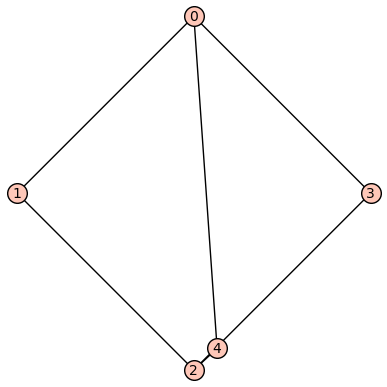

['', '', '', '', '', ''] ['H?qbC`O', 'H?qbC`O', 'H?qbC`O', 'H?qbC`O', 'H?qbC`O', 'H?qbC`O']


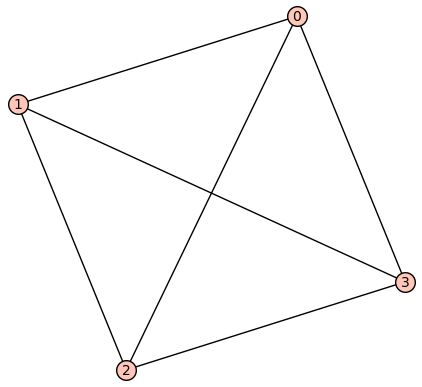

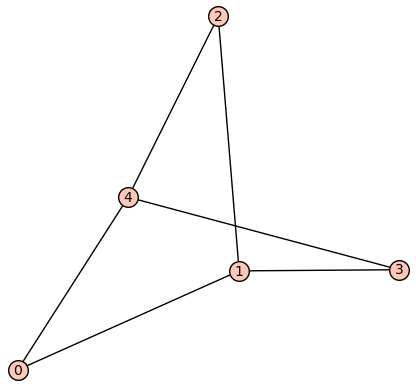

In [165]:
g = graphs.CycleGraph(4)
g.add_edges([(0,4), (2,4)])
g.plot().show()
d, c = get_deck(g)
print(d, c)
deck = to_unique_deck(d, c)
result = deckToGraph(deck)
for dg in result:
    dg.plot().show()

['H?qbC`O', 'H?qbC`O', 'H?qbC`O', 'H?qbC`O', 'H?qbC`O', 'H?qbC`O']


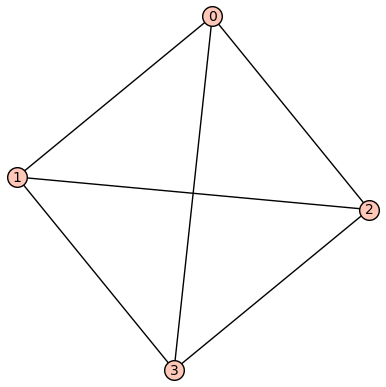

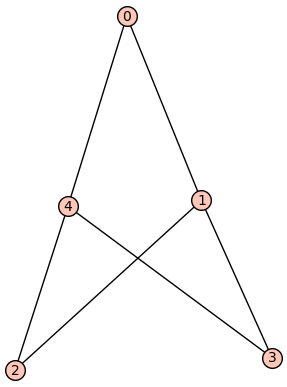

In [164]:
print(deck)


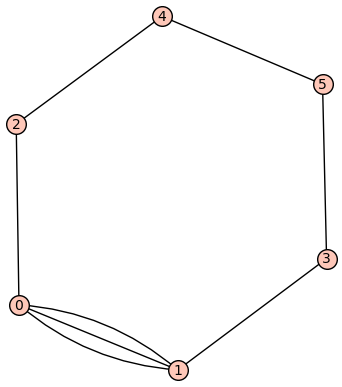

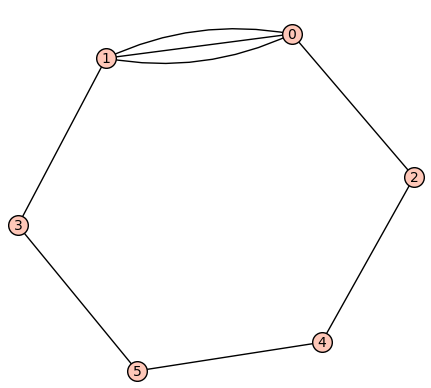

In [111]:
g6 ='M??EEB?gA_D?D?B??'
g = g6ToMultigraph(g6)
g.plot().show()
d, c = get_deck(g)
deck = to_unique_deck(d, c)
for dg in deckToGraph(deck):
    dg.plot().show()

In [53]:
list(tu_du_dict.keys())[:100]

['EEh_',
 'FEqb?',
 'G?qa`_',
 'H?rDA_o',
 'H?qbC`O',
 'I?BDA_gE?',
 'HErED@_',
 'HErDD@_',
 'HEqdB@_',
 'I?rED@OK?',
 'I?rDBAOS?',
 'I?rDBAOK?',
 'J?BED@OI?o?',
 'J?BDBAOQ?o?',
 'J?BDC`GI?o?',
 'K??ED@OI?g@_',
 'IErEEA_W?',
 'IErEDA_W?',
 'IErDDA_W?',
 'IErDD@_W?',
 'J?rEEA_S@_?',
 'J?rED@_cA_?',
 'J?rED@_c@_?',
 'J?rDD@_cA_?',
 'K?BEEA_S@OB?',
 'K?BED@_cAOB?',
 'K?BED@_c@OB?',
 'K?BEDAOQ@OB?',
 'K?BDBAOSCOH?',
 'K?BDBAOSCOD?',
 'L??EEA_S@OA_B?',
 'L??ED@_cAOA_B?',
 'L??EDAOQ@OG_D?',
 'L??EDAOQ@OA_B?',
 'M???EA_S@OA_A_@_?',
 'JErEEB?gB??',
 'JErEEA_gB??',
 'JErEDA_gB??',
 'JErEDA_WB??',
 'JErDDA_WB??',
 'K?rEEB?gA_E?',
 'K?rEEA_WC_I?',
 'K?rEEA_WC_E?',
 'K?rEDA_WC_I?',
 'K?rEDA_WC_E?',
 'K?rDD@_WC_I?',
 'K?rDD@OS@_E?',
 'K?rDBAOS@_E?',
 'L?BEEB?gA_D?E?',
 'L?BEEA_WC_H?E?',
 'L?BEEA_WC_D?E?',
 'L?BEEA_cAOD?E?',
 'L?BEDA_WC_H?E?',
 'L?BEDA_S@_H?I?',
 'L?BED@_cA_P?Q?',
 'L?BED@_cA_P?I?',
 'L?BED@_c@_P?I?',
 'M??EEB?gA_D?D?B??',
 'M??EEA_WC_H?D?B??',
 'M??EEA_WC_D?D?B??',
 'M??EEA_cAOD?P?

In [ ]:
processed = 0
reconstructed = {} # g6:[G]
for g6, dc, cc in result_with_dc[:100]:
    deck = to_unique_deck(dc.split(","), cc.split(","))
    reconstructed[g6] = deckToGraph(deck, 0)
    processed += 1
#     if processed % 100 == 0:
    print(processed)
    

In [ ]:

for e in g.edges():
    cp = Graph(g)
    cp.contract_edge(e)
    
    s = str(cp.tutte_polynomial())
    cp.plot().show(title=s)

In [ ]:
cur = D.get_cursor()
q = f"select graph6, del_cards,con_cards,n_deck from TP where tutte_polynomial='{check_tp}'"
print(cur.execute(q).fetchall())
# get_tutte_eq_graphs()

In [ ]:
#[(8363193,)]
g6_m6

In [ ]:
g6_to_fix = [i[0] for i in g6_m6]
plotGraphsFromG6(g6_to_fix)

In [ ]:
to_fix = []
for item in g6_m6:
    g6=item[0]
    dc, cc = get_deck(g6)
    dc = ",".join(dc)
    cc = ",".join(cc)
    if dc!=item[3] or cc!=item[4]:
        to_fix.append(g6)
        print(g6, dc, cc, item[3], item[4])

In [ ]:
for g6 in to_fix:
    dc, cc = get_deck(g6)
    n_deck = get_n_deck(dc, cc)
    dc = ",".join(dc)
    cc = ",".join(cc)
    
    q = f'UPDATE TP SET del_cards="{dc}", con_cards="{cc}", n_deck={n_deck} WHERE graph6="{g6}"'
    cur.execute(q)

In [ ]:
plotGraphsFromG6(["F]rE?"])
g = g6ToMultigraph("F]rE?")
g.number_of_loops() == g.num_edges()

In [ ]:
get_deck("HErEEA_")

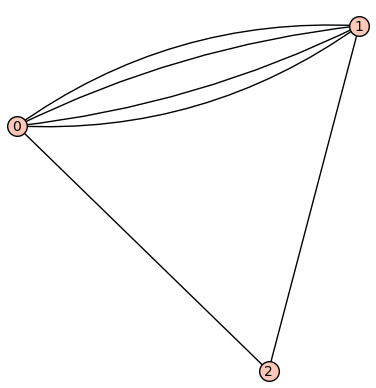

In [32]:
g = g6ToMultigraph("HErED@_")
g.plot().show()

In [123]:

check_deck([1,2,3], [4,5,6], [1,2],[5])

True

In [82]:
q = f"select graph6, del_cards, con_cards from TP where n_deck > 1 and label={UNIQ}"
print("tutte unique but more than 1 deck")
result = cur.execute(q).fetchall()

tutte unique but more than 1 deck


In [155]:
g6, d, c = result[100]
d = d.split(",")
c = c.split(",")
deck = []
con = []
for i, card in enumerate(d):
    if card:
        deck.append(card)
    else:
        deck.append(c[i])
        con.append(c[i])

In [158]:
g = deckToGraph(deck)

In [162]:
g[0].is_isomorphic(g6ToMultigraph(g6))

True

In [136]:
for g6, d, c in result:
    d=d.split(",")
    c=c.split(",")
    d_cs = list(zip(d,c))
    d_cs.sort()
    for i in range(len(d)-1):
        if d_cs[i][0] and d_cs[i][0] == d_cs[i+1][0] and d_cs[i][1] != d_cs[i+1][1]:
            print(d_cs)
            print(i)
print("done")

done


In [137]:
len(result)

16146

In [129]:
g,d,c=result[1]

In [131]:
g

'D]o'

In [132]:
d

'C],C],C]'

In [53]:
processed_count = 0
failed_to_reconstruct = [] # graphs that failed to be reconstructed from its unique deck
for g6 in tu_du_dict:    
    reconstructed_graphs = deckToGraph(tu_du_dict[g6])
    if len(reconstructed_graphs) != 1 or not reconstructed_graphs[0].is_isomorphic(g6ToMultigraph(g6)):
        print(g6)
        failed_to_reconstruct.append(g6)
    processed_count += 1
    if processed_count % 50 == 0:
        print(processed_count, "/10436")

KeyboardInterrupt: 

In [168]:
list(tu_du)[0]

'EEh_'

In [177]:
failed_to_reconstruct

['EEh_', 'HEqdB@_', 'J?BDC`GI?o?']

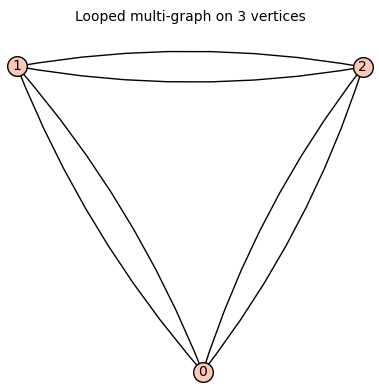

In [179]:
g6ToMultigraph('HEqdB@_')

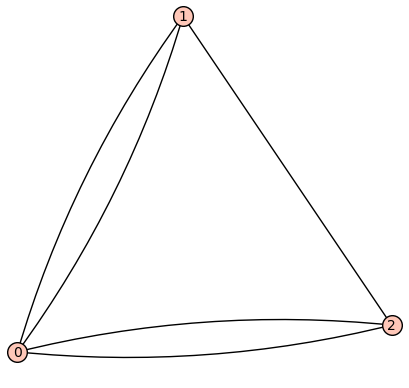

In [184]:
g6 = 'HEqdB@_'
d,c = get_deck(g6)
g6ToMultigraph(d[0]).plot().show()

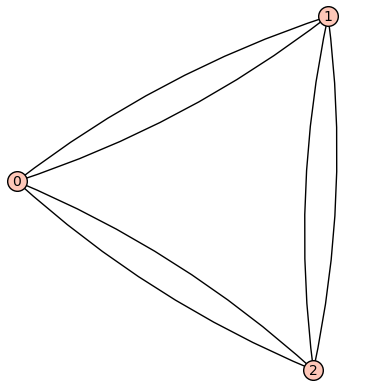

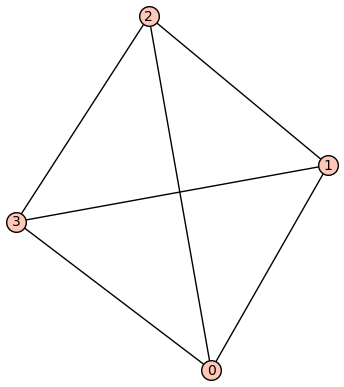

In [183]:
for g in deckToGraph(d):
    g.plot().show()

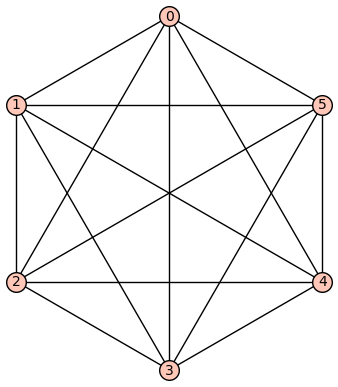

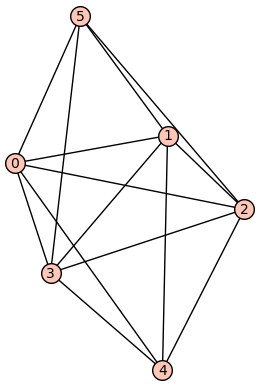

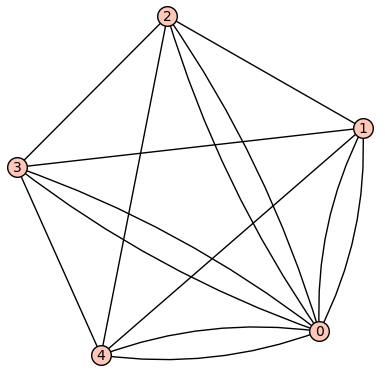

In [234]:
k5 = graphs.CompleteGraph(6)
k5.allow_multiple_edges(True)
k5.plot().show()
d, c = get_deck(k5)
g6ToMultigraph(d[0]).plot().show()
g6ToMultigraph(c[0]).plot().show()

In [235]:
fromkdelcards = deckToGraph(d)
fromkconcards = deckToGraph(c)

In [233]:
d,c
# len(fromkconcards), len(fromkdelcards)

(['S??ED@_cA_E?a?Q?D??o?`?@C?@G??g??',
  'S??ED@_cA_E?a?Q?D??o?`?@C?@G??g??',
  'S??ED@_cA_E?a?Q?D??o?`?@C?@G??g??',
  'S??ED@_cA_E?a?Q?D??o?`?@C?@G??g??',
  'S??ED@_cA_E?a?Q?D??o?`?@C?@G??g??',
  'S??ED@_cA_E?a?Q?D??o?`?@C?@G??g??',
  'S??ED@_cA_E?a?Q?D??o?`?@C?@G??g??',
  'S??ED@_cA_E?a?Q?D??o?`?@C?@G??g??',
  'S??ED@_cA_E?a?Q?D??o?`?@C?@G??g??',
  'S??ED@_cA_E?a?Q?D??o?`?@C?@G??g??',
  'S??ED@_cA_E?a?Q?D??o?`?@C?@G??g??',
  'S??ED@_cA_E?a?Q?D??o?`?@C?@G??g??',
  'S??ED@_cA_E?a?Q?D??o?`?@C?@G??g??',
  'S??ED@_cA_E?a?Q?D??o?`?@C?@G??g??',
  'S??ED@_cA_E?a?Q?D??o?`?@C?@G??g??'],
 ['N?BDBAOS@_P?Q?I?B??',
  'N?BDBAOS@_P?Q?I?B??',
  'N?BDBAOS@_P?Q?I?B??',
  'N?BDBAOS@_P?Q?I?B??',
  'N?BDBAOS@_P?Q?I?B??',
  'N?BDBAOS@_P?Q?I?B??',
  'N?BDBAOS@_P?Q?I?B??',
  'N?BDBAOS@_P?Q?I?B??',
  'N?BDBAOS@_P?Q?I?B??',
  'N?BDBAOS@_P?Q?I?B??',
  'N?BDBAOS@_P?Q?I?B??',
  'N?BDBAOS@_P?Q?I?B??',
  'N?BDBAOS@_P?Q?I?B??',
  'N?BDBAOS@_P?Q?I?B??',
  'N?BDBAOS@_P?Q?I?B??'])

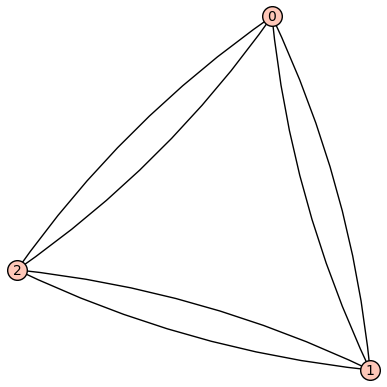

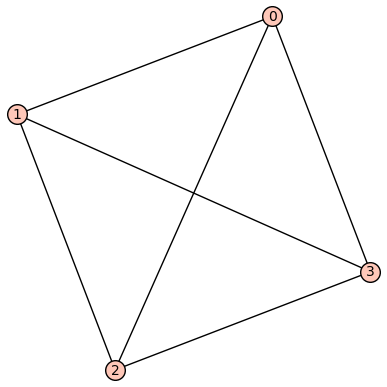

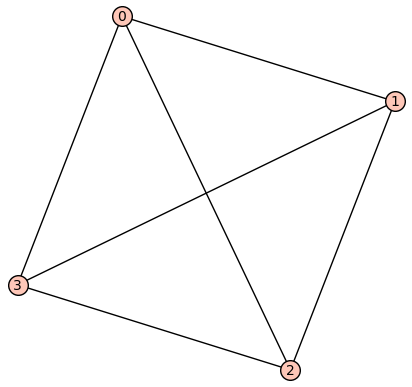

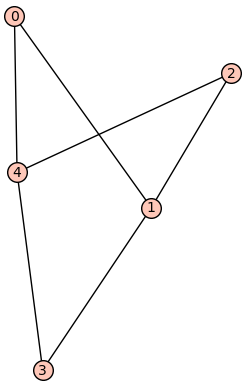

In [227]:
for g in fromkconcards:
    g.plot().show()
for g in fromkdelcards:
    g.plot().show()

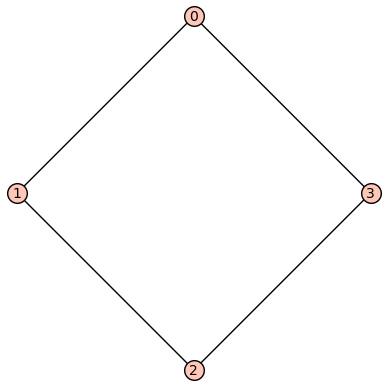

[Looped multi-graph on 4 vertices]

In [230]:
g = graphs.CycleGraph(4)
g.allow_multiple_edges(True)
g.plot().show()
d, c = get_deck(g)
deck = to_unique_deck(d, c)
deckToGraph(deck)

K?BED@_c@OB?


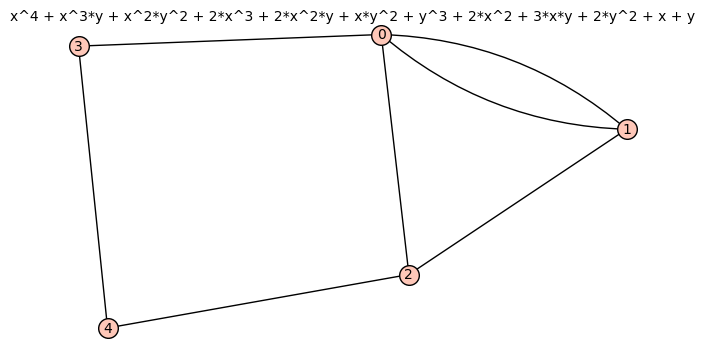

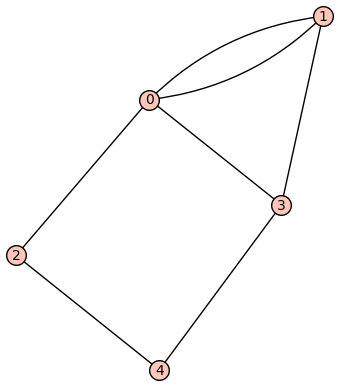

In [26]:
g6 ="K?BED@_c@OB?"
plotGraphsFromG6([g6])
d, c = get_deck(g6)
deck = to_unique_deck(d, c)
for g in deckToGraph(deck):
    g.plot().show()

In [37]:
g = graphs.CycleGraph(4)
g.allow_multiple_edges(True)
g.has_multiple_edges()
# g.add_edges([(0,4),(5,4), (5,2)])
# g.plot().show()
# get_graphs_by_tp(g.tutte_polynomial())

False

J?BDC`GI?o?


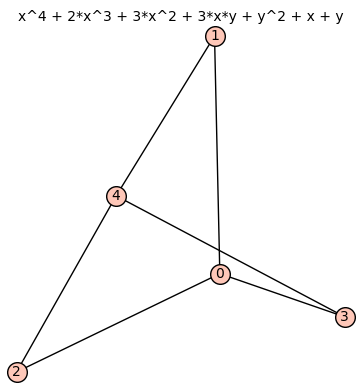

In [32]:
plotGraphsFromG6(['J?BDC`GI?o?'])

In [35]:
d, c =get_deck('L??EDAOQ@OA_B?')

In [36]:
deckToGraph(c)

[Looped multi-graph on 6 vertices]

In [67]:
q = f"select graph6, del_cards, con_cards from TP where n_deck = power(2,edges) and label={UNIQ}"
print("tutte unique but more than 1 deck")
result = cur.execute(q).fetchall()

tutte unique but more than 1 deck


In [66]:
import sqlite3
def sqlite_power(x,n):
    return int(x)**n
con = sqlite3.connect("TP.db")
con.create_function("power", 2, sqlite_power)
cur = con.cursor()

C]


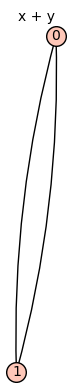

D]o


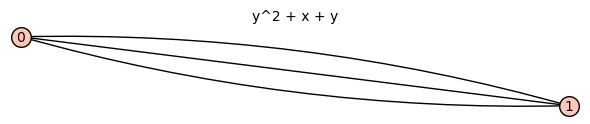

E]r?


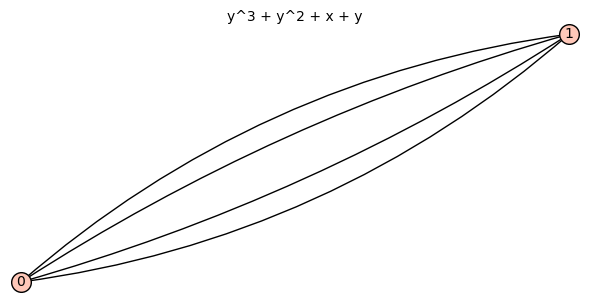

F]rE?


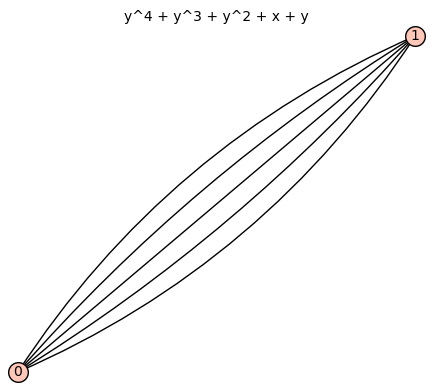

G]rEE?


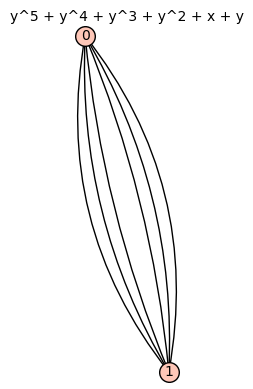

I?qbC`OK?


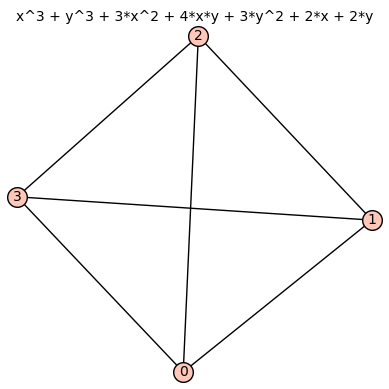

H]rEEB?


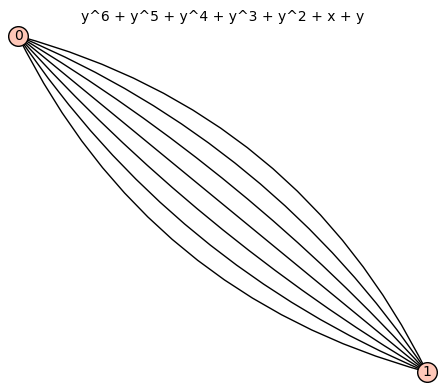

I]rEEB?o?


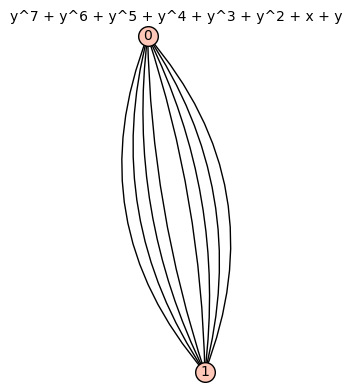

J]rEEB?oE??


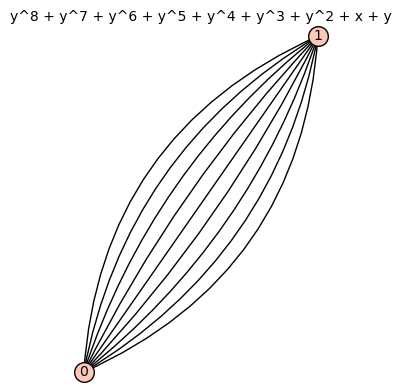

N??EDAOQ@OB?P?H?A_?


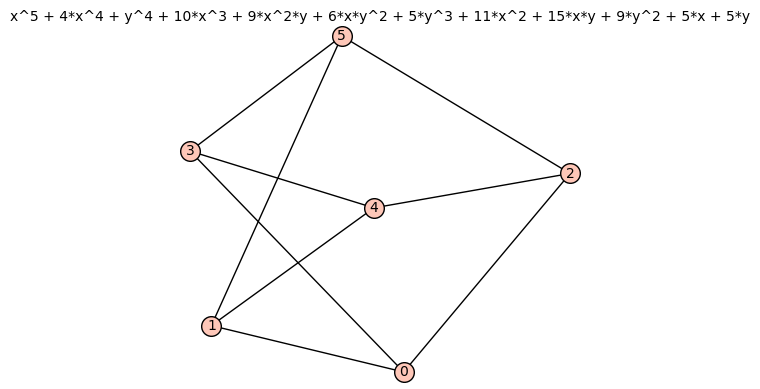

K]rEEB?oE?W?


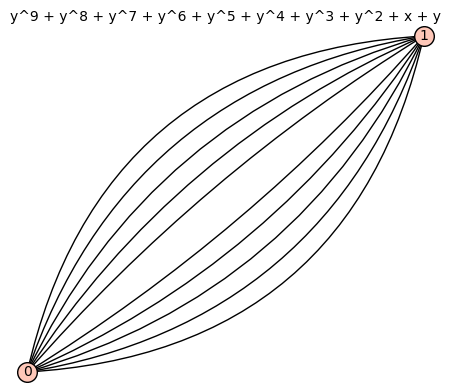

N?BDBAOS@_P?Q?I?B??


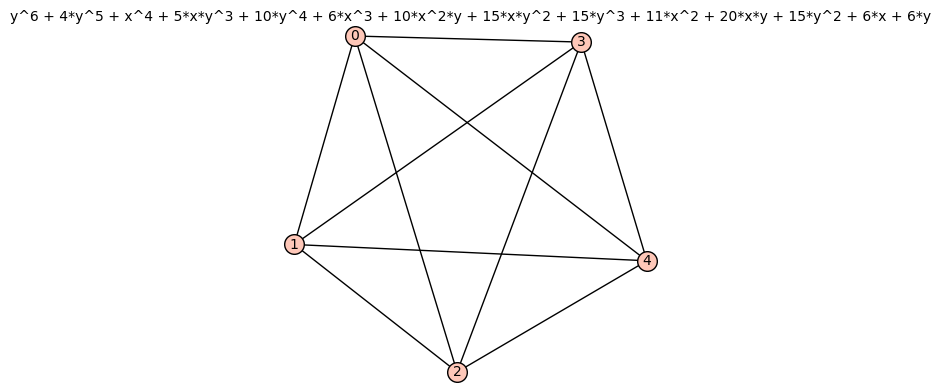

O??ED@_cA_D?E?H?A_?W?


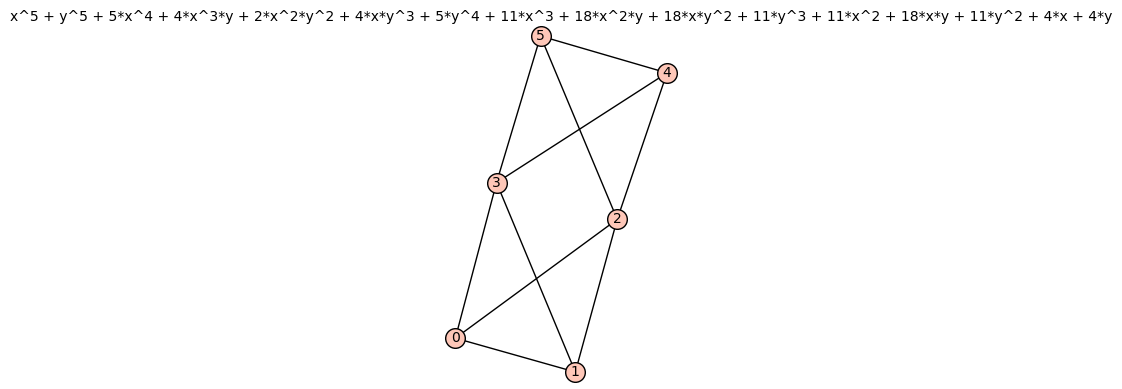

L]rEEB?oE?W?o?


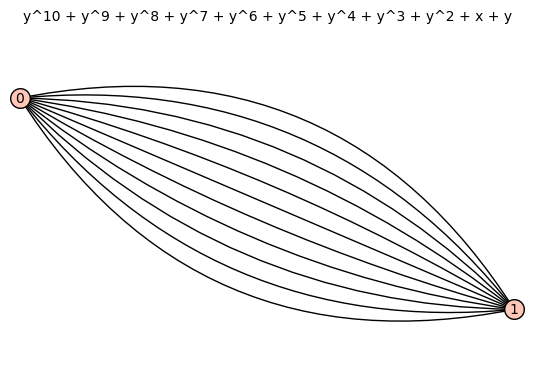

M]rEEB?oE?W?o?o??


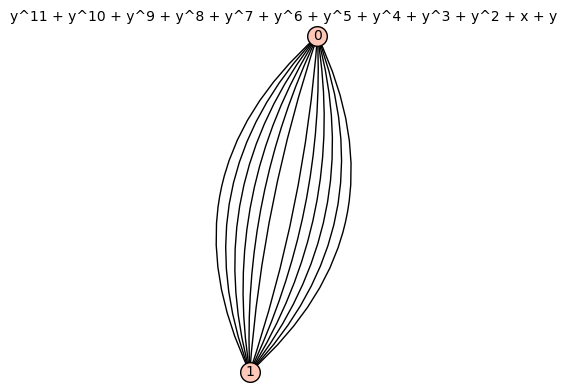

Q??ED@_cA_P?I?E?G_@G?D??K??


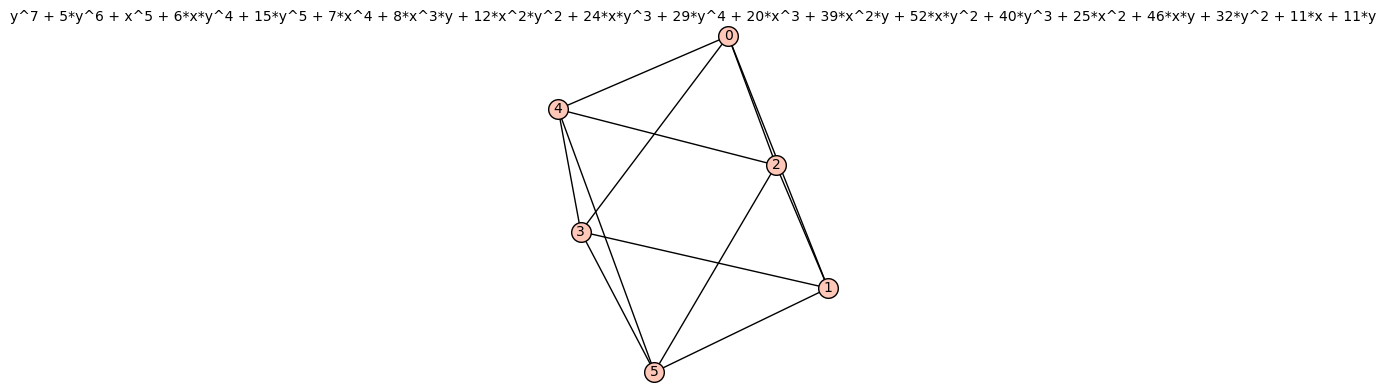

R???EA_cCOG_H?D?@_AC?G_?Q??S??


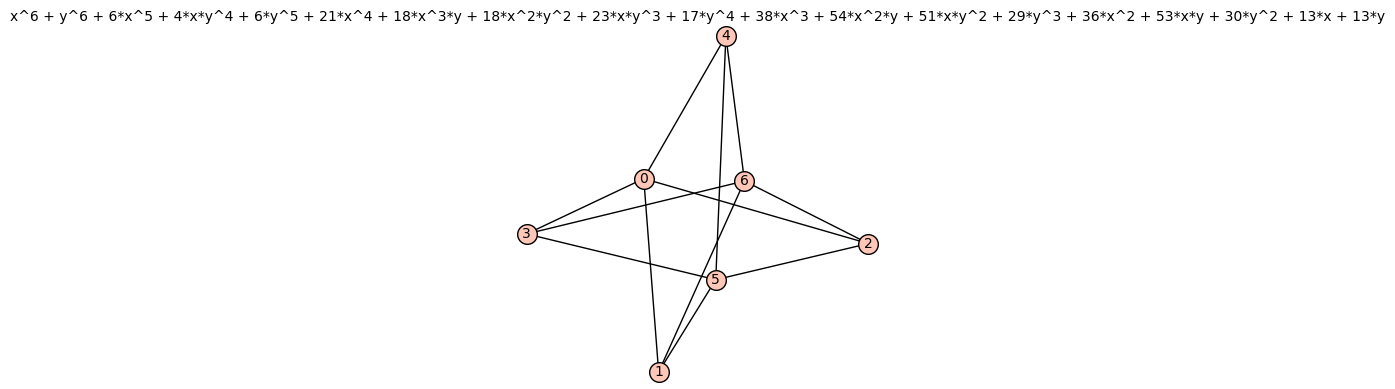

S????B?gC_H?I?P?A_@C?C_?H??I??E??


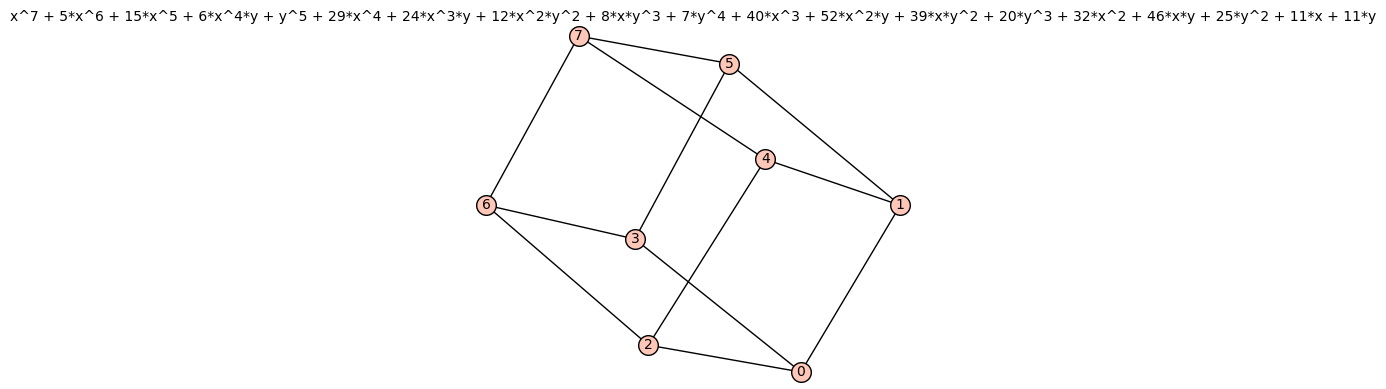

S????B?gC_H?I?P?A_@C?@_?P??Q??E??


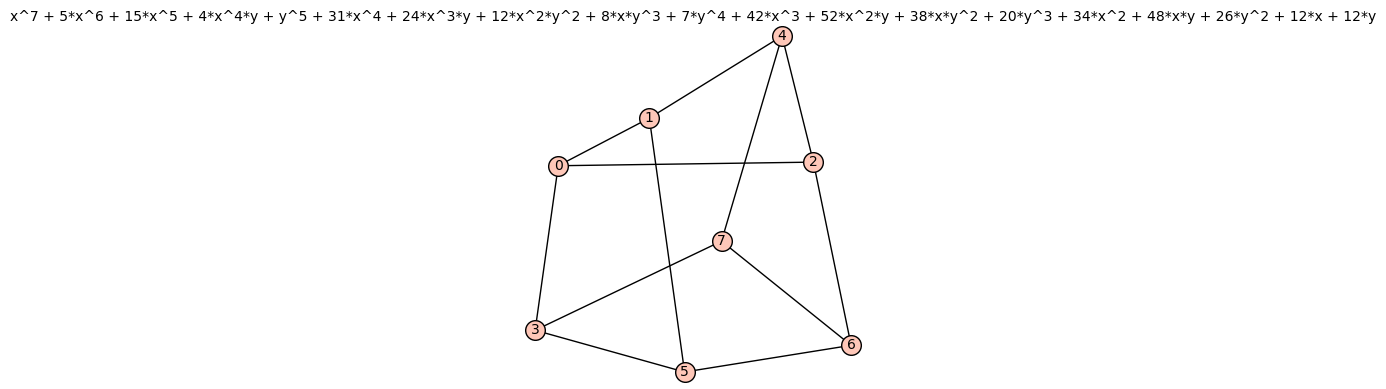

N]rEEB?oE?W?o?o?W??


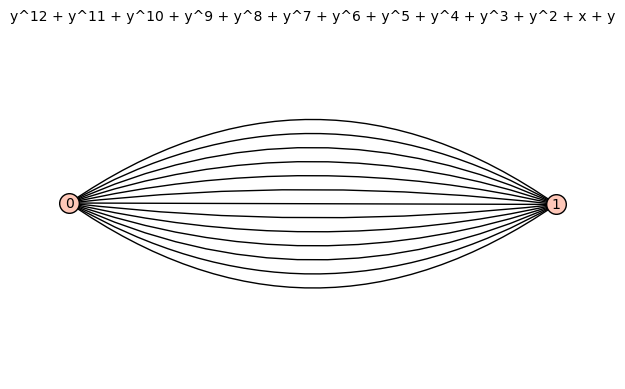

R??ED@_cA_E?a?Q?D?CG?P??S??W??


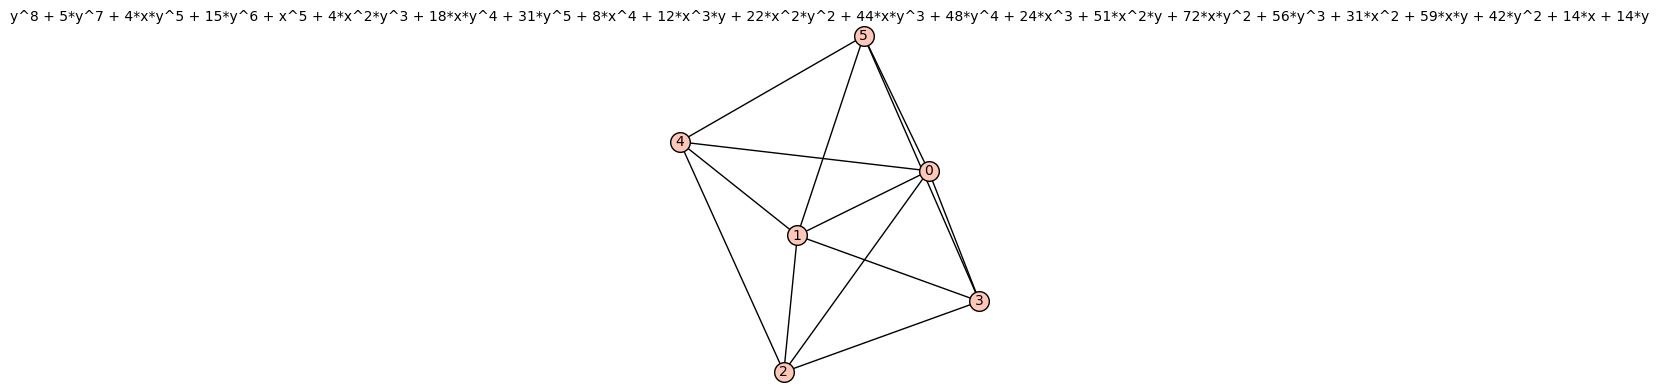

S???EA_WC_I?a?Q?C_?g?B??a??c??S??


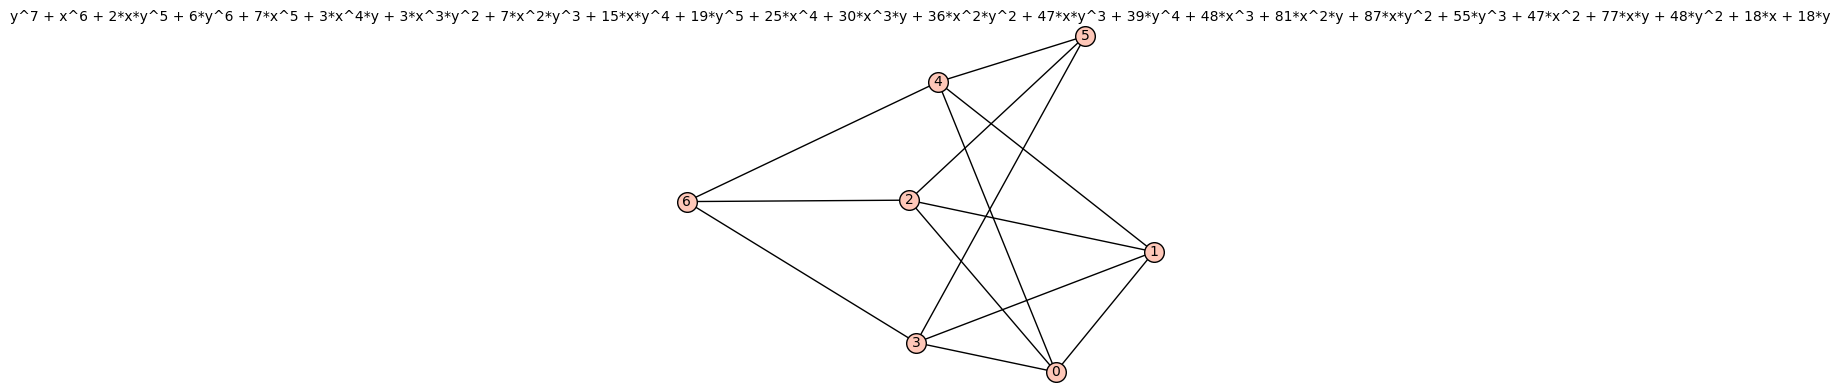

S???EA_WC_I?a?I?B?AG?B??a??c??K??


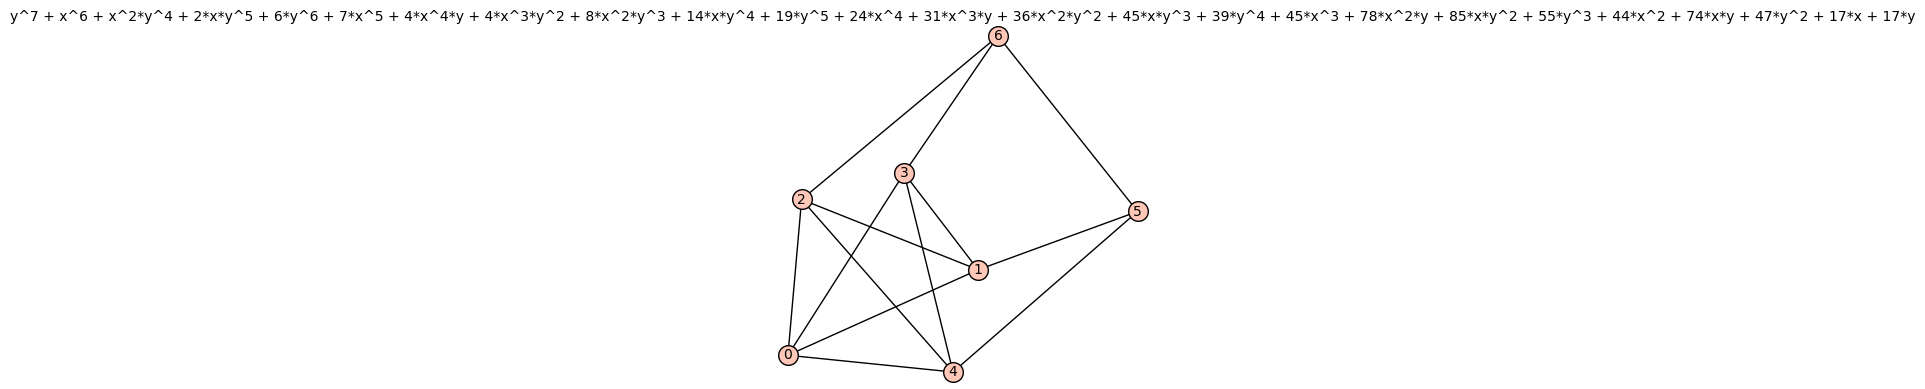

T????B?gB?Q?S?I?C_?c?A_?E??a??Q??D??


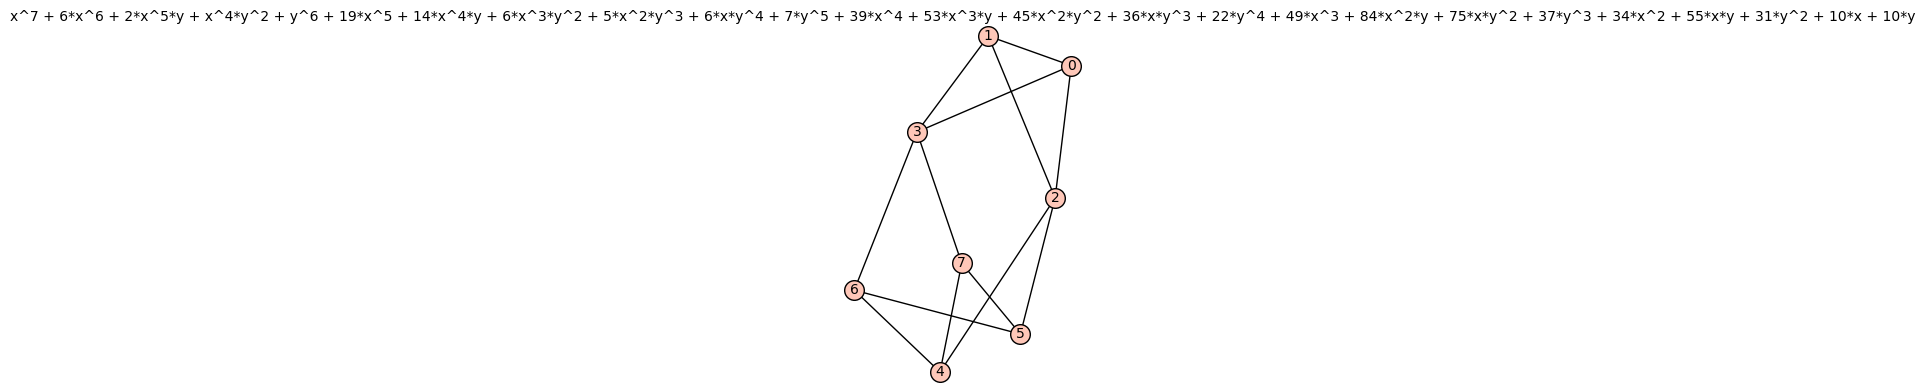

T????B?gC_P?P?H?A_?W?O_?a??a??Q??B??


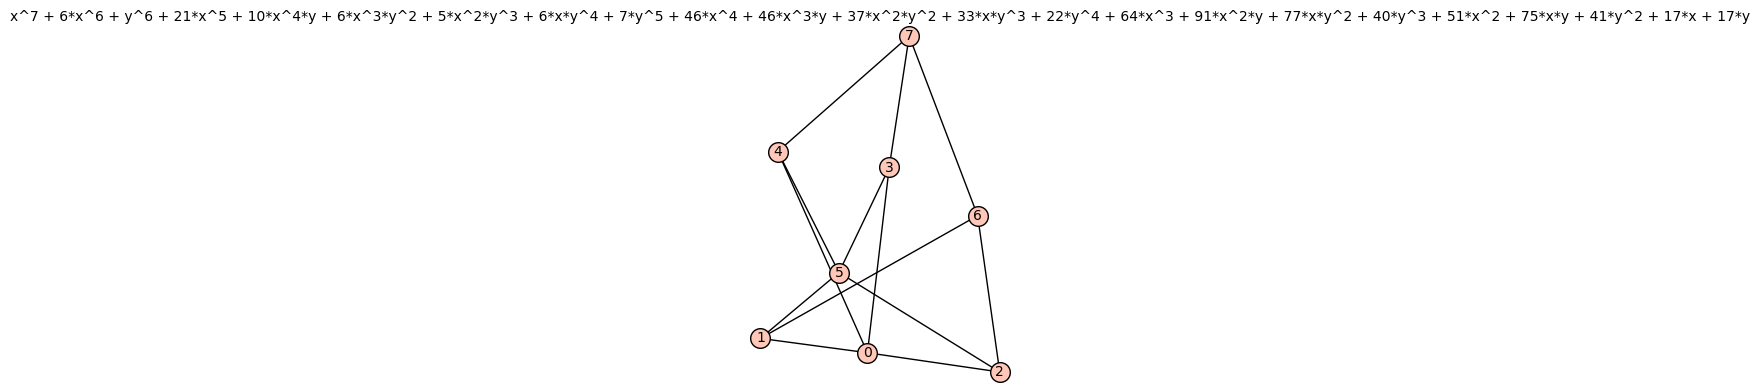

T????B?gC_P?P?H?A_AC?G_?I?AA??a??H??


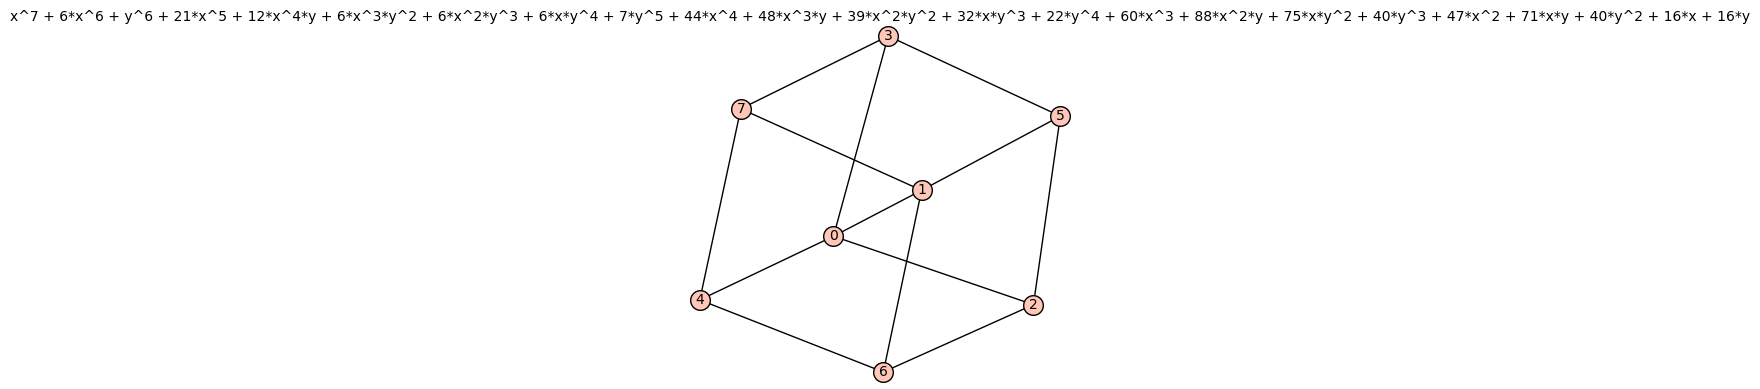

O]rEEB?oE?W?o?o?W?E??


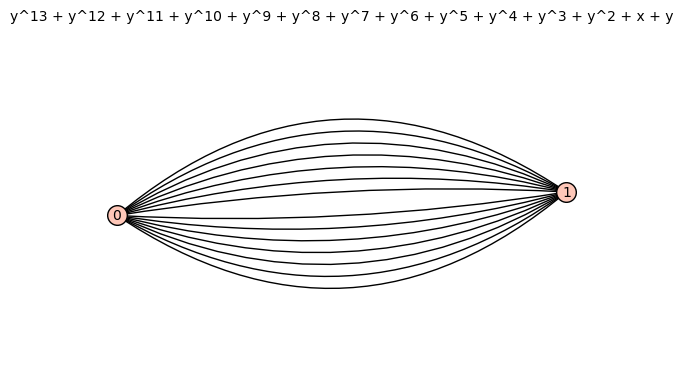

S??ED@_cA_E?a?Q?D??o?`?@C?@G??g??


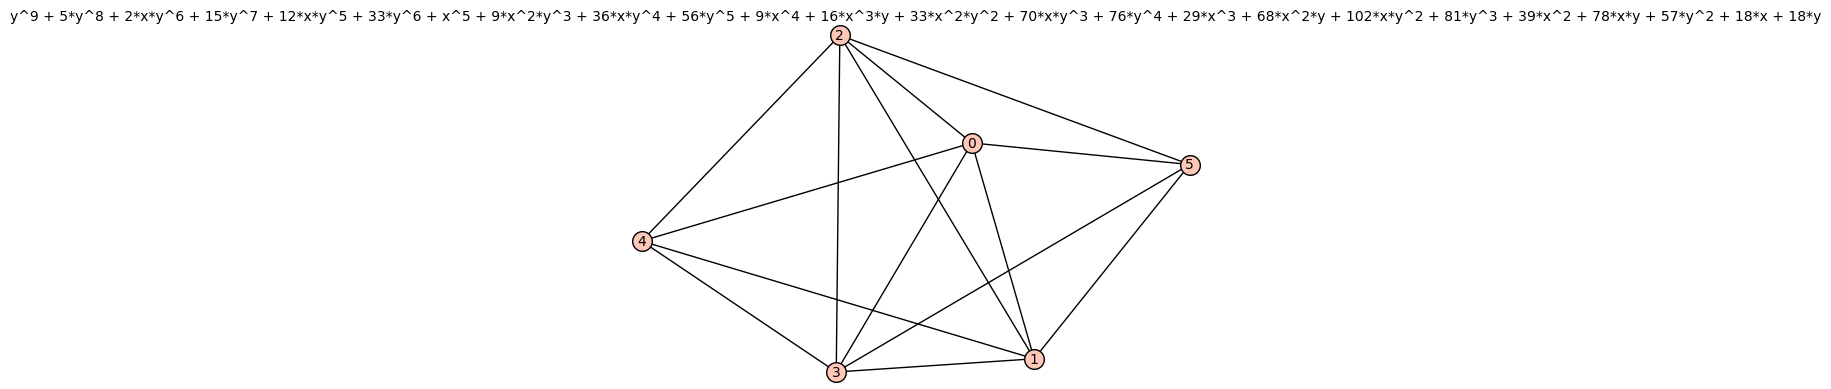

T???EA_WC_I?K?a?H?@O?D??K??c??S??E??


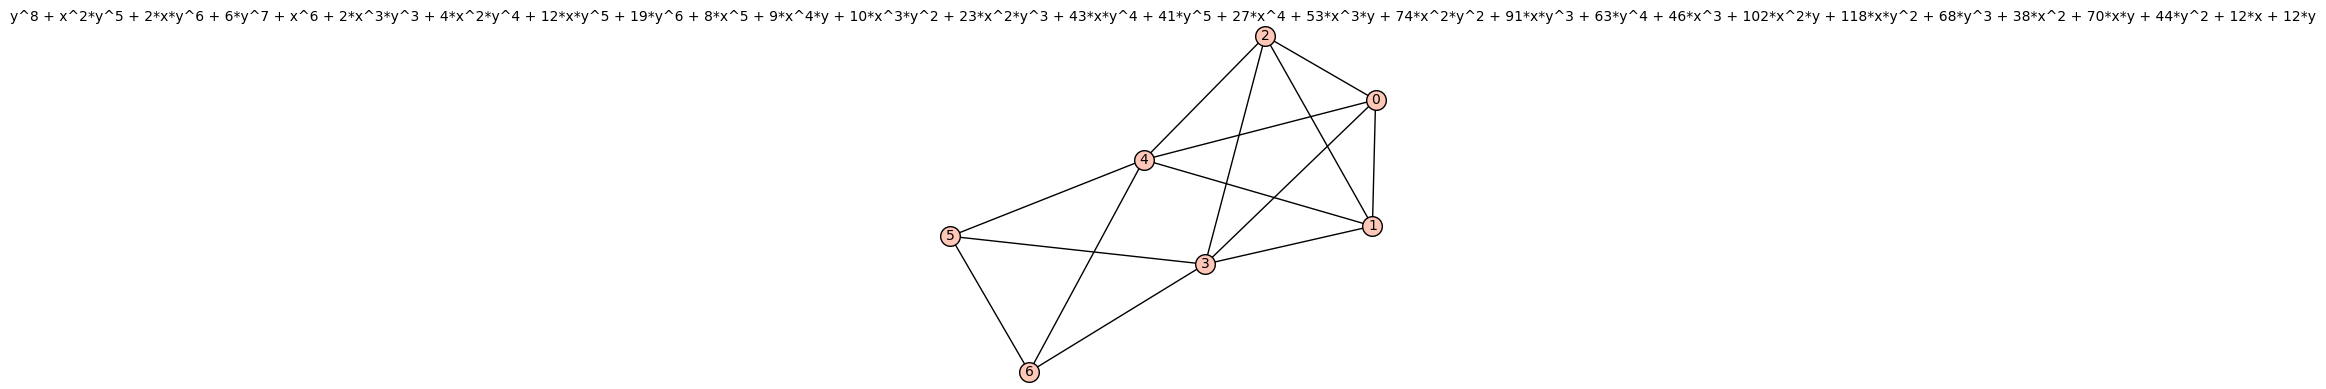

T???EA_WC_I?a?Q?O_@G?D??K?@C??c??I??


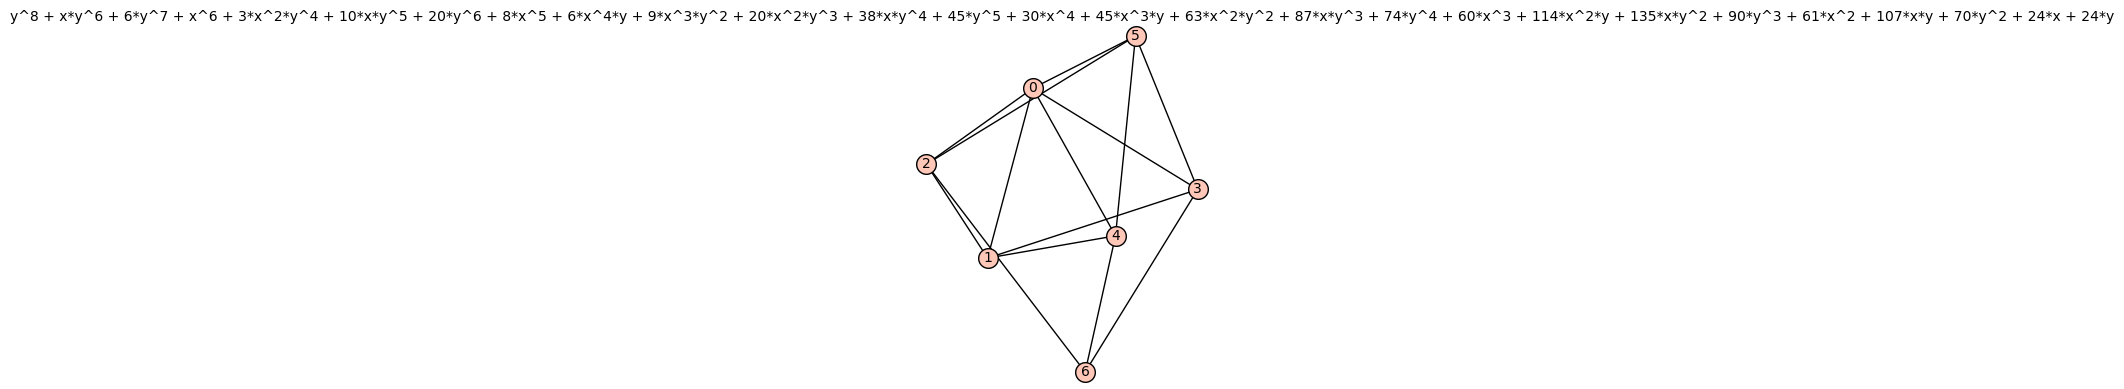

T???EA_WC_I?a?Q?C_?g?B??a??c??S??E??


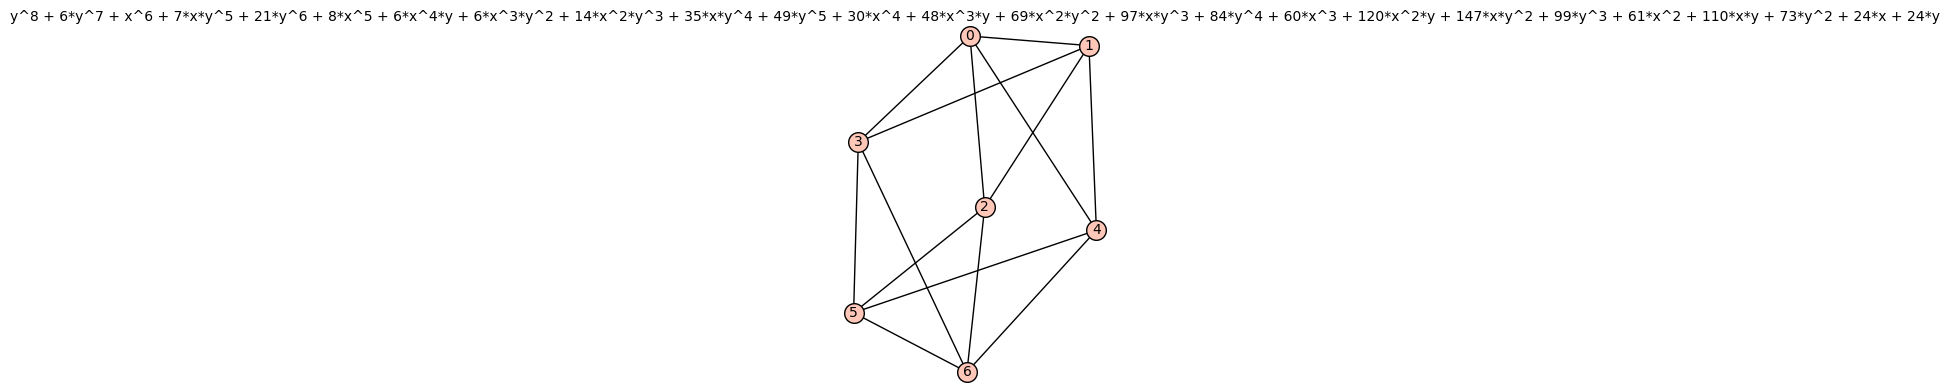

T???EA_WC_I?a?I?G_?g?B??a??c??S??E??


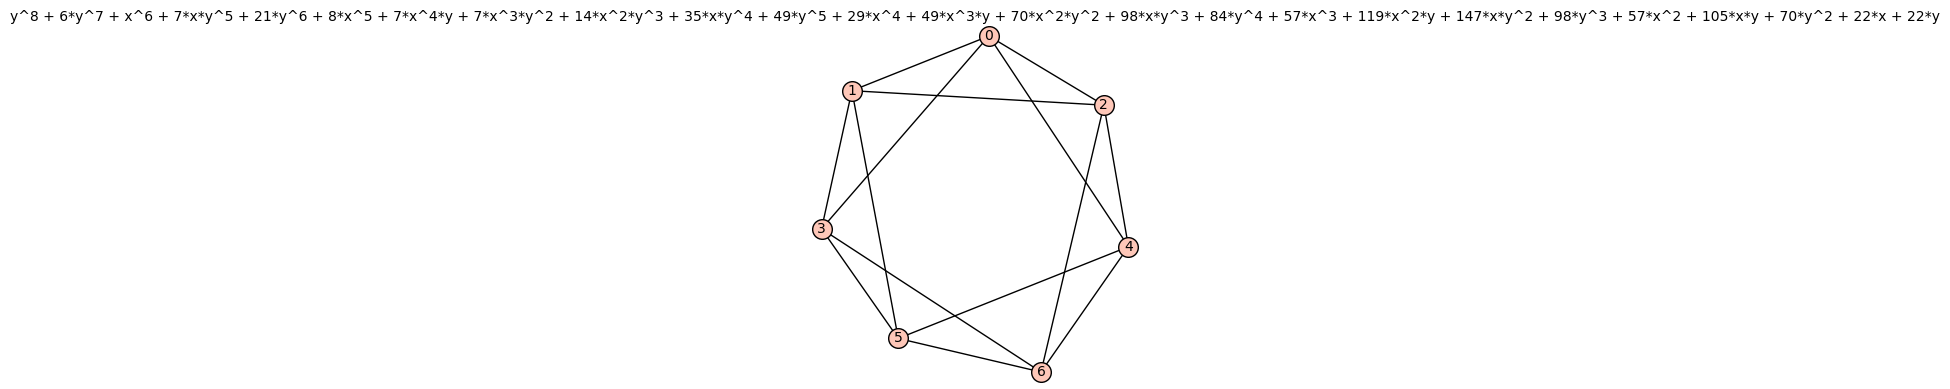

U????B?gB?Q?S?K?P?AG?B??a??S??a??D???o??


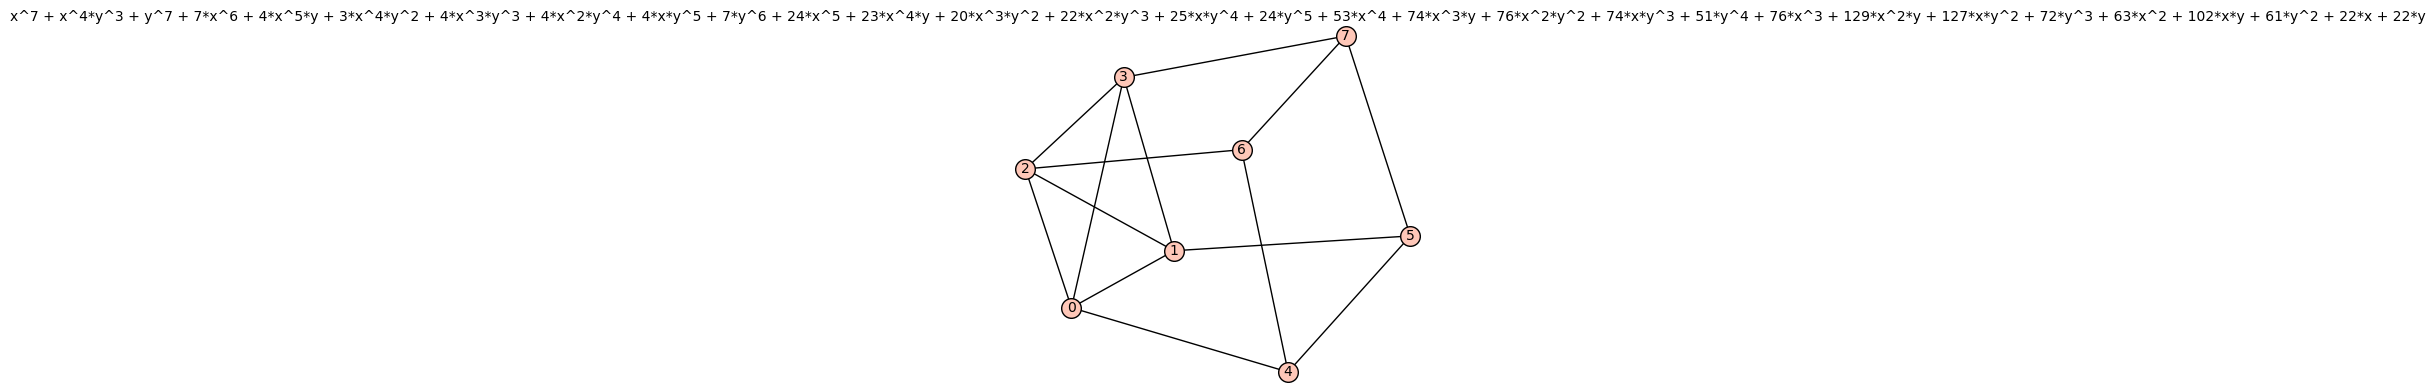

U????B?gB?Q?S?a?G_?W?G_?Q??S?@A??P??@O??


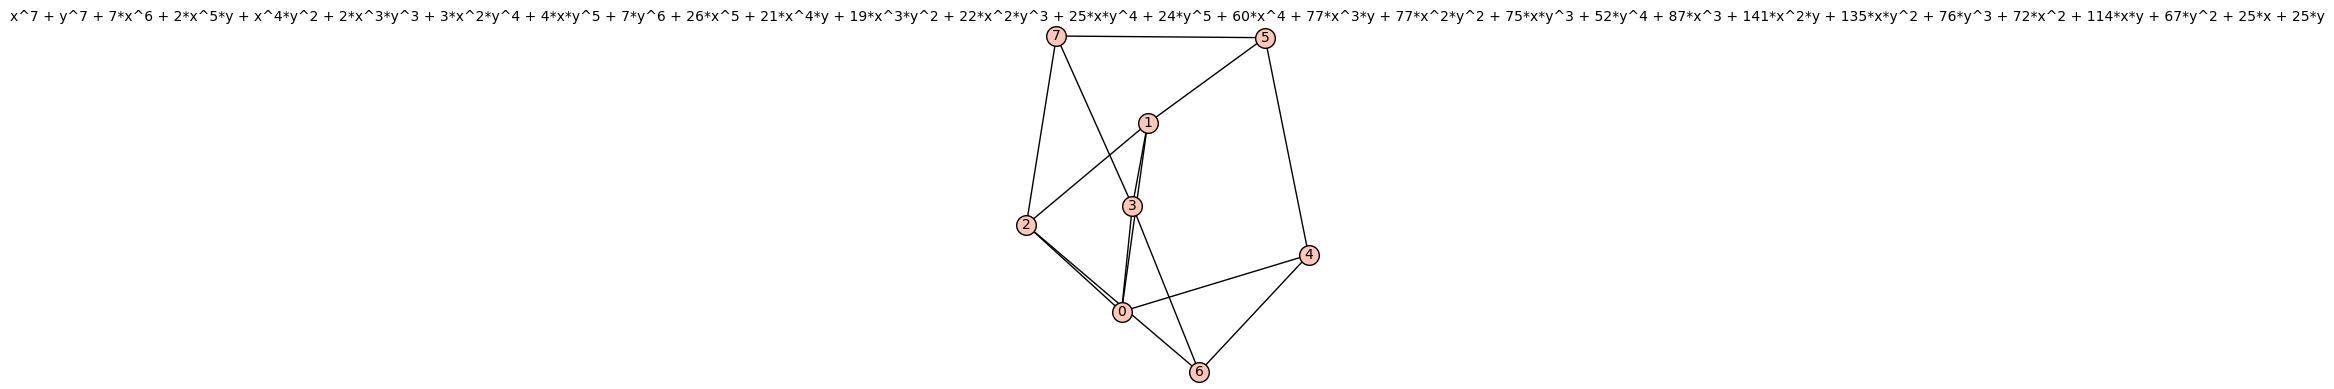

U????B?gB?Q?S?I?B?@G?D??a??c??Q??D???o??


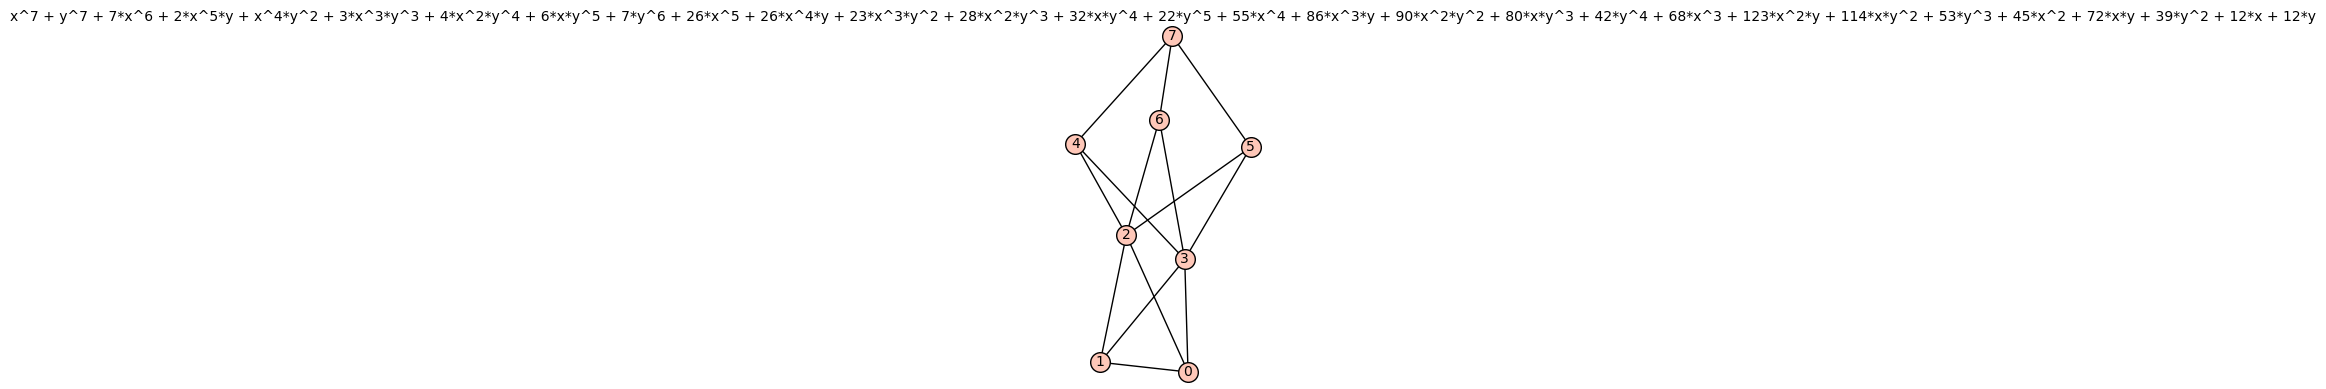

U????B?gC_P?P?H?A_?W?O_?a??c?AA??`??AO??


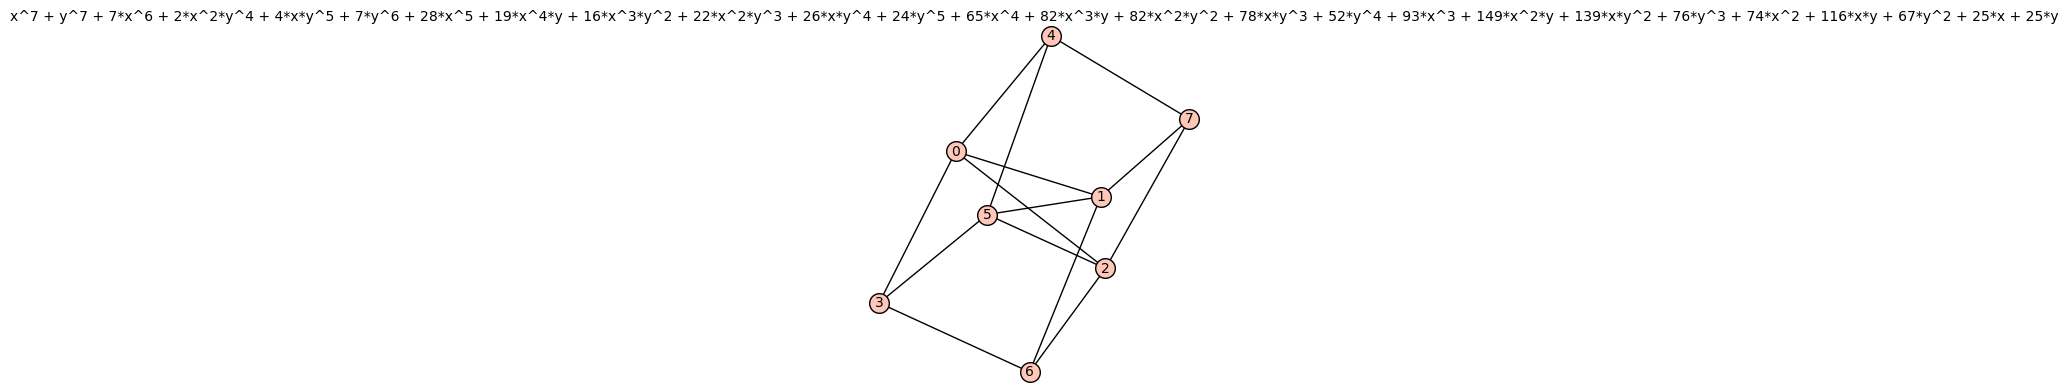

V??????oD?Q?a?P?C_?g?O_?I?@A??Q??O_??g??B???


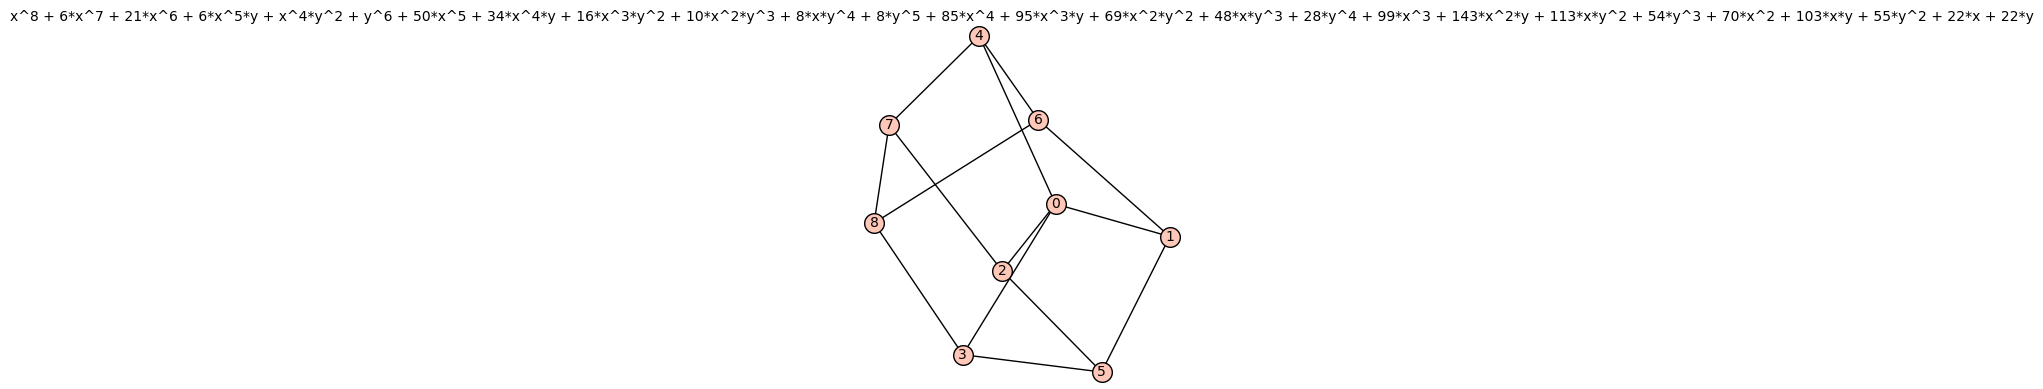

V??????oD?Q?a?P?C_AC?G_?P??Q??I??O_?AG??D???


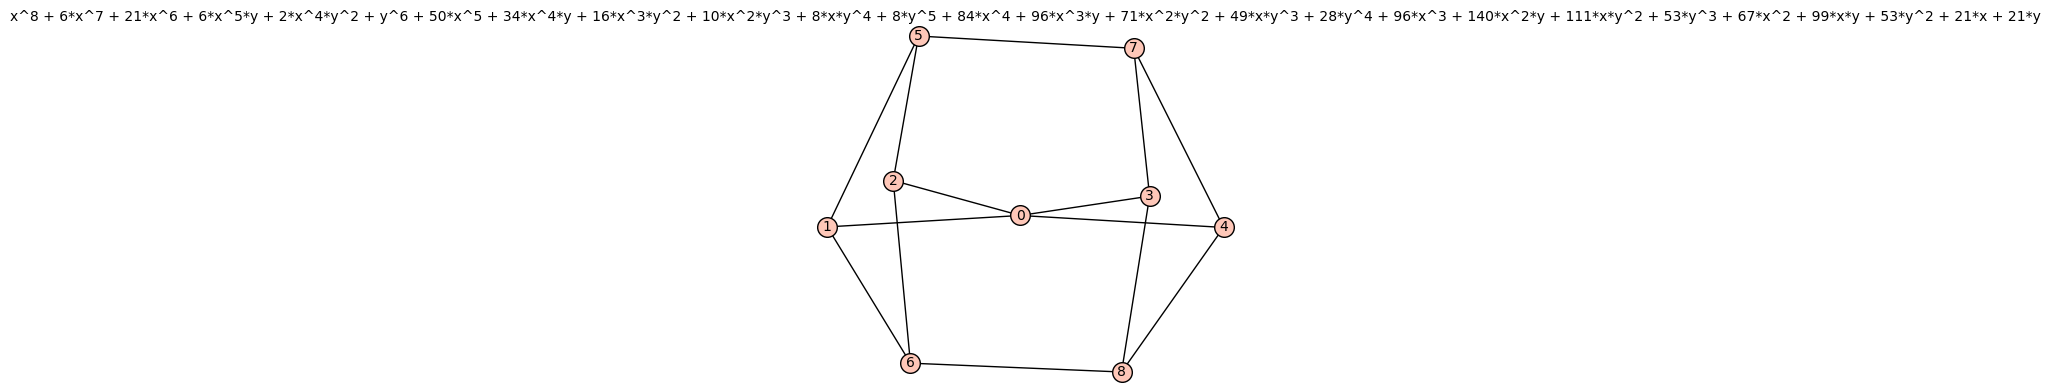

V??????oD?Q?a?P?C_AC?C_?`??Q??E??O_?AG??H???


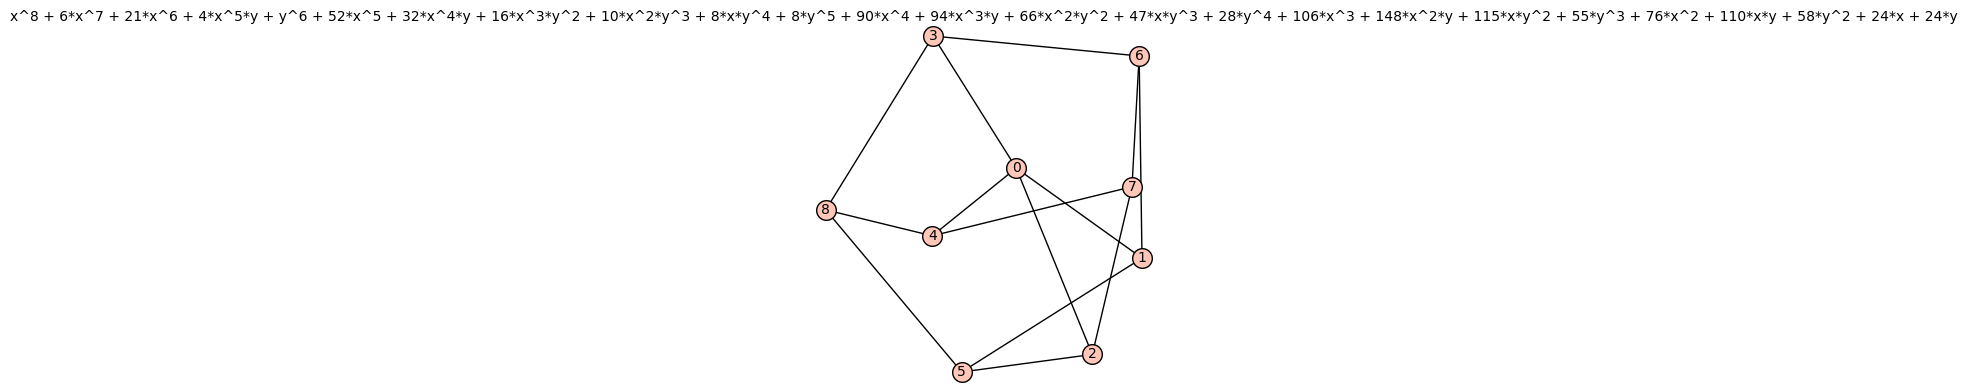

In [69]:
plotGraphsFromG6([x[0] for x in result])

In [86]:
g6="V??????oD?Q?a?P?C_AC?G_?P??Q??I??O_?AG??D???"
g = g6ToMultigraph(g6)
d, c = get_deck(g)

In [87]:
dg=deckToGraph(d)

In [88]:
cg=deckToGraph(c)

In [90]:
len(dg+cg),g.num_verts()

(2, 9)

In [91]:
for r_g in dg+cg:
    if not r_g.is_isomorphic(g):
        print(r_g.num_verts())
        r_g.plot().show()
        

In [95]:
q = f"select graph6, del_cards, con_cards from TP where n_deck = 1 and label={UNIQ}"
result = cur.execute(q).fetchall()

In [96]:
len(result)

10436

In [97]:
g6_has_contraction_only = {}
for g6, d, c in result:
    d = d.split(",")
    if d.count("") == len(d):
        g6_has_contraction_only[g6] = c.split(",")

In [98]:
len(g6_has_contraction_only)

179

EEh_


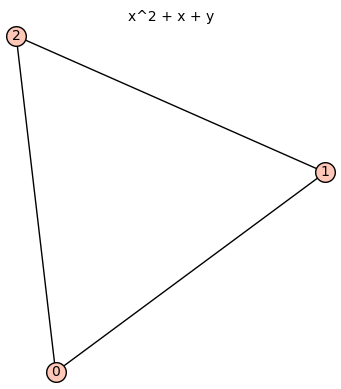

G?qa`_


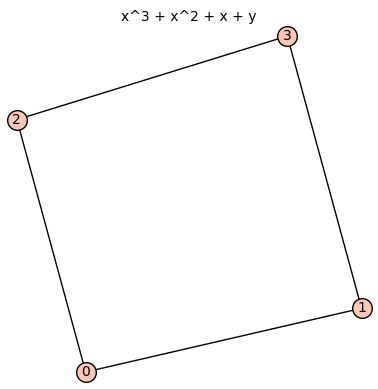

I?BDA_gE?


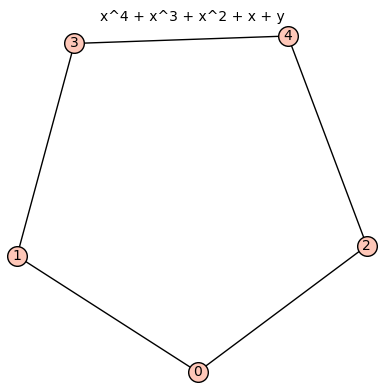

J?BDC`GI?o?


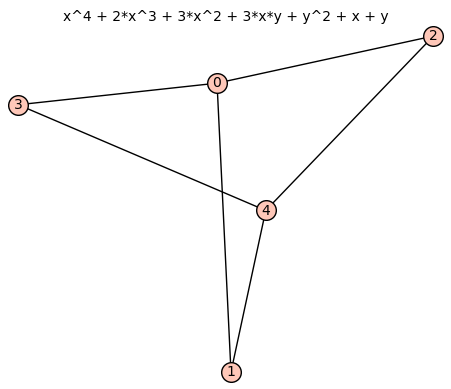

K??ED@OI?g@_


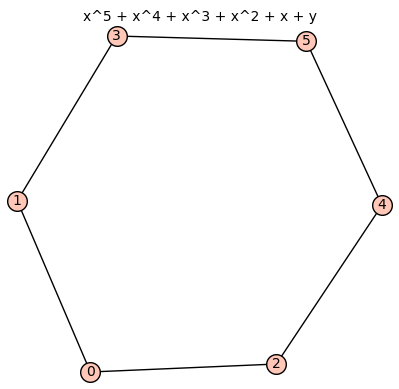

L??EDAOQ@OA_B?


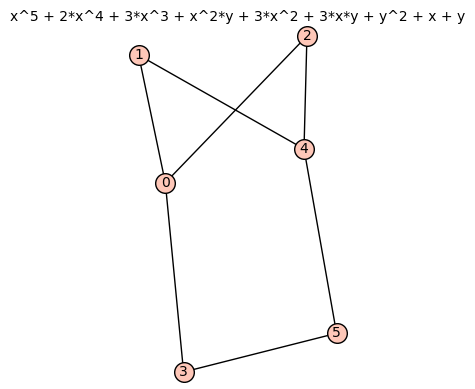

M???EA_S@OA_A_@_?


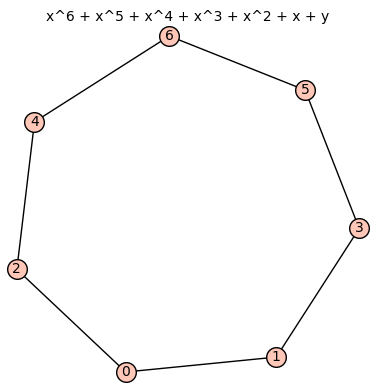

M??EDAOaAGC_D?B??


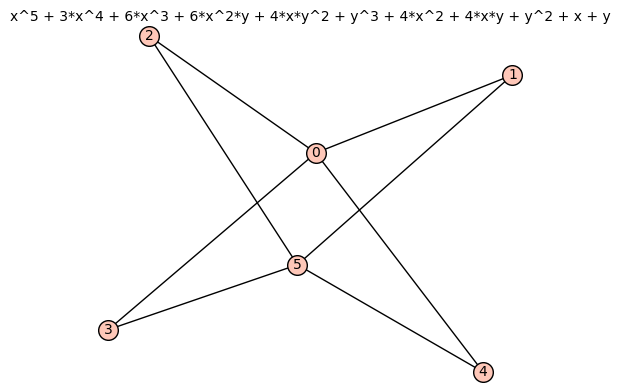

N???EA_cAOD?D?A_?o?


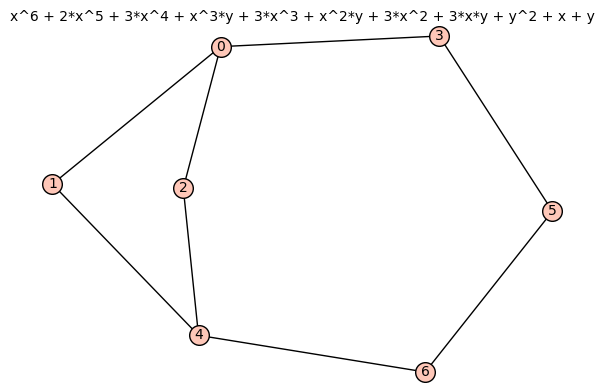

N???EA_cAOC_B?C_@O?


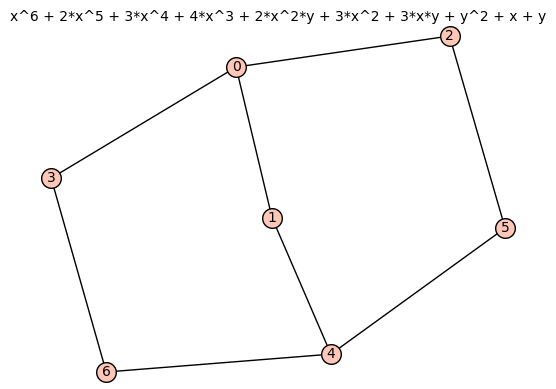

O????B?gA_D?D?A_?g?E?


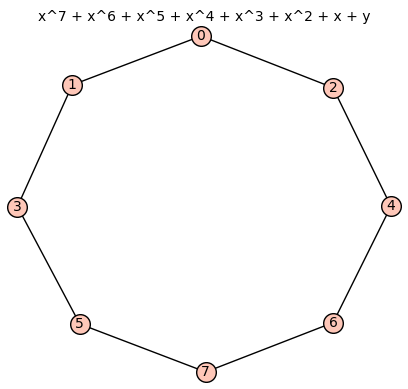

O???EA_cCOG_H?D?@O?K?


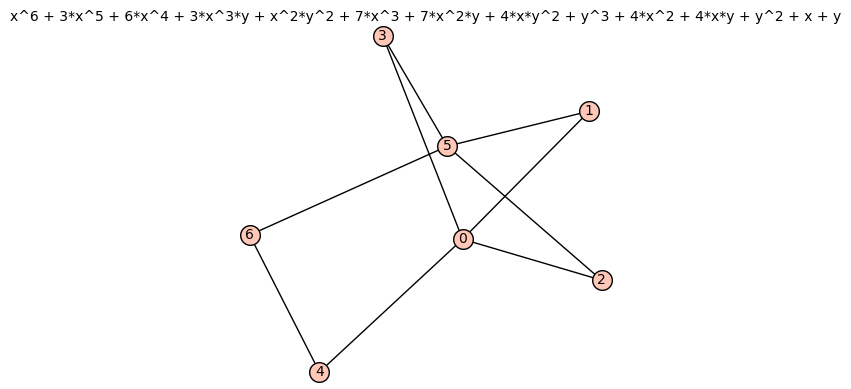

O???EA_cCOG_H?C_@O?K?


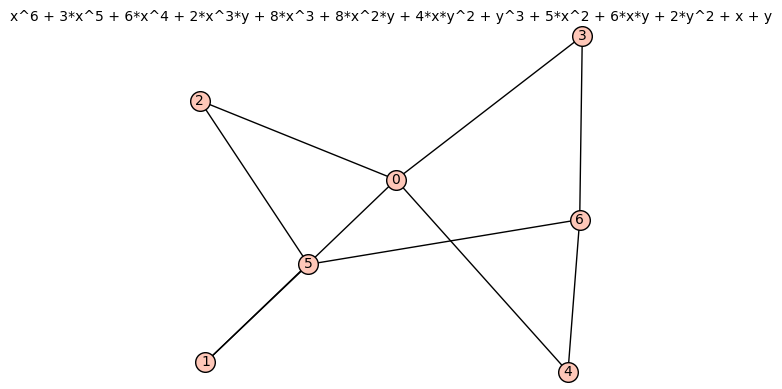

P????B?gC_H?I?D?@O?I??o?


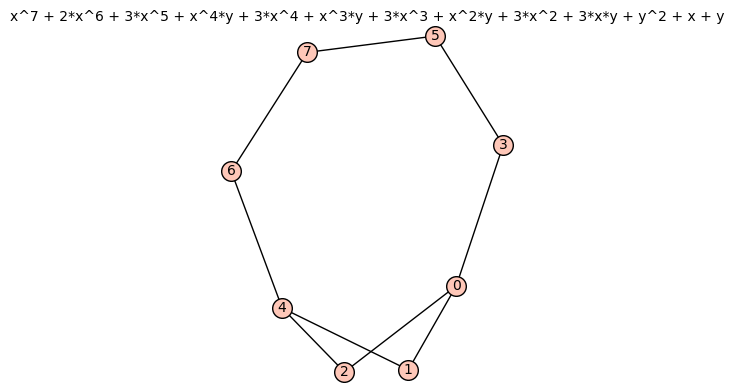

P????B?gC_H?H?B?AO?Q??o?


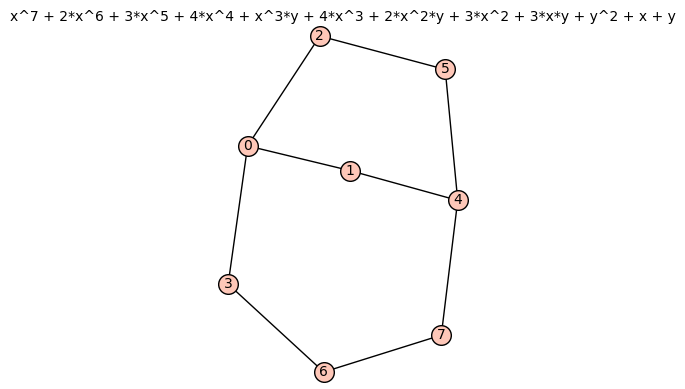

P????B?gC_H?H?C_@G?I??o?


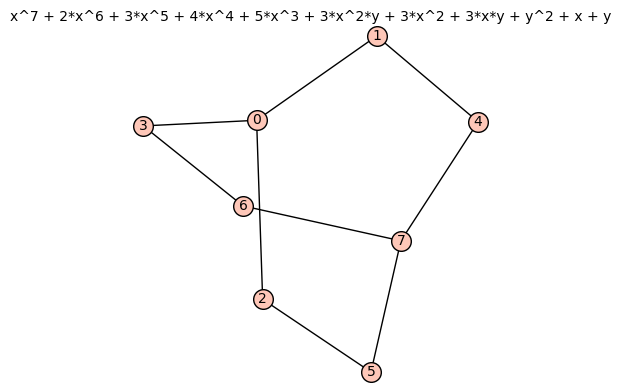

Q??????oD?I?I?D?@O?I??g?@_?


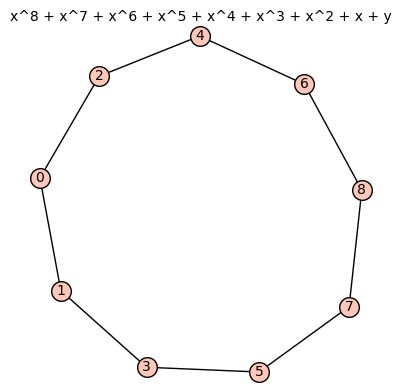

P???EA_cCOO_O_G_AO?S?@_?


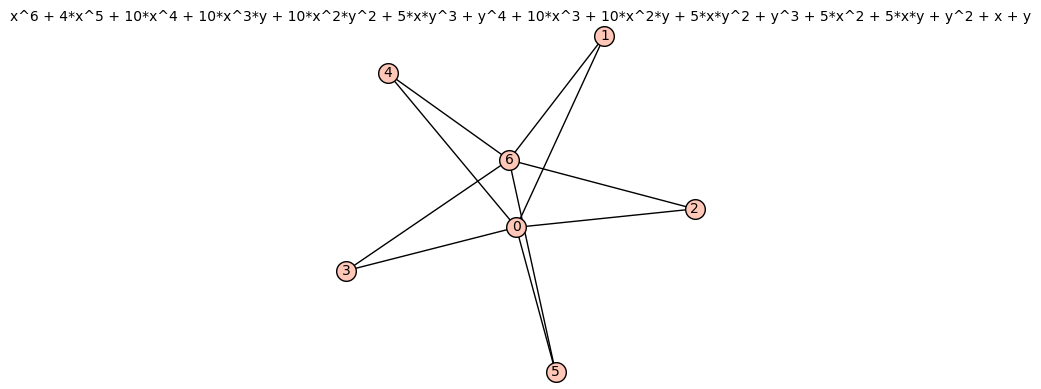

Q????B?gC_P?P?H?A_?S?@O?B??


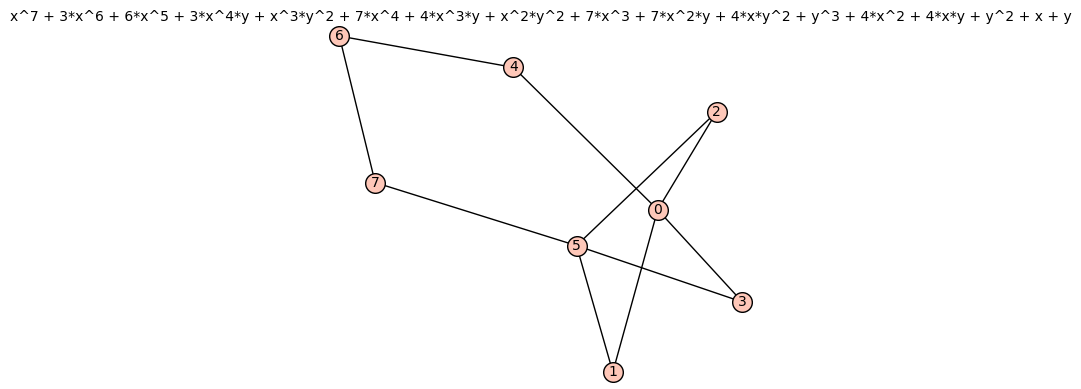

Q????B?gC_P?P?H?AO?K?AO?D??


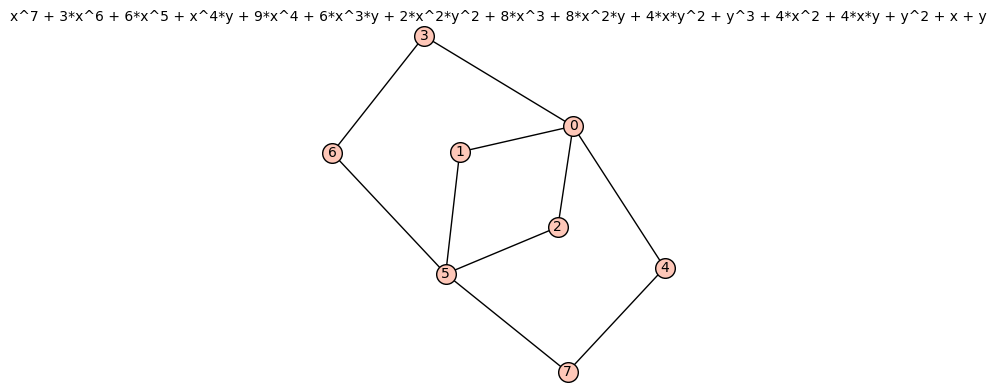

Q????B?gC_P?P?H?AO?K?AO?B??


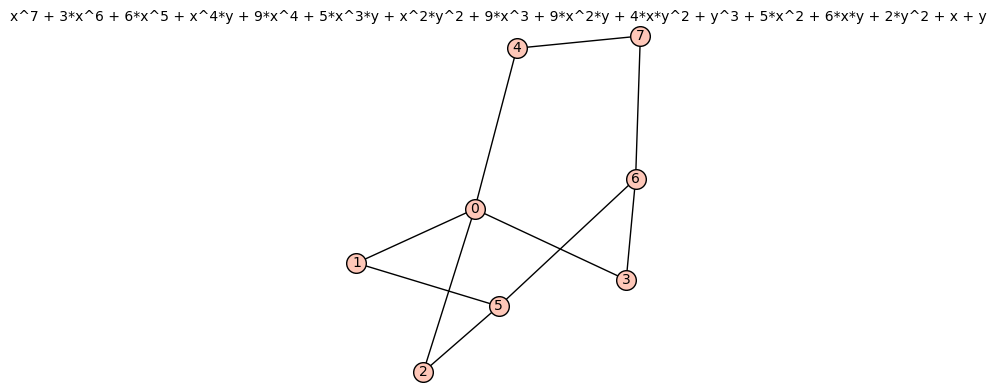

R??????oD?Q?Q?I?A_?S?@O?A_?B??


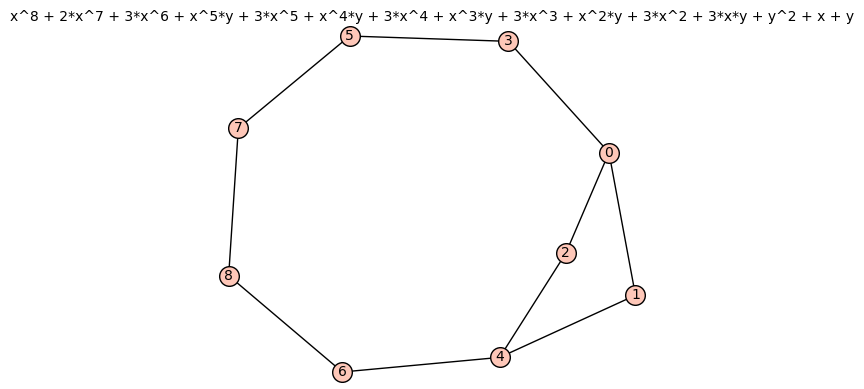

R??????oD?Q?Q?H?@_?c?AO?A_?B??


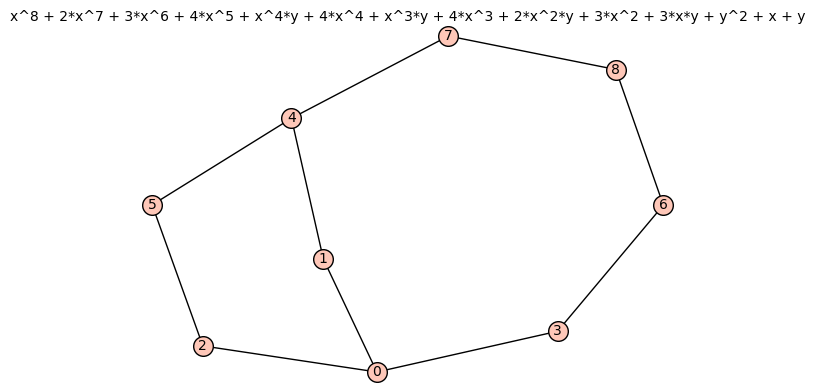

R??????oD?Q?Q?H?AO?Q?@O?G_?D??


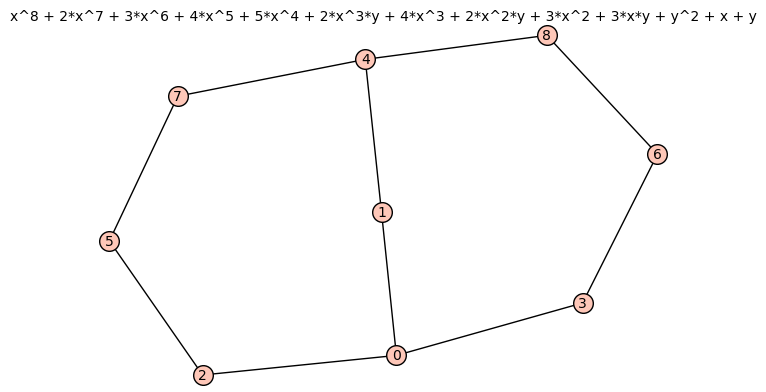

R??????oD?Q?Q?H?AO?Q?@O?A_?B??


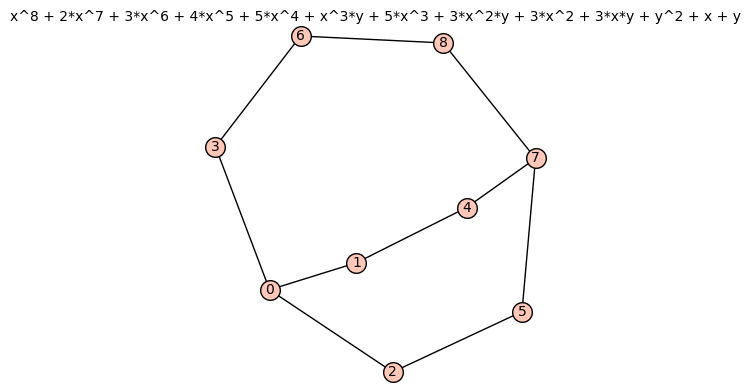

S???????E?S?S?I?A_?S?@O?A_?A_?@_?


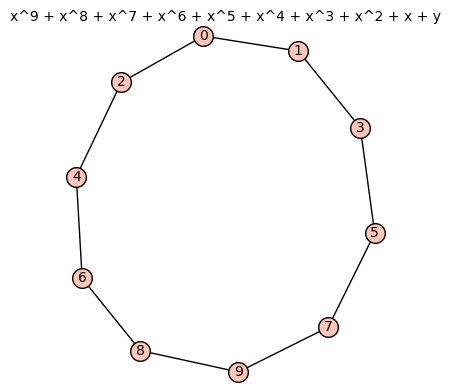

R????B?gC_P?`?O_CO?c?A_?D??E??


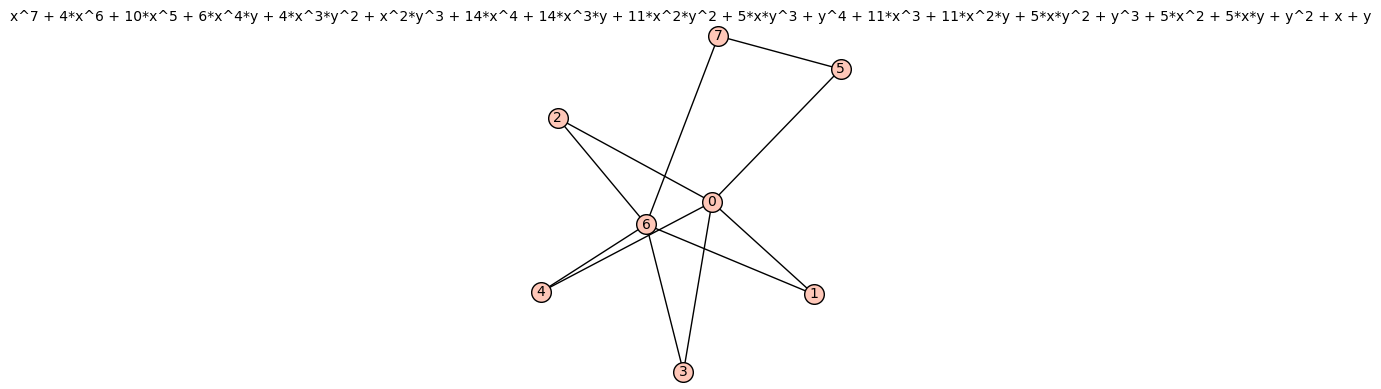

R????B?gC_P?`?O_CO?c?AO?D??E??


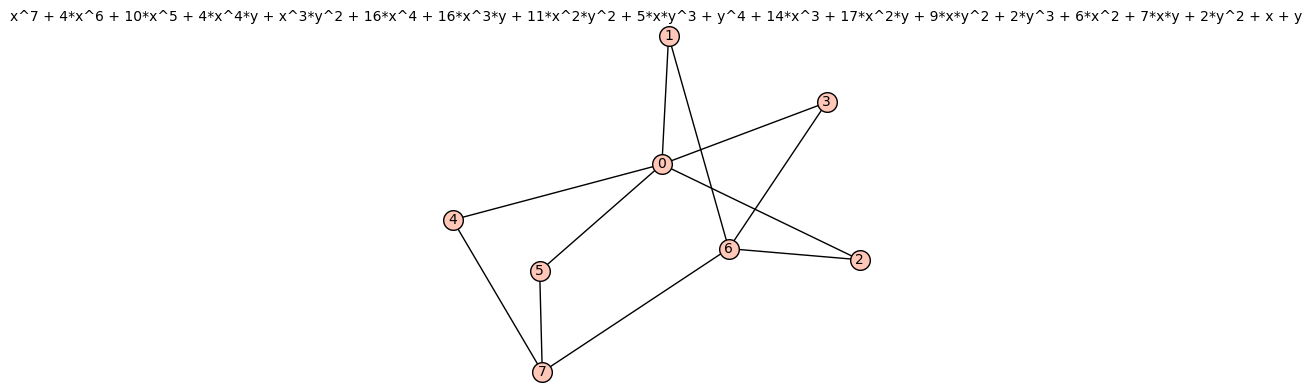

S??????oD?Q?a?P?C_?g?A_?D??D??B??


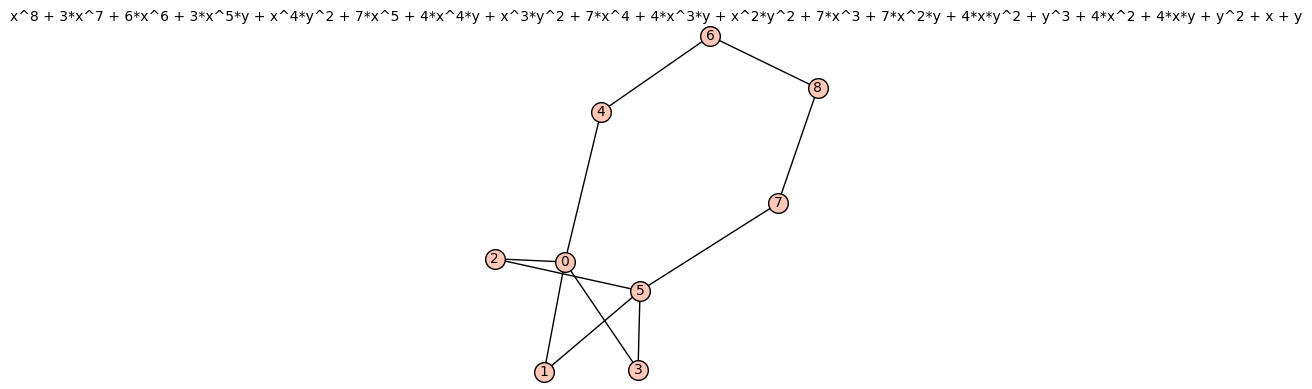

S??????oD?Q?a?P?C_?c?@_?H??H??B??


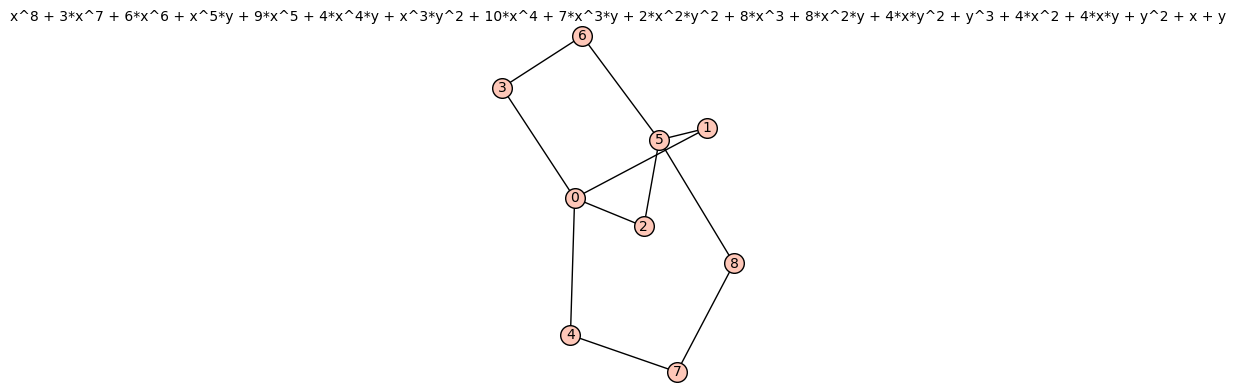

S??????oD?Q?a?P?C_?c?@_?H??D??B??


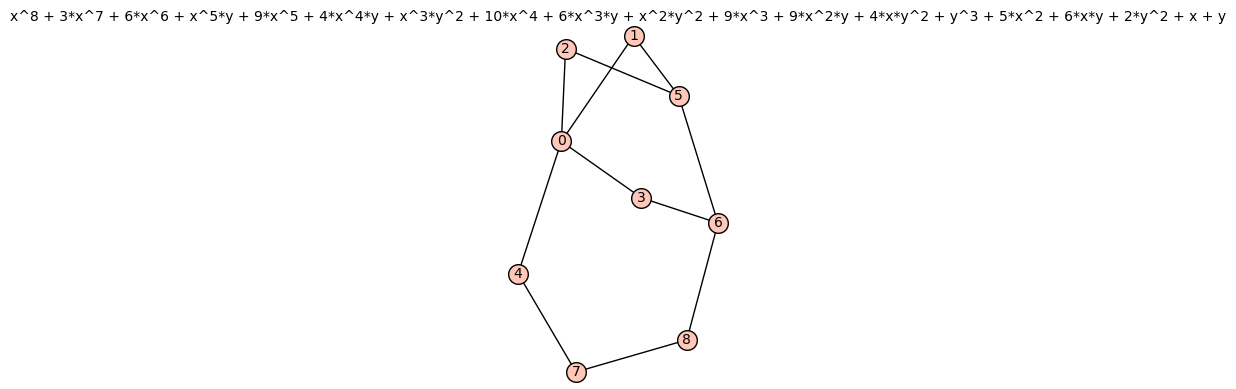

S??????oD?Q?a?P?C_?c?AO?C_?D??B??


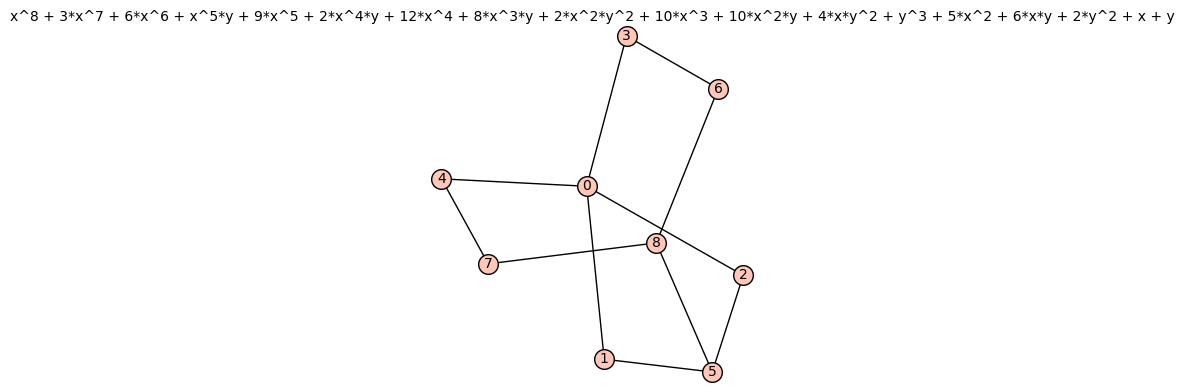

S??????oD?Q?a?P?CO?K?CO?D??P??H??


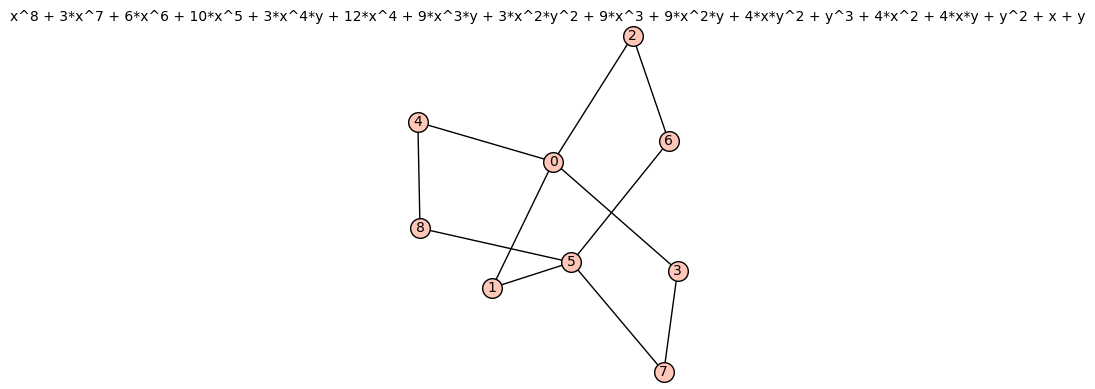

S??????oD?Q?a?P?CO?K?CO?D??P??D??


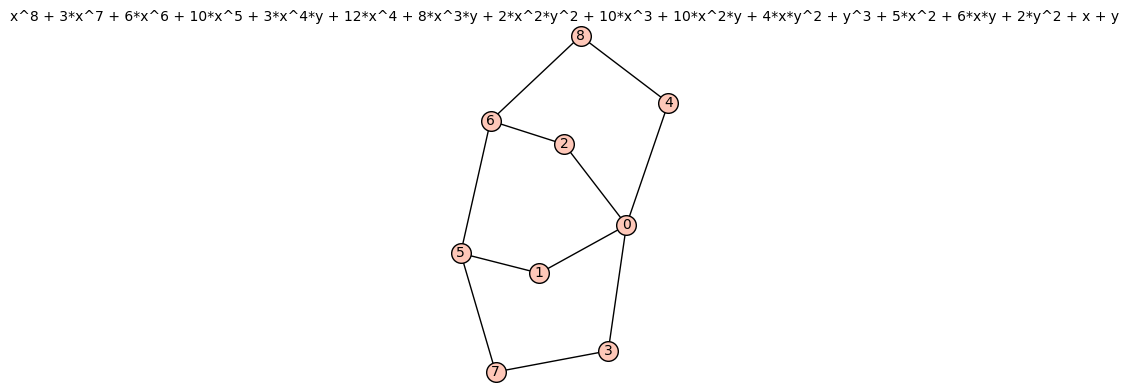

T???????E?S?c?Q?D??g?A_?D??D??A_??o?


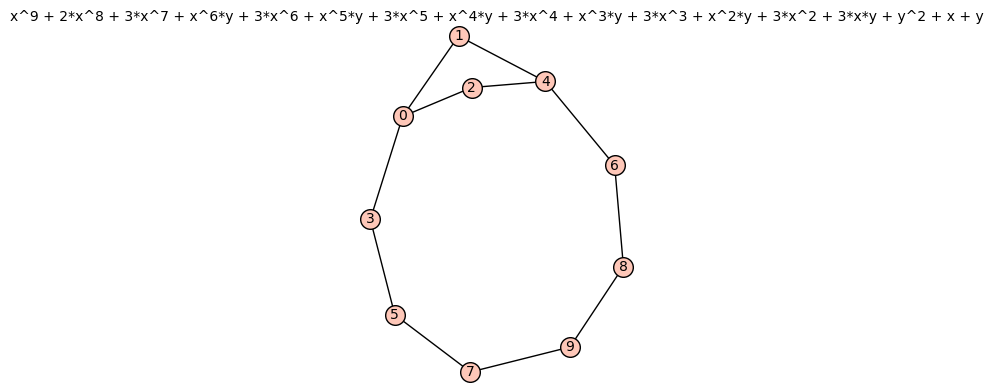

T???????E?S?c?Q?C_?W?C_?H??D??A_??o?


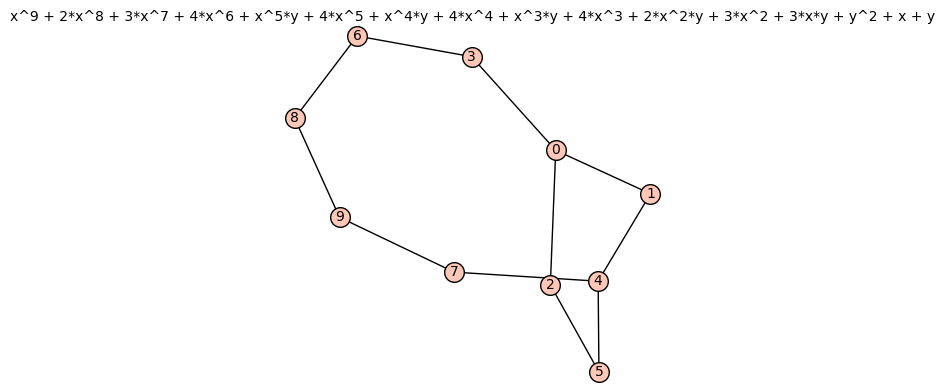

T???????E?S?c?Q?C_?c?AO?D??P??C_??o?


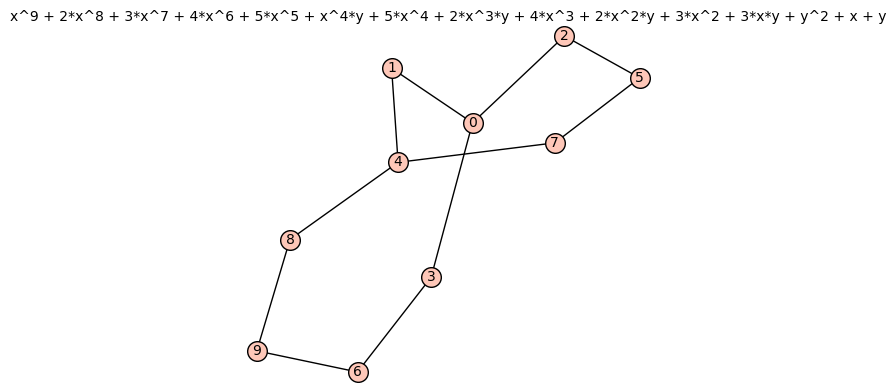

T???????E?S?c?Q?C_?c?AO?D??D??A_??o?


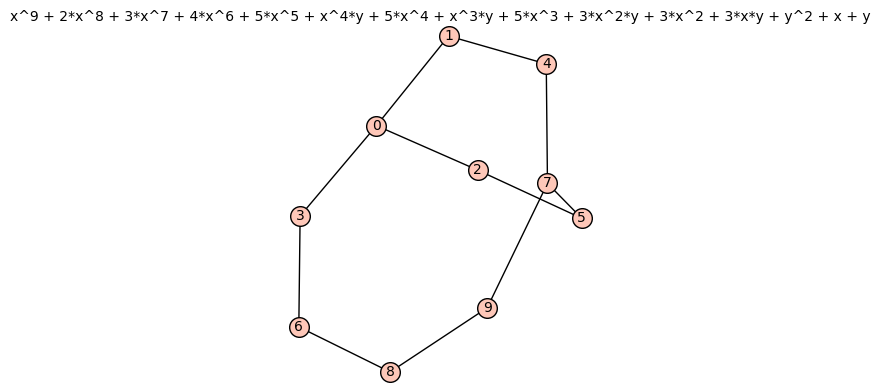

T???????E?S?c?Q?C_?c?AO?C_?B??C_?@O?


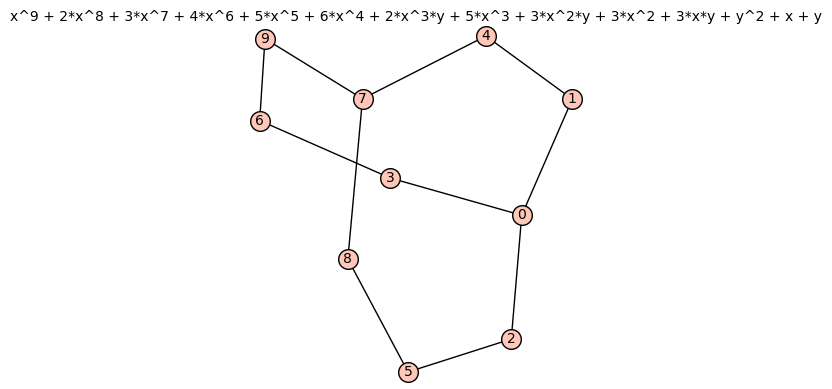

U?????????W?g?S?D??g?A_?D??D??A_??g??E??


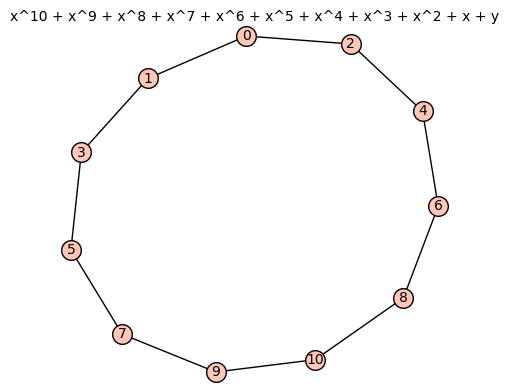

S????B?gC_P?`?__GG@A?CO?H??I??E??


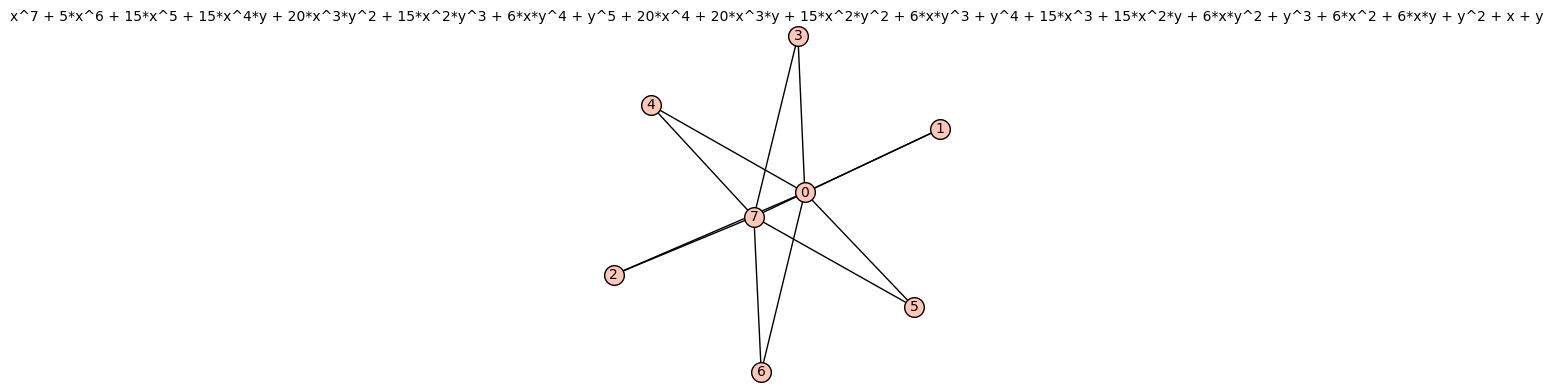

S????B?gC_P?P?H?A_?W?O_?a?AA?@A??


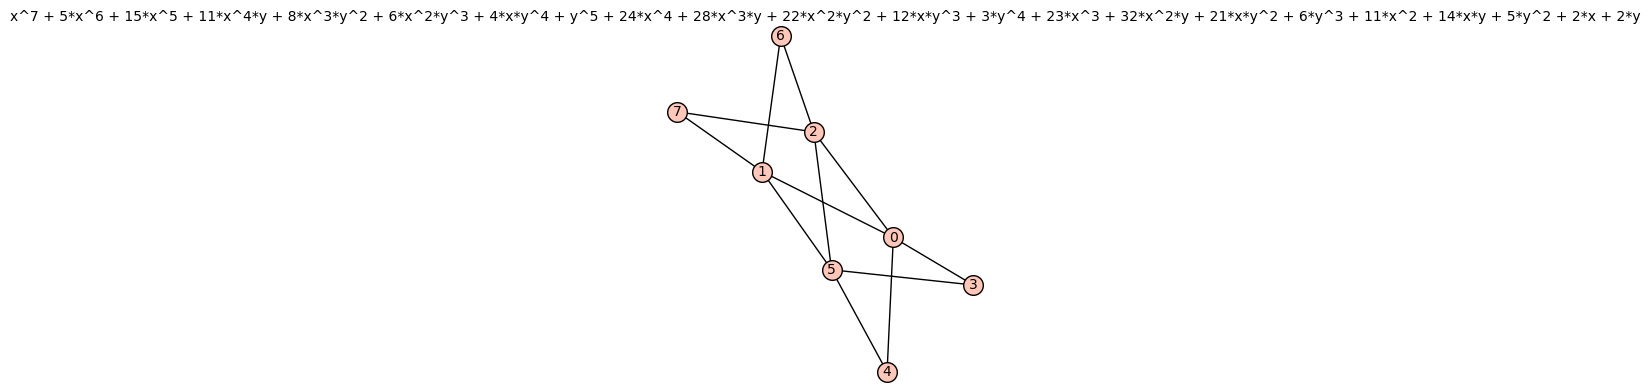

T??????oD?Q?a?`?GO@C?C_?I??I??D??@_?


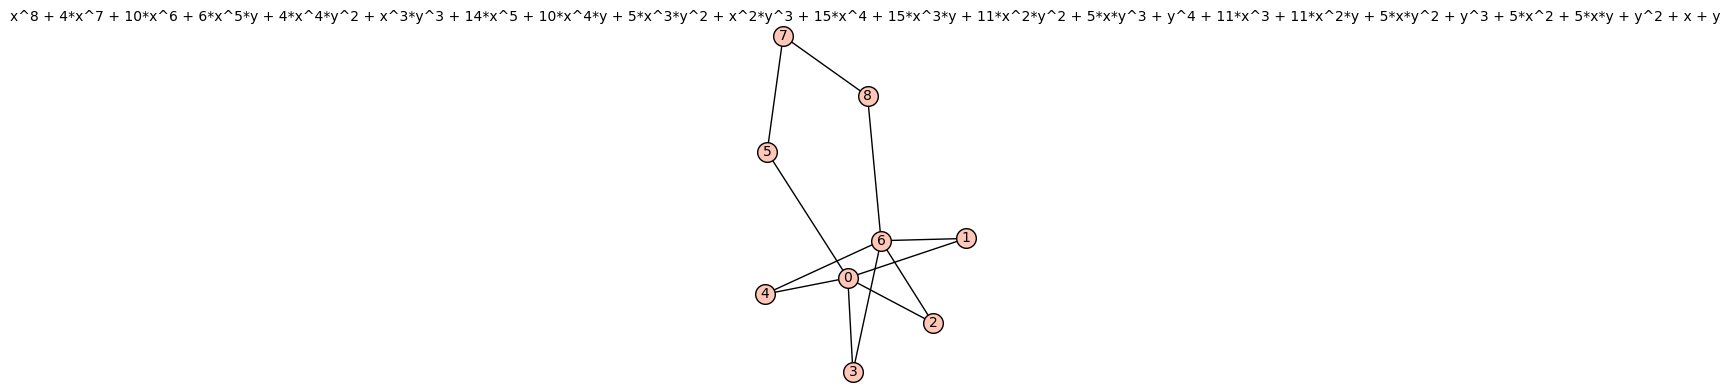

T??????oD?Q?a?`?GO@C?C_?H??E??H??A_?


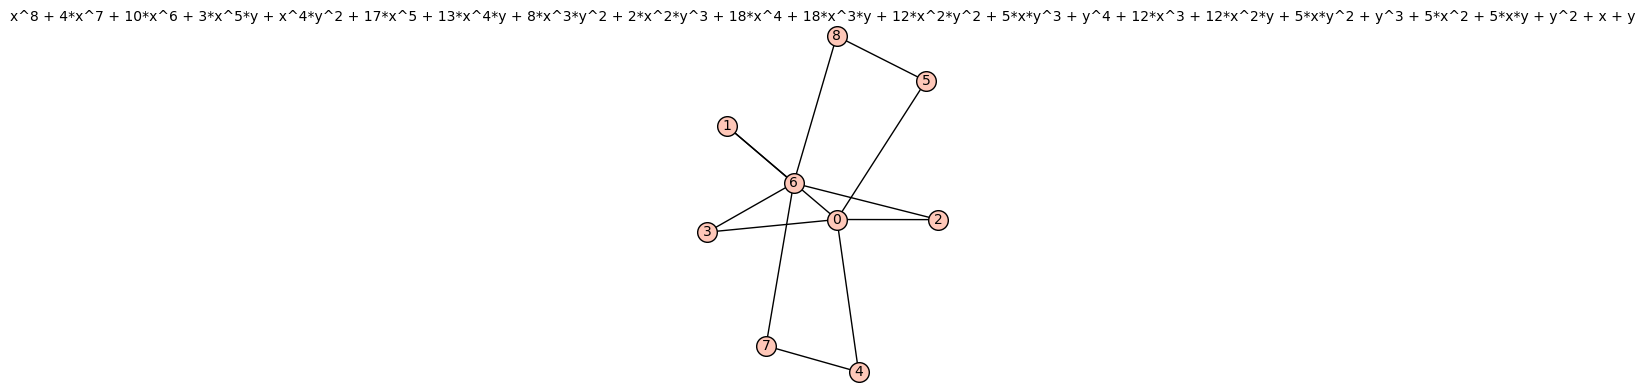

T??????oD?Q?a?`?GO@C?C_?H??E??H??@_?


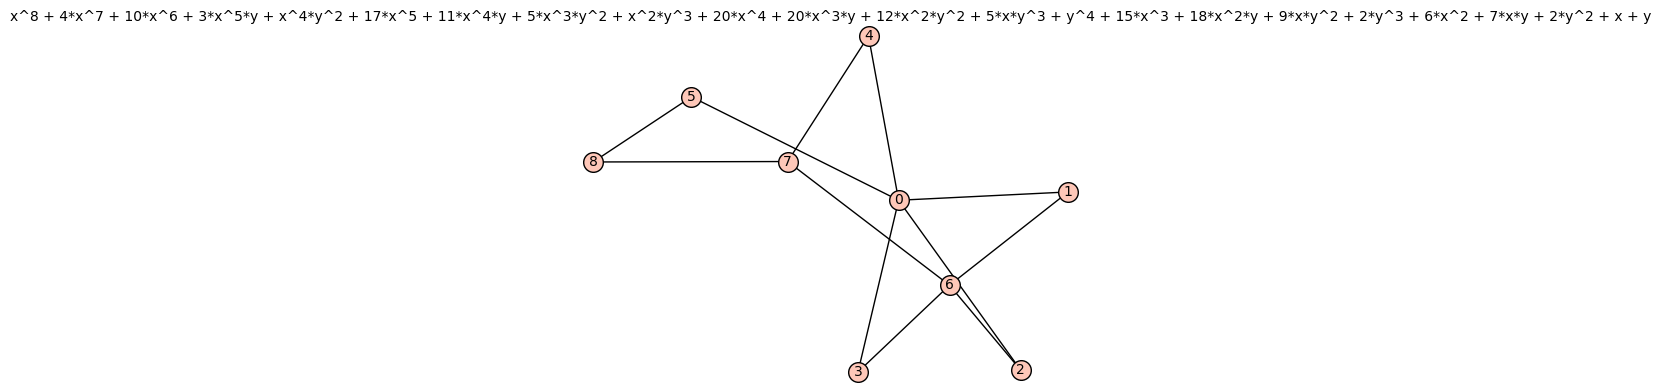

T??????oD?Q?a?`?GO@C?CO?H??E??H??A_?


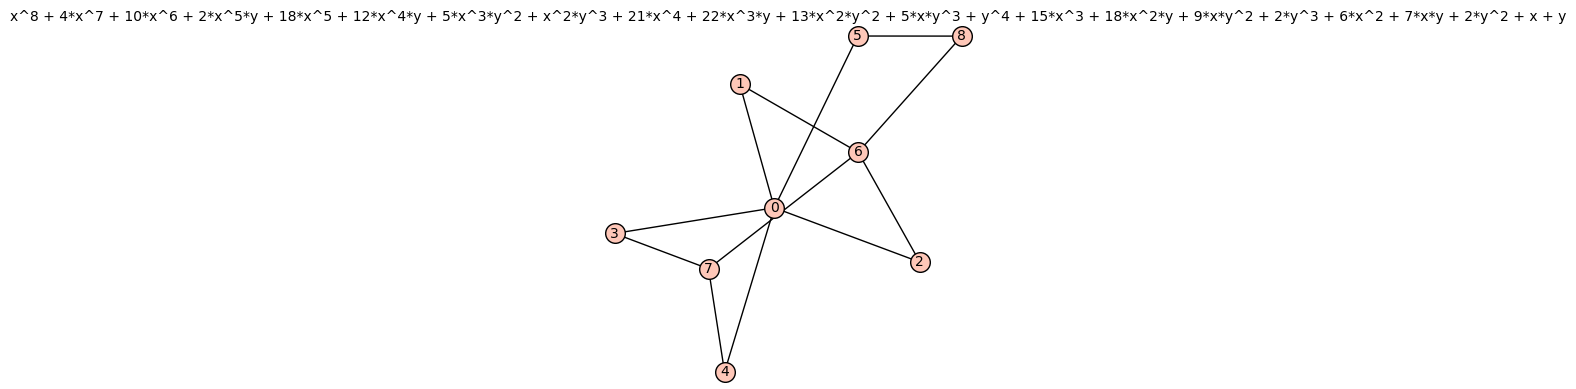

T??????oD?Q?a?P?C_?c?A_?D??E??H??A_?


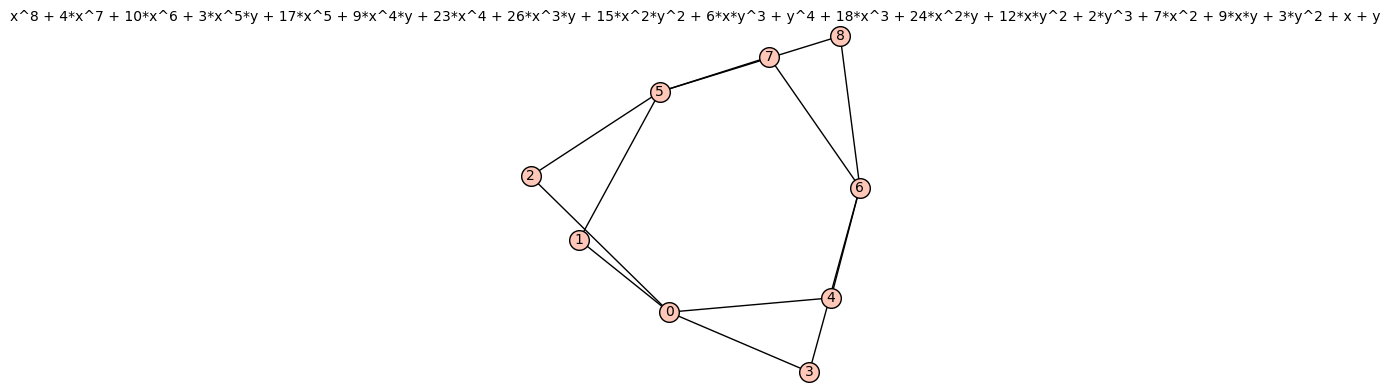

T??????oD?Q?a?P?C_?c?@_?P??P??H??@_?


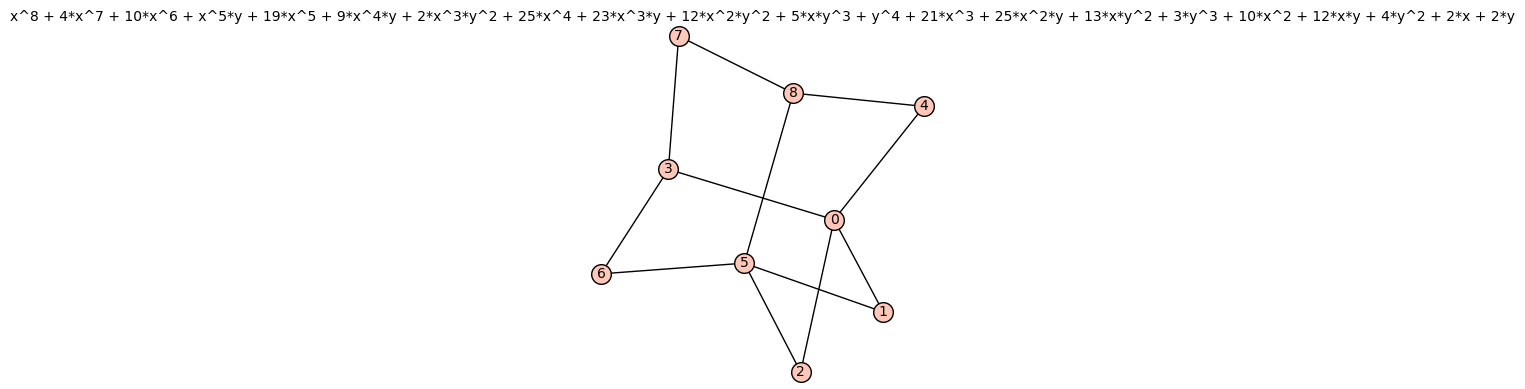

U???????E?S?c?a?G_@G?D??I??I??D??@O??K??


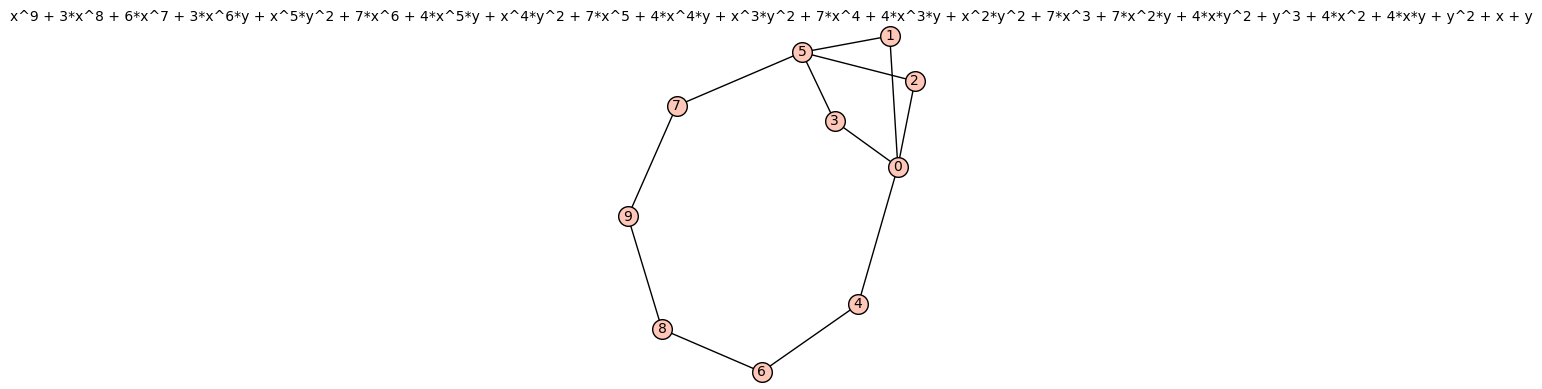

U???????E?S?c?a?G_@G?C_?E??Q??H??@O??K??


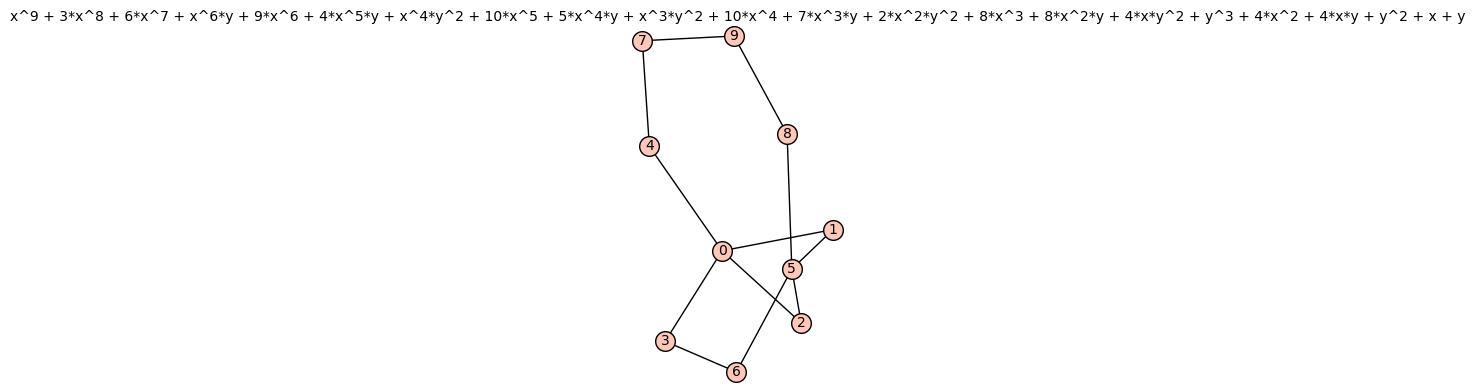

U???????E?S?c?a?G_@G?C_?E??Q??D??@O??K??


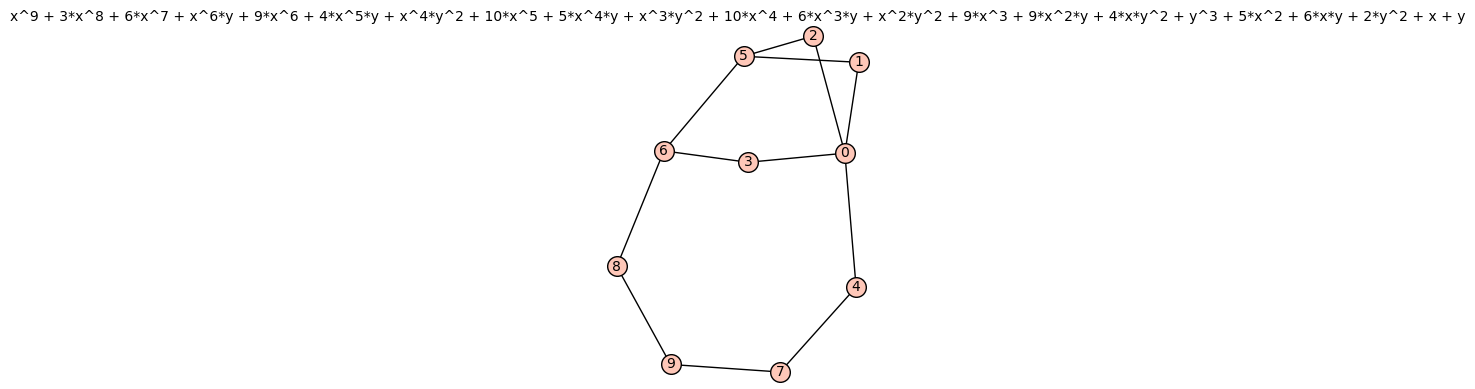

U???????E?S?c?a?G_@G?C_?H??H??D??CO??S??


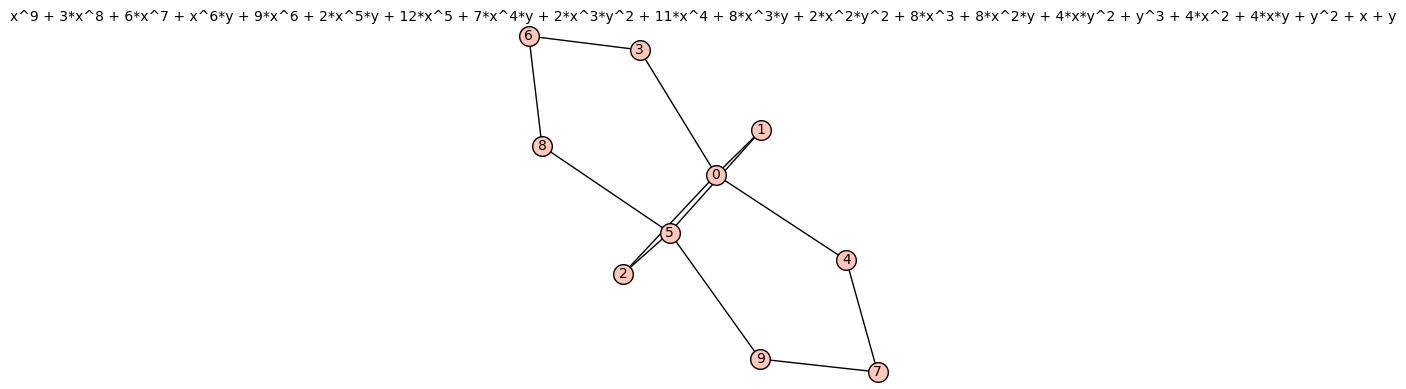

U???????E?S?c?a?G_@G?C_?H??H??D??@O??K??


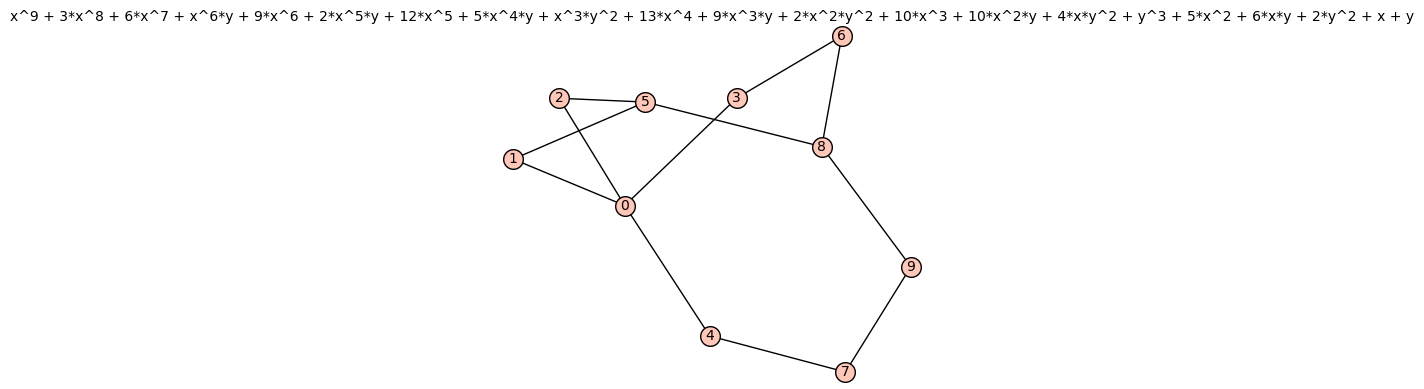

U???????E?S?c?a?G_@C?@_?P??I??P??CO??K??


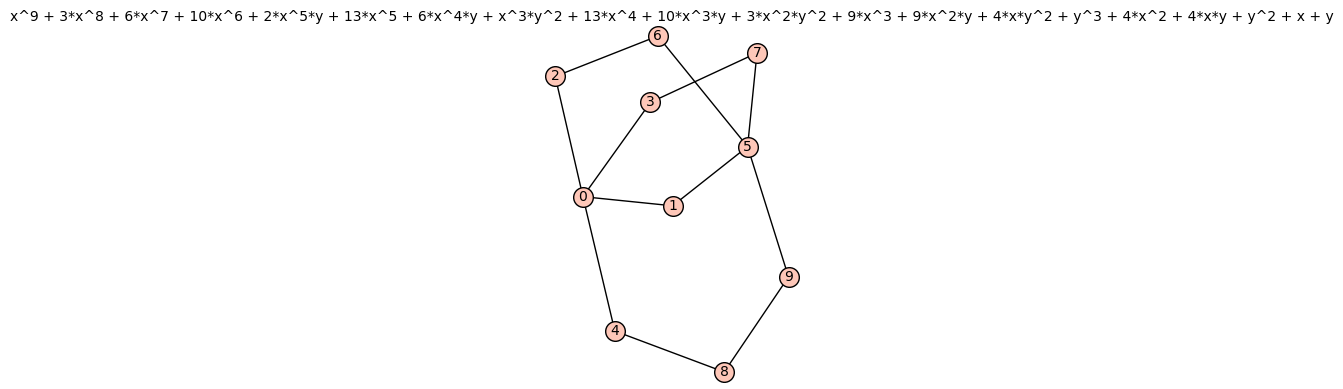

U???????E?S?c?a?G_@C?@_?P??I??P??AO??K??


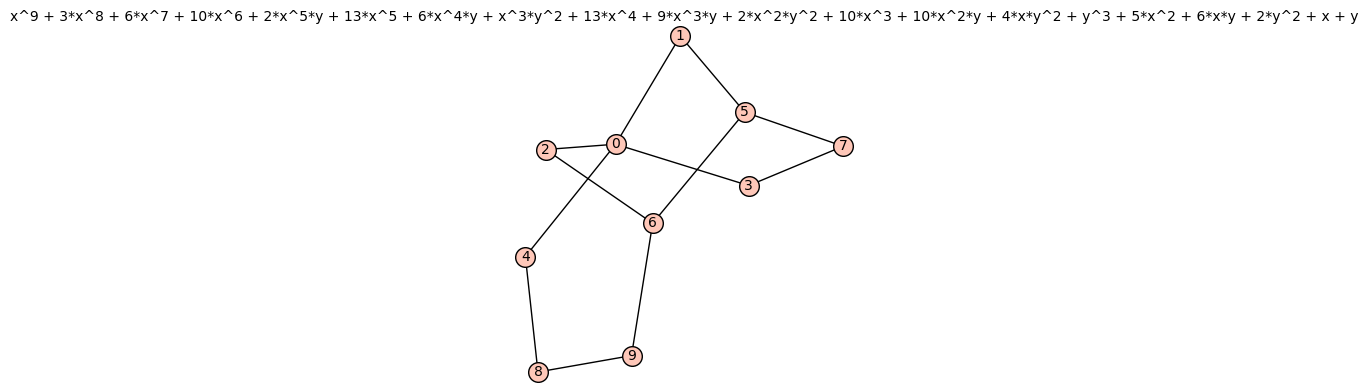

U???????E?S?c?a?G_@C?@_?P??P??G_?@O??K??


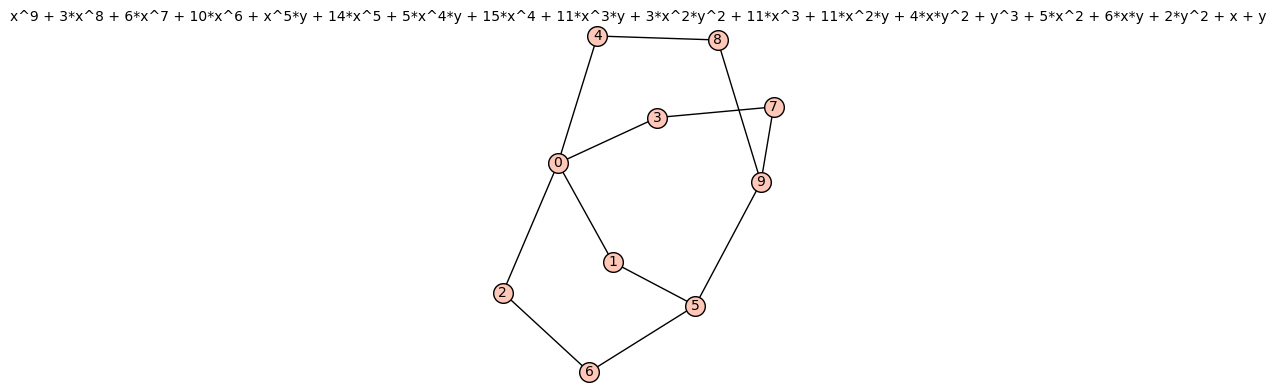

U???????E?S?c?a?G_@C?CO?G_?G_?C_?@O??K??


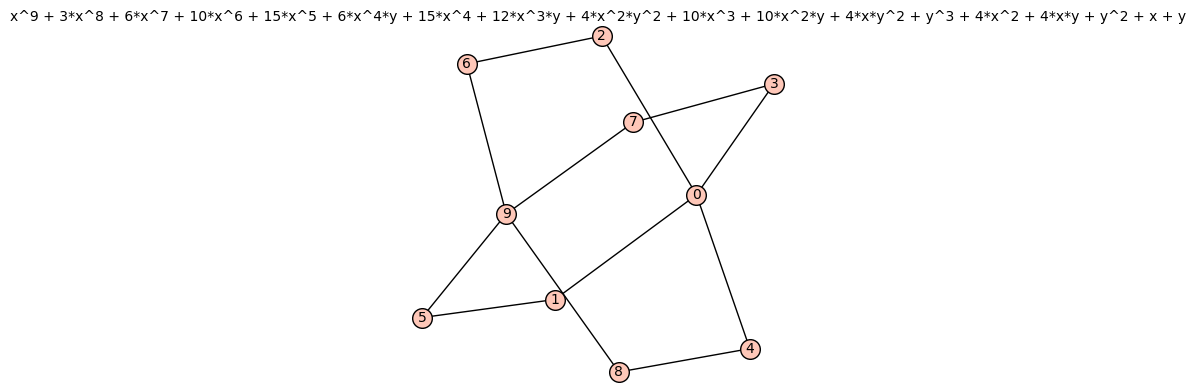

U???????E?S?c?Q?C_?c?AO?D??P??D??CO??c??


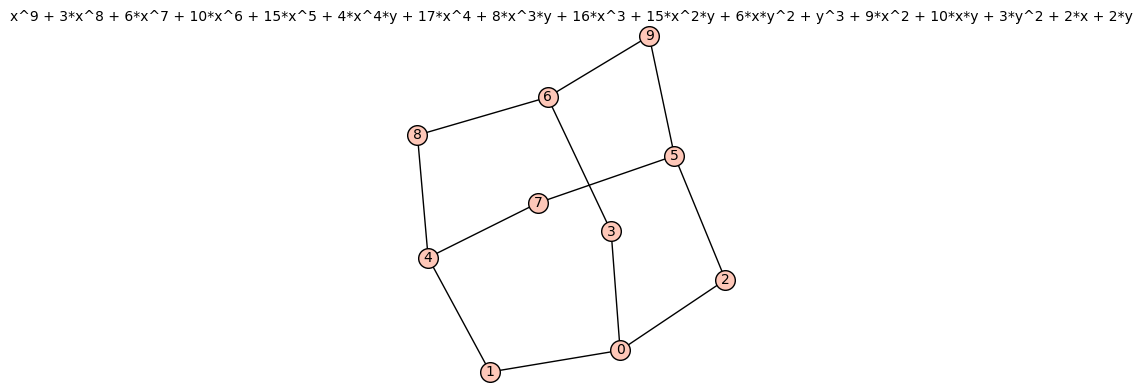

V?????????W?g?c?H?@O?D??I??I??D??@O??I???o??


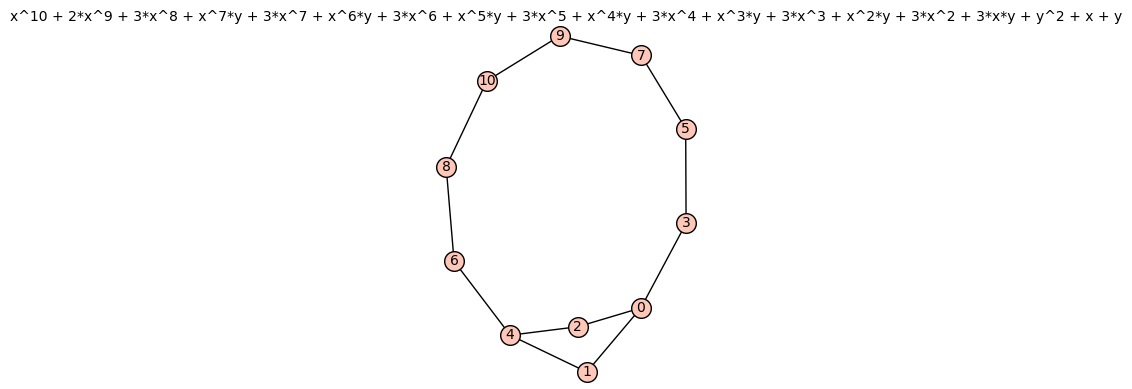

V?????????W?g?c?H?@G?B??Q??Q??D??@O??I???o??


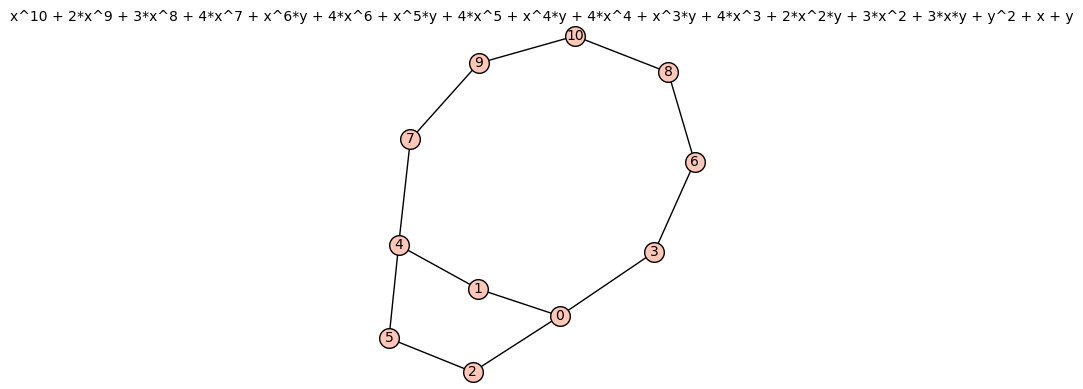

V?????????W?g?c?H?@G?C_?H??I??P??AO??I???o??


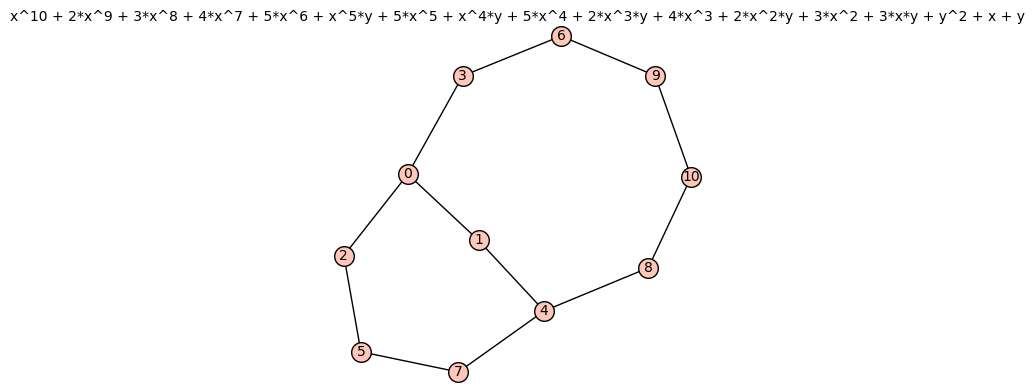

V?????????W?g?c?H?@G?C_?H??I??D??@O??I???o??


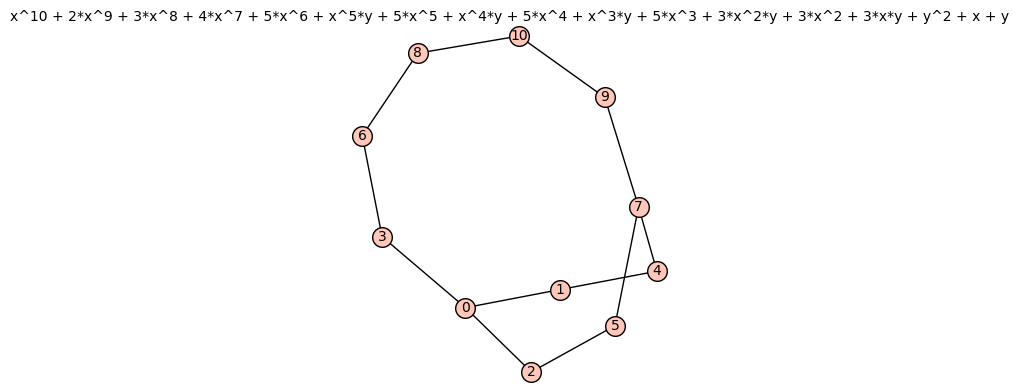

V?????????W?g?c?H?@G?C_?H??P??G_?@O??a??@O??


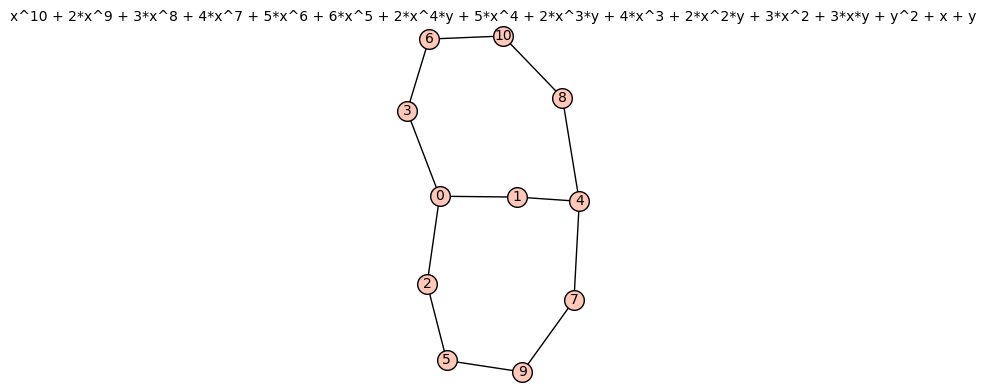

V?????????W?g?c?H?@G?C_?H??H??B??AO??Q???o??


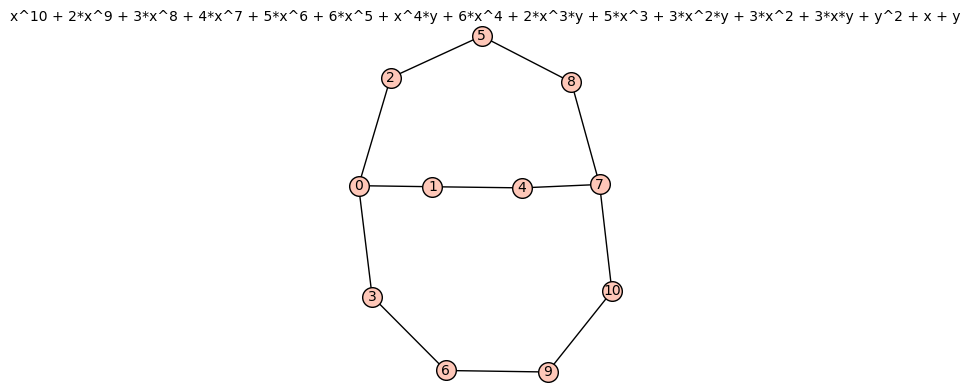

V?????????W?g?c?H?@G?C_?H??H??C_?@G??I???o??


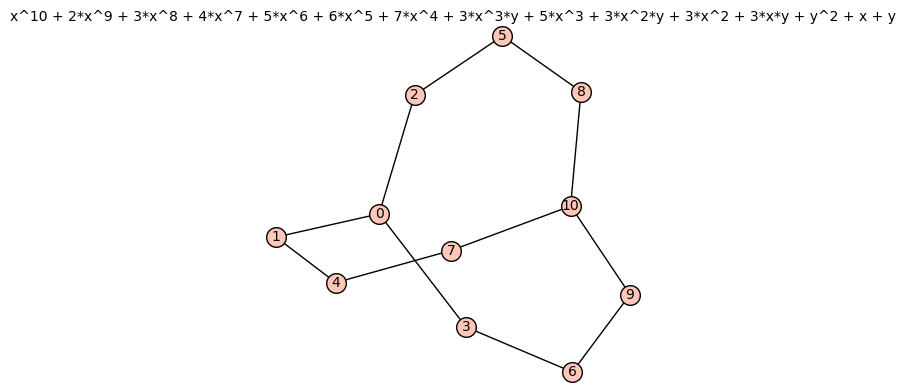

W???????????o?g?I?@O?D??I??I??D??@O??I???g??@_?


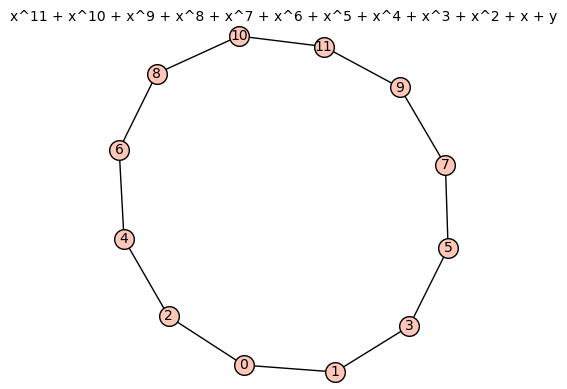

U??????oD?Q?a?`?OOAA?GO?P??Q??I??A_??W??


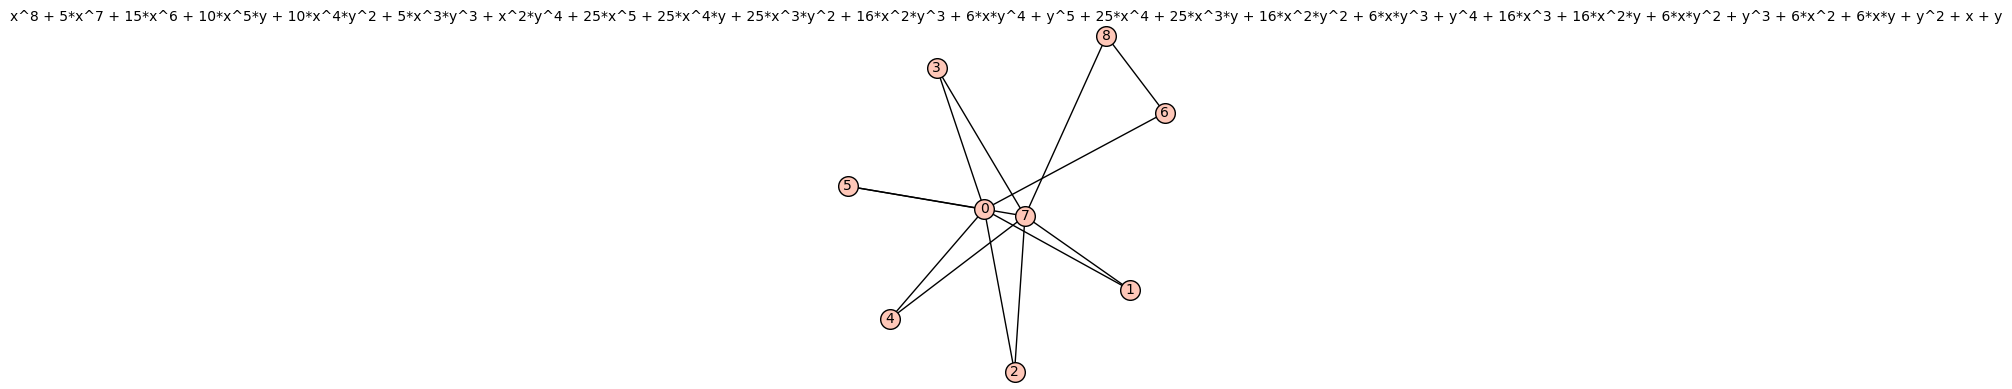

U??????oD?Q?a?`?OOAA?GO?P??Q??H??A_??W??


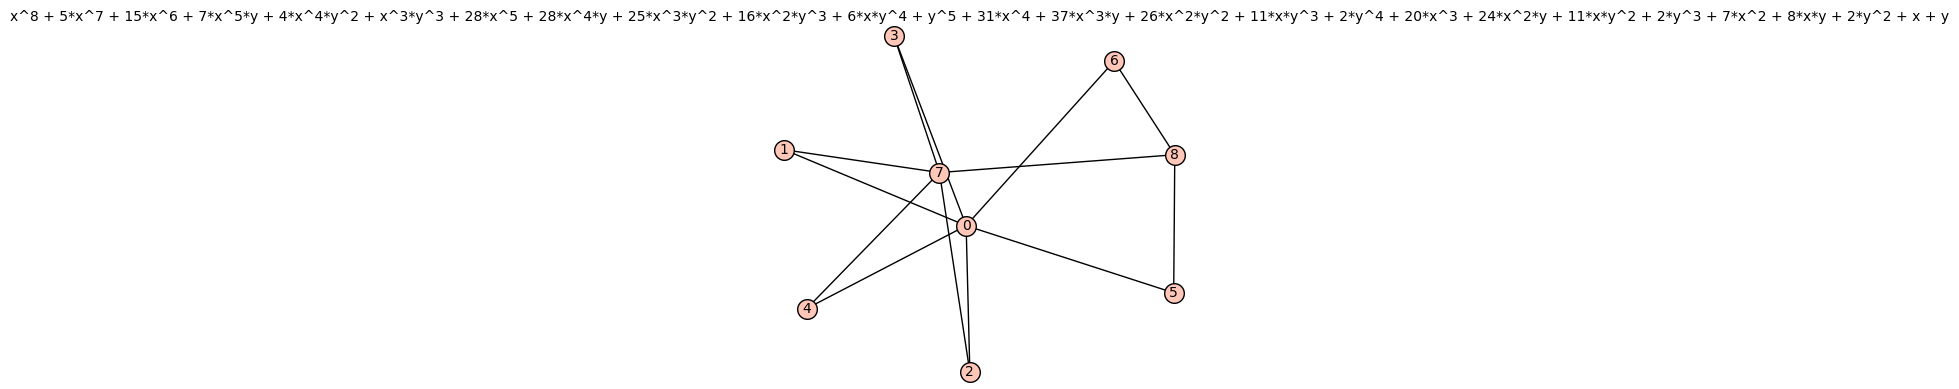

U??????oD?Q?a?`?OOAA?GO?P??P??H??A_??W??


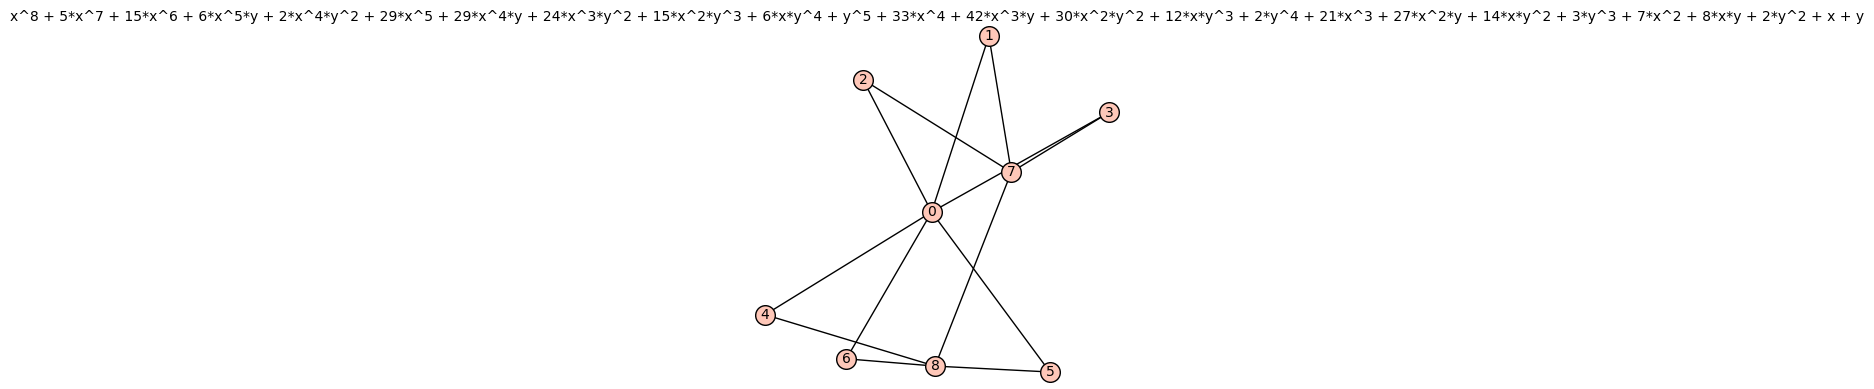

U??????oD?Q?a?P?C_?g?B?@A?@C?AA??__??W??


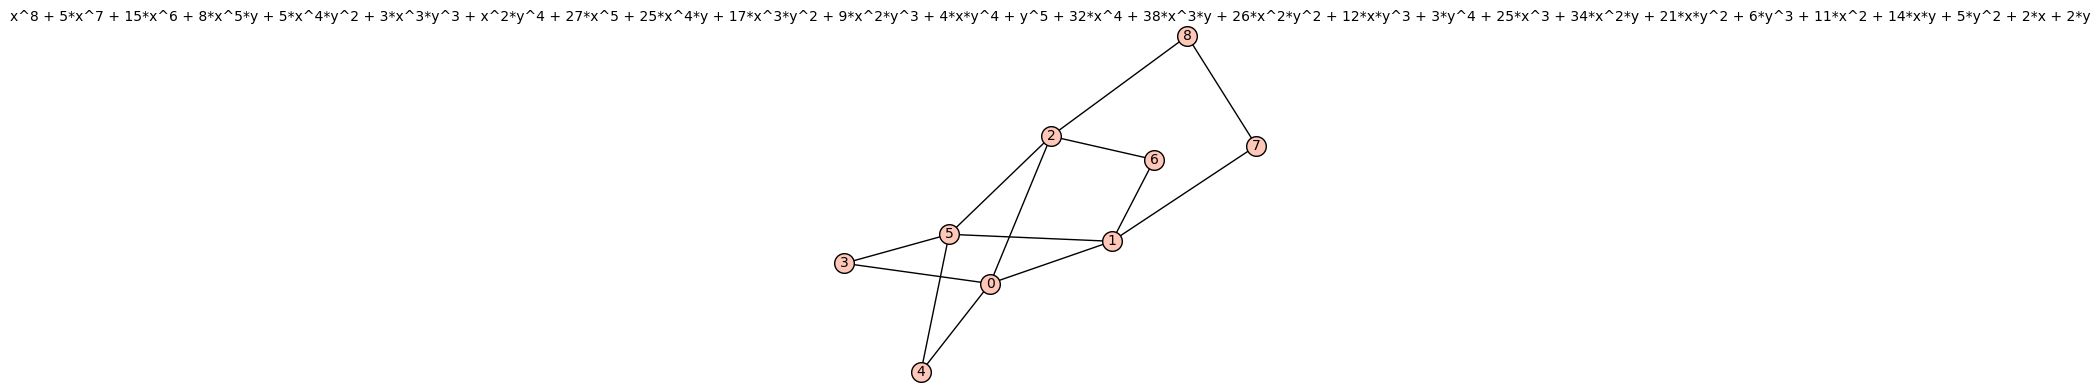

V???????E?S?c?a?O_AC?G_?Q??S??I??A_??S??@_??


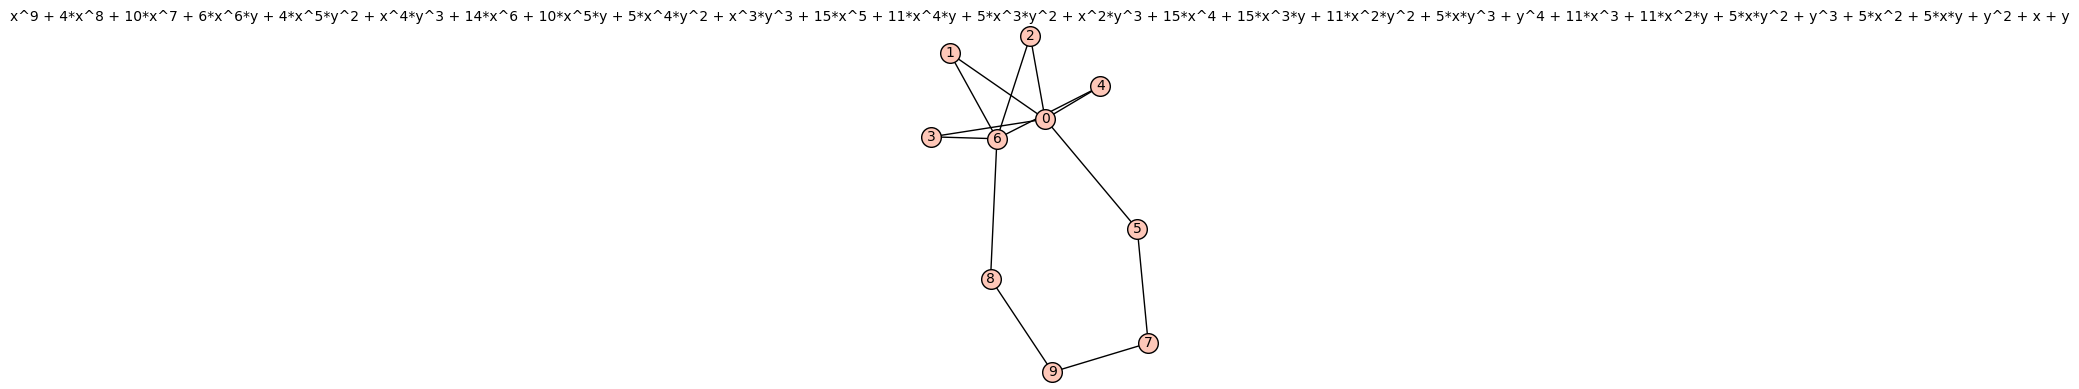

V???????E?S?c?a?O_AC?G_?Q??Q??E??C_??c??@_??


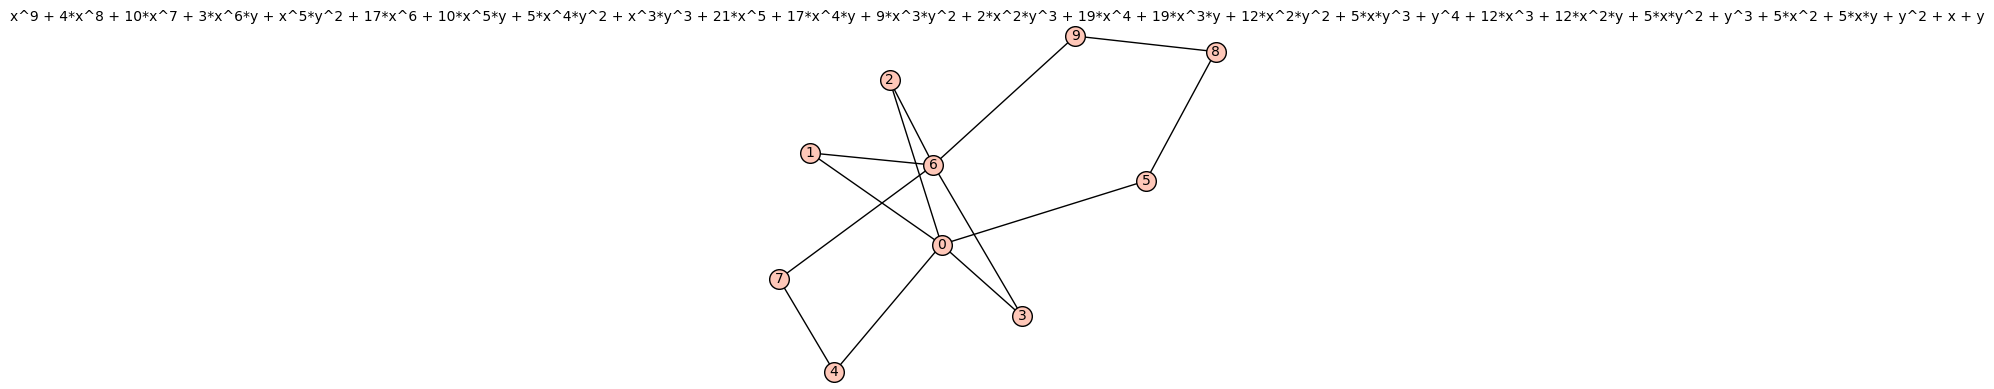

V???????E?S?c?a?O_AC?G_?Q??Q??E??C_??S??@_??


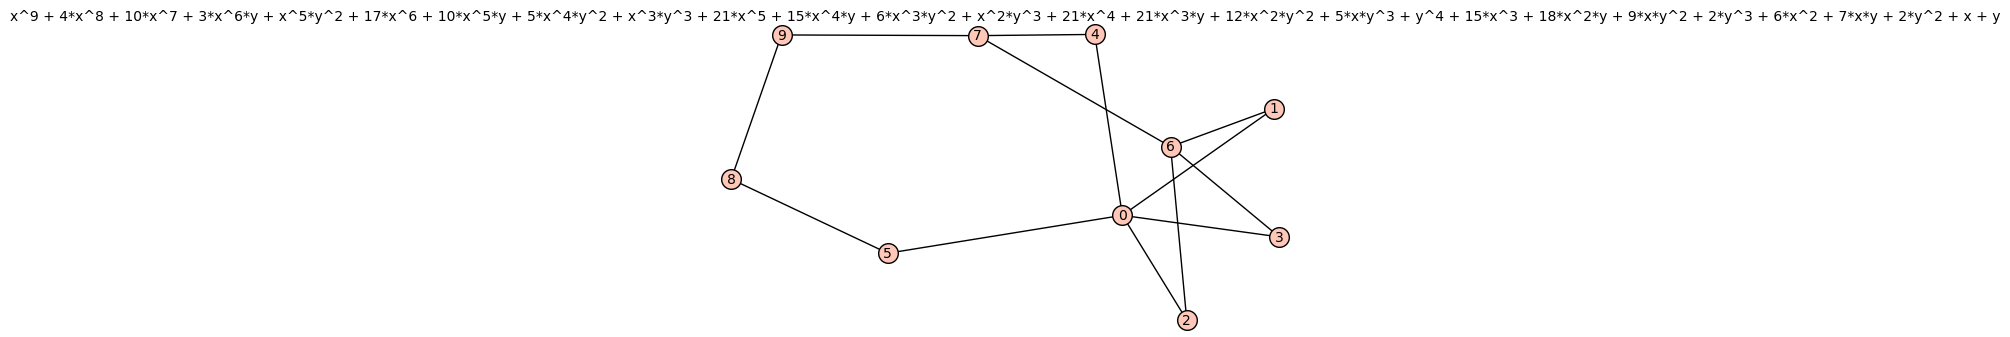

V???????E?S?c?a?O_AC?G_?Q??Q??H??AO??S??@_??


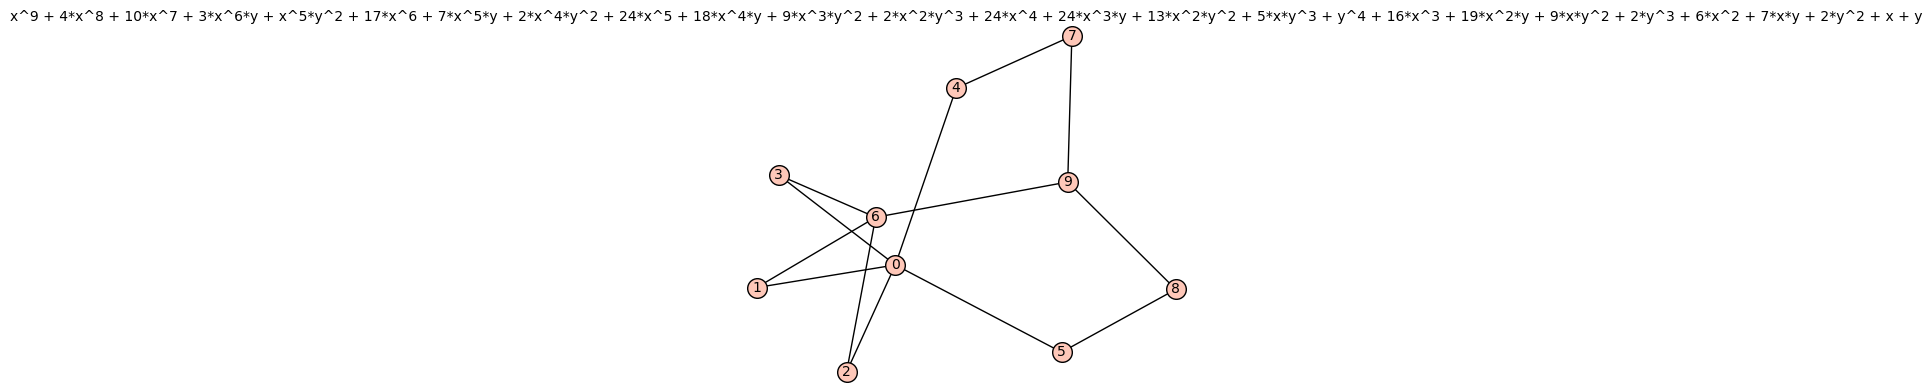

V???????E?S?c?a?O_AC?G_?P??Q??E??C_??c??@_??


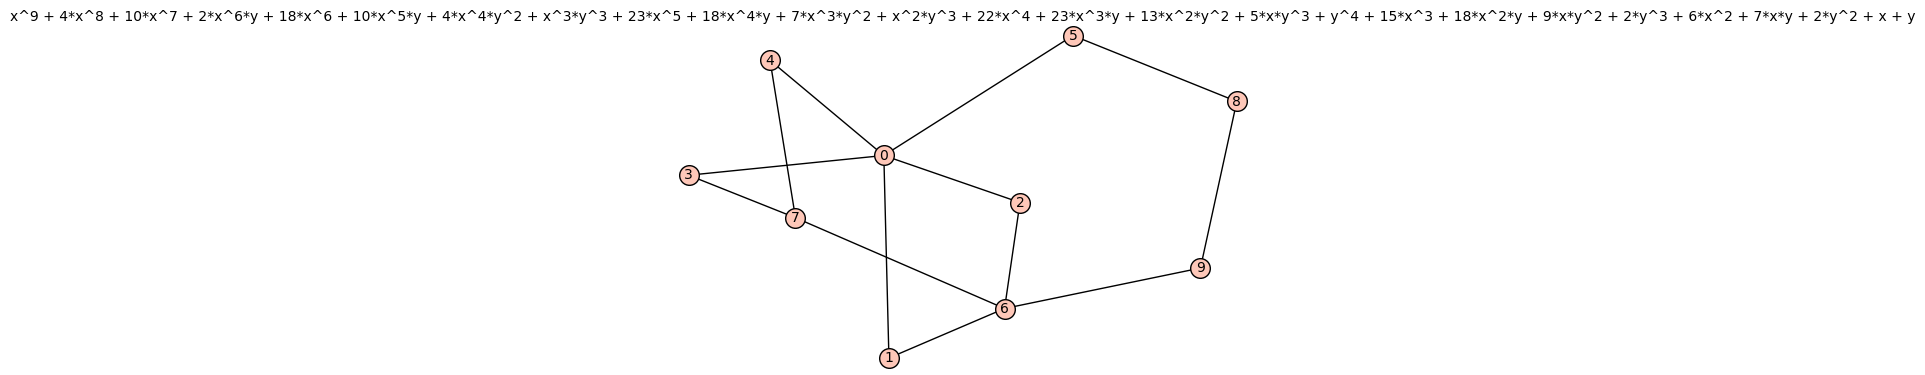

V???????E?S?c?a?O_AC?G_?P??E??P??A_?@C??C_??


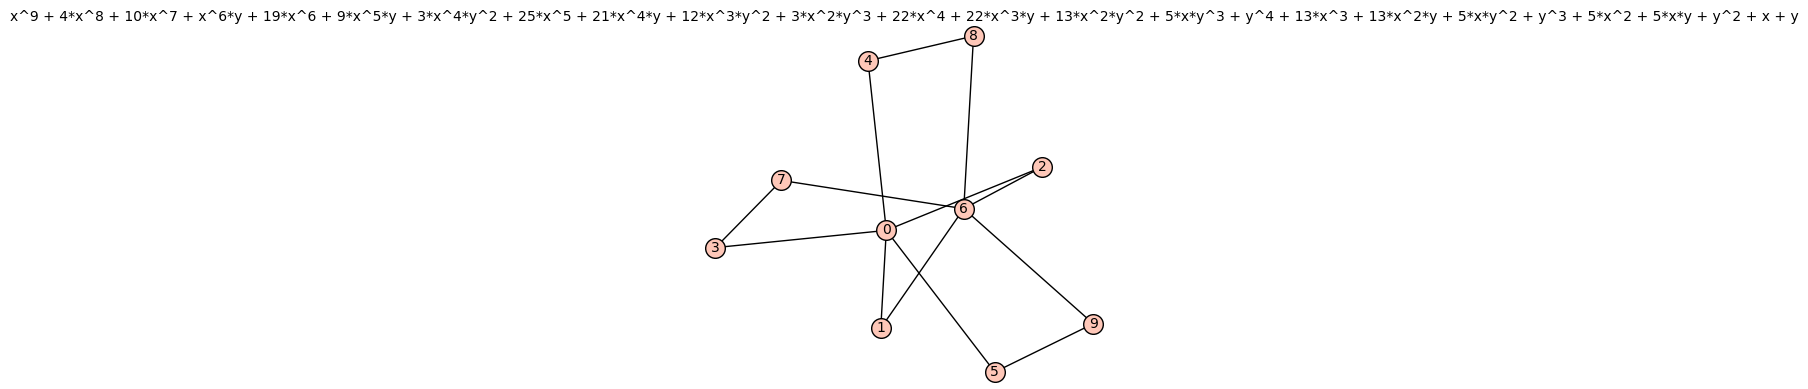

V???????E?S?c?a?O_AC?G_?P??E??P??A_?@C??A_??


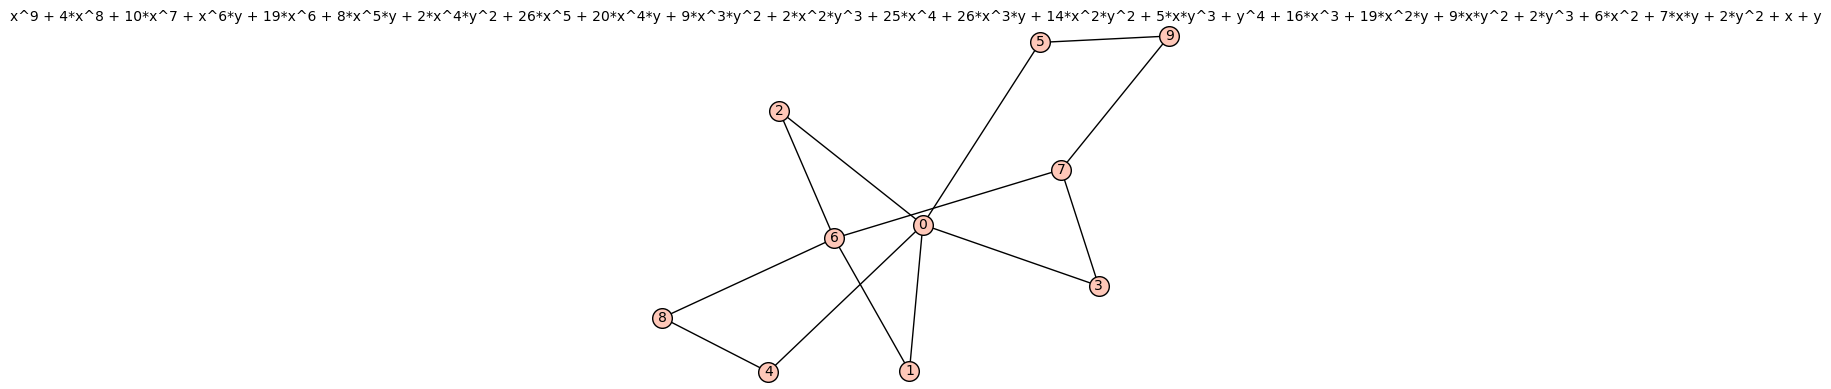

V???????E?S?c?a?O_AC?G_?P??E??P??@_?@C??A_??


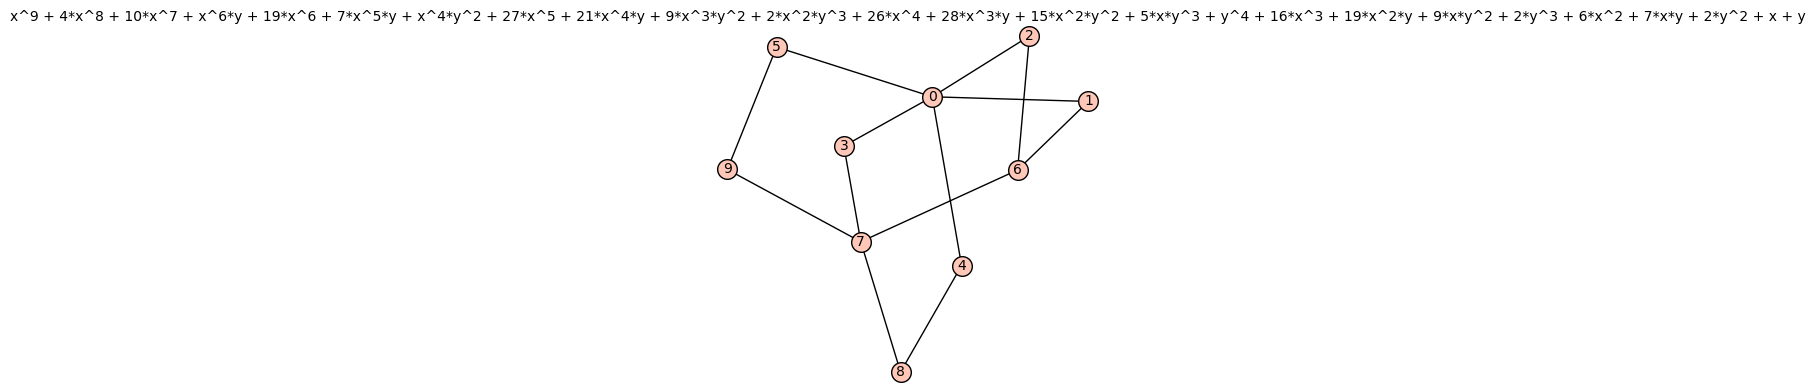

V???????E?S?c?a?G_@G?C_?I??I??E??C_??c??@_??


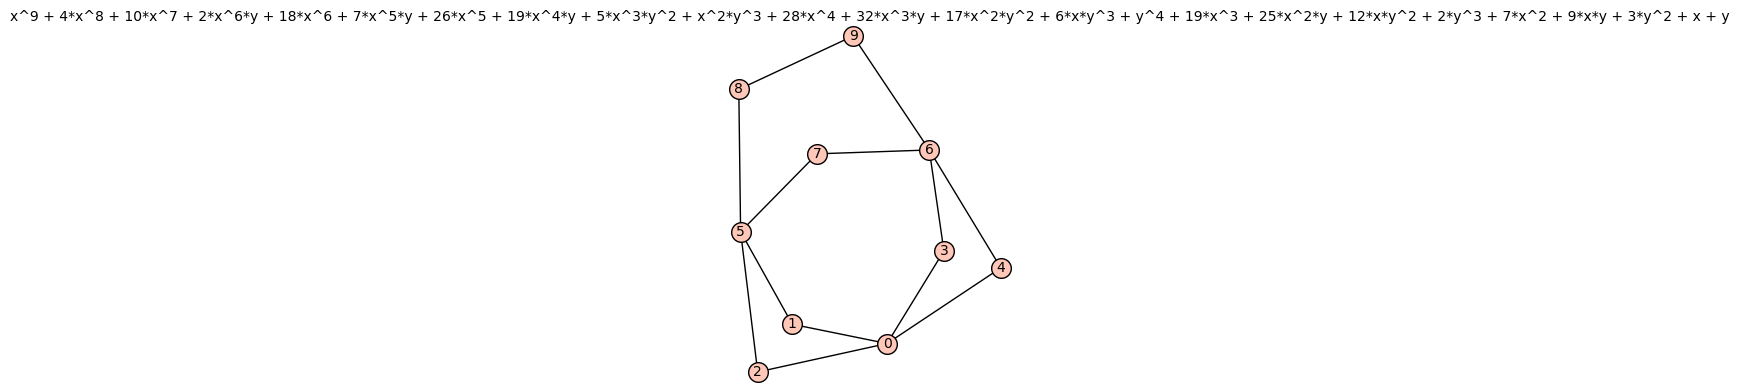

V???????E?S?c?a?G_@G?C_?E??a??P??C_??S??@_??


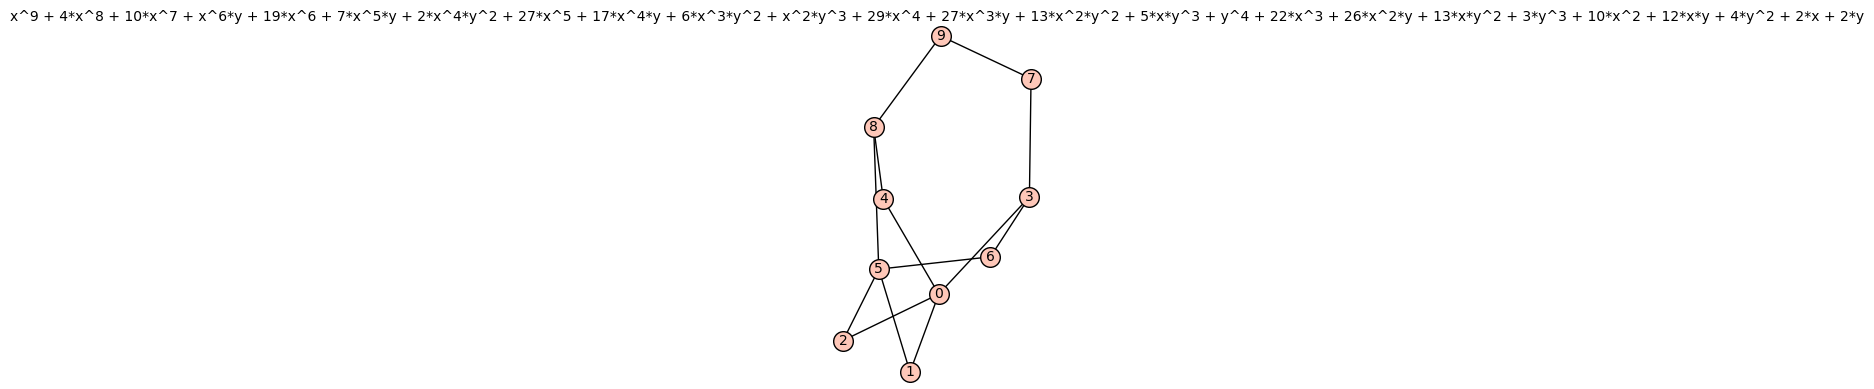

V???????E?S?c?a?G_AC?GO?D??`??D??@_?AC??A_??


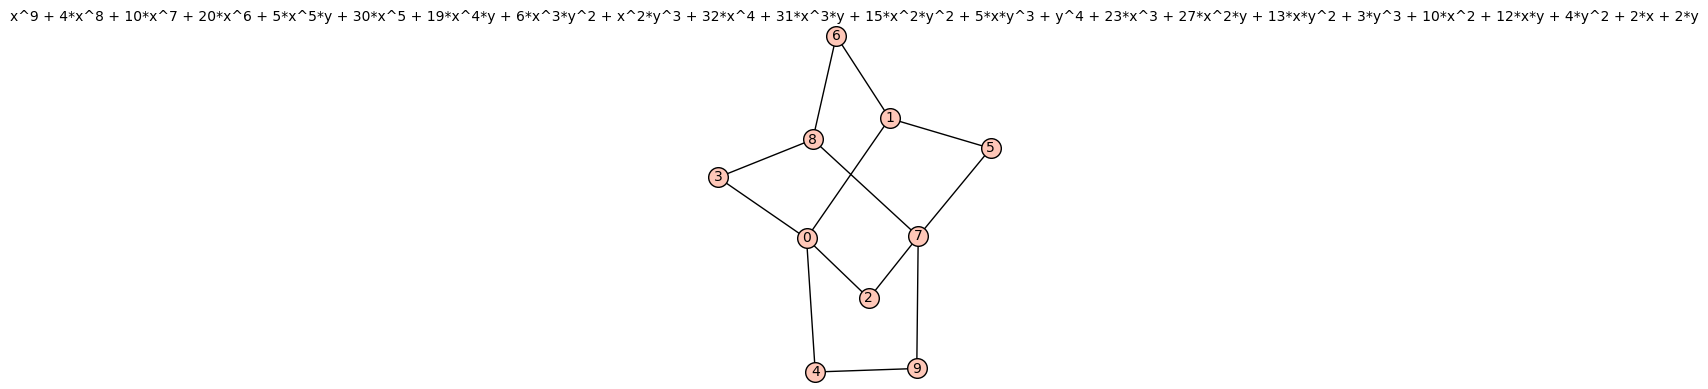

W?????????W?g?c?P?AG?H??S??S??I??A_??S??@O??B??


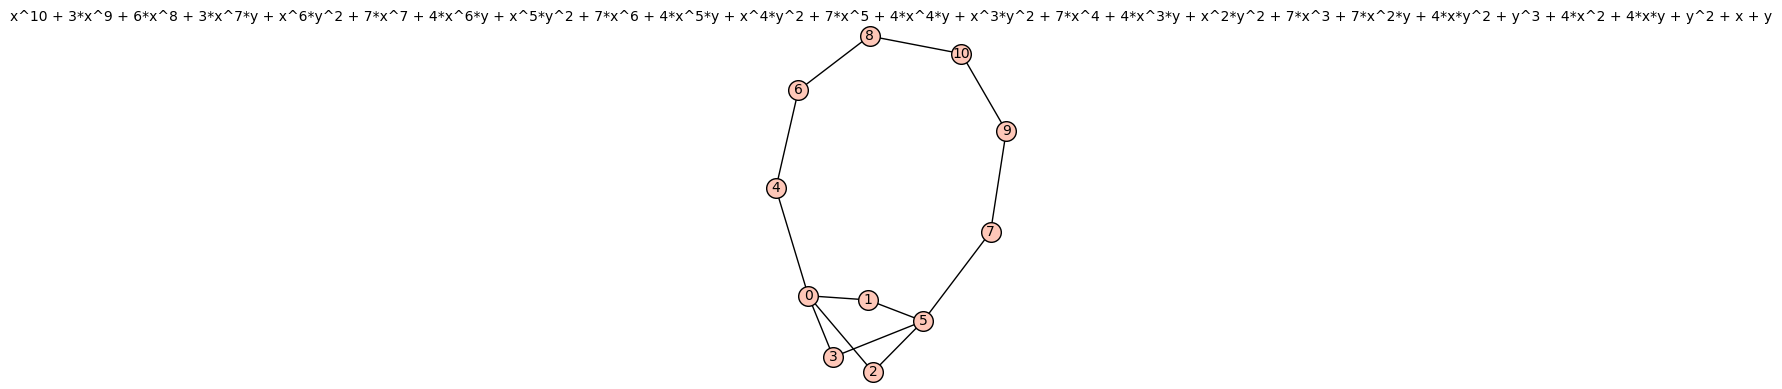

W?????????W?g?c?P?AG?H??Q??K??Q??C_??S??@O??B??


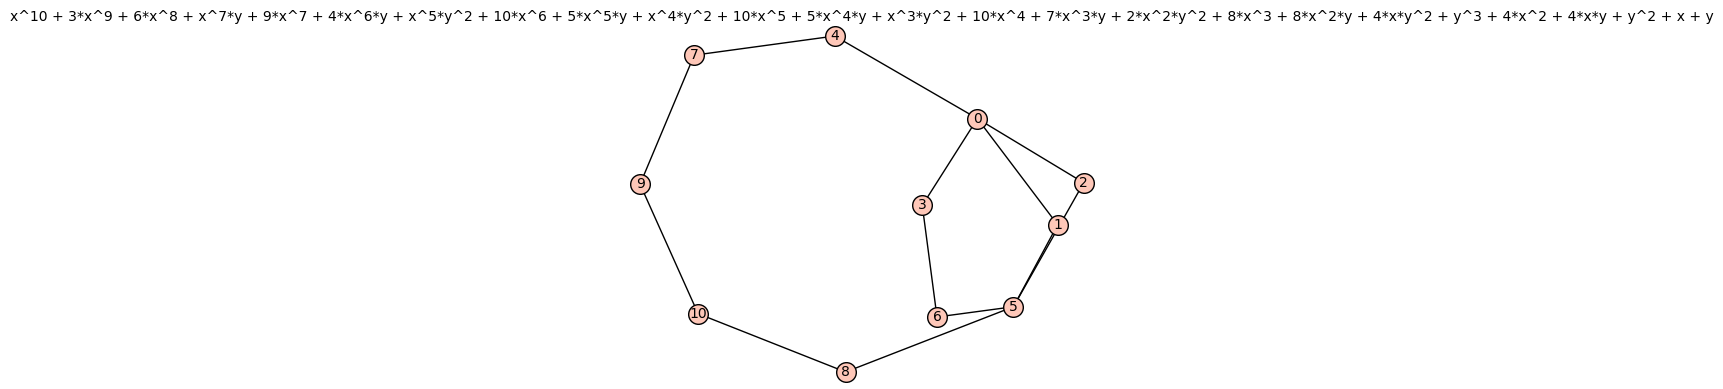

W?????????W?g?c?P?AG?H??Q??K??Q??A_??S??@O??B??


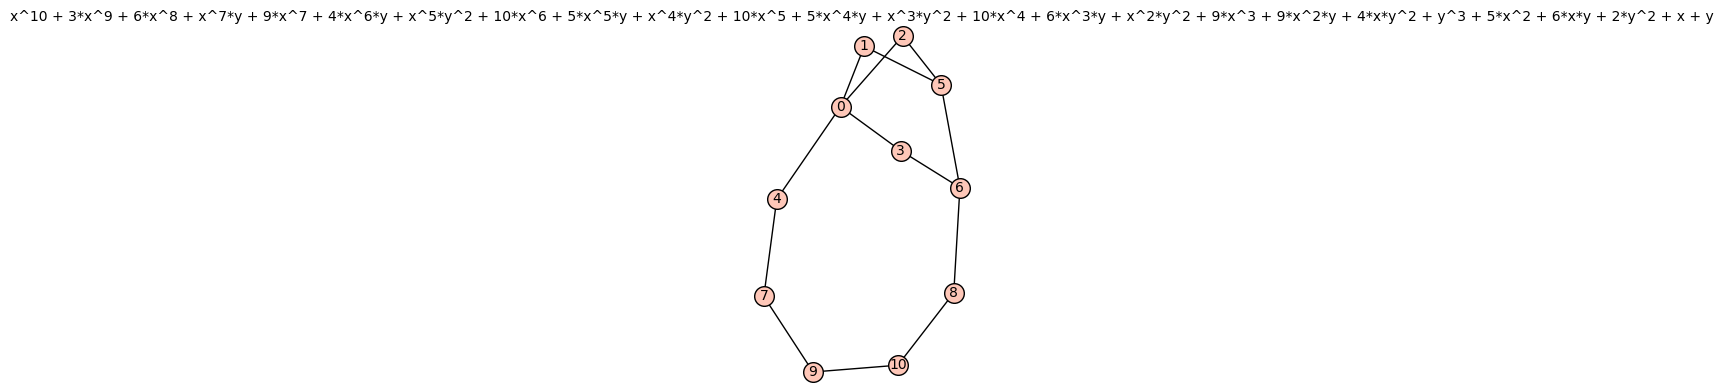

W?????????W?g?c?P?AG?H??Q??Q??H??A_?@C??AO??B??


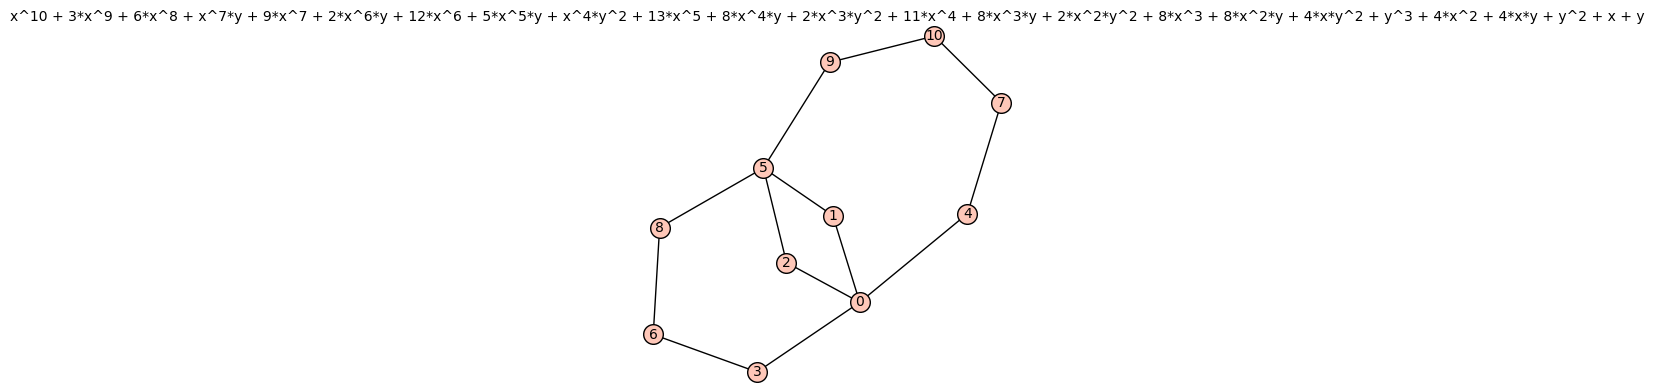

W?????????W?g?c?P?AG?H??Q??Q??H??A_??S??@O??B??


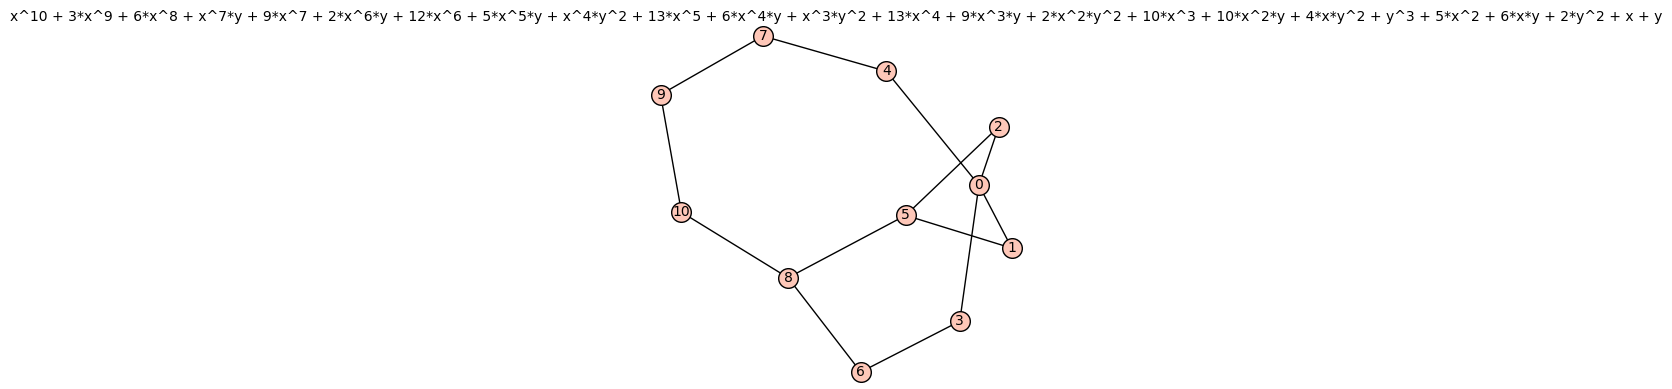

W?????????W?g?c?P?AG?H??Q??Q??H??AO??K??AO??D??


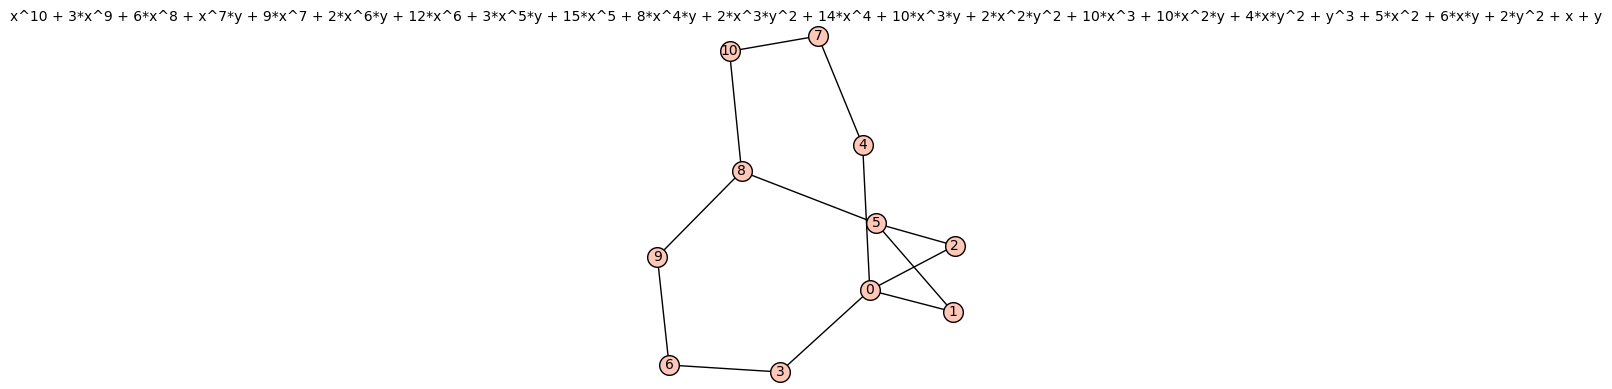

W?????????W?g?c?P?AG?G_?E??a??I??G_?@C??@O??B??


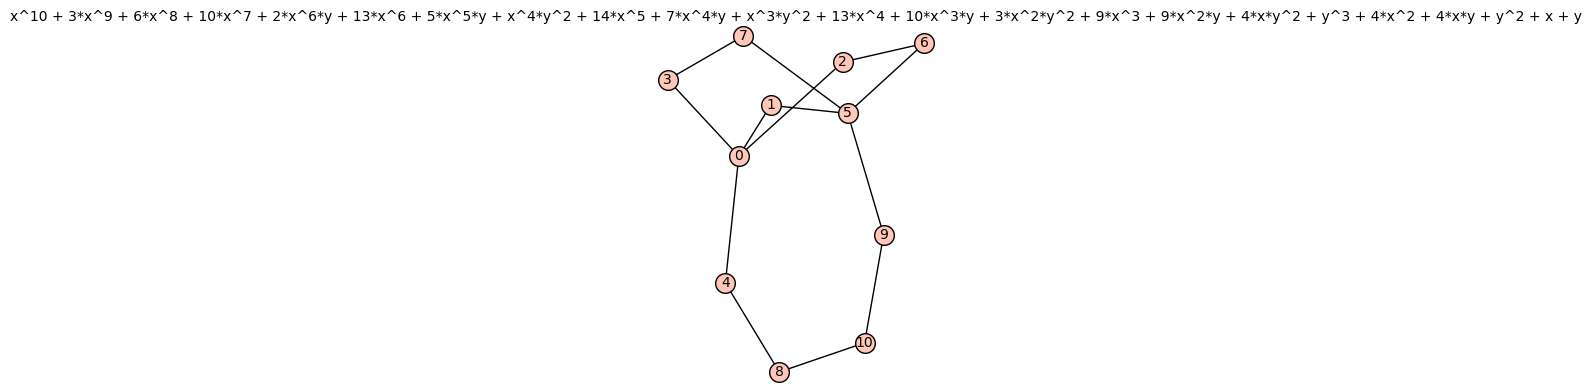

W?????????W?g?c?P?AG?G_?E??a??I??G_??c??@O??B??


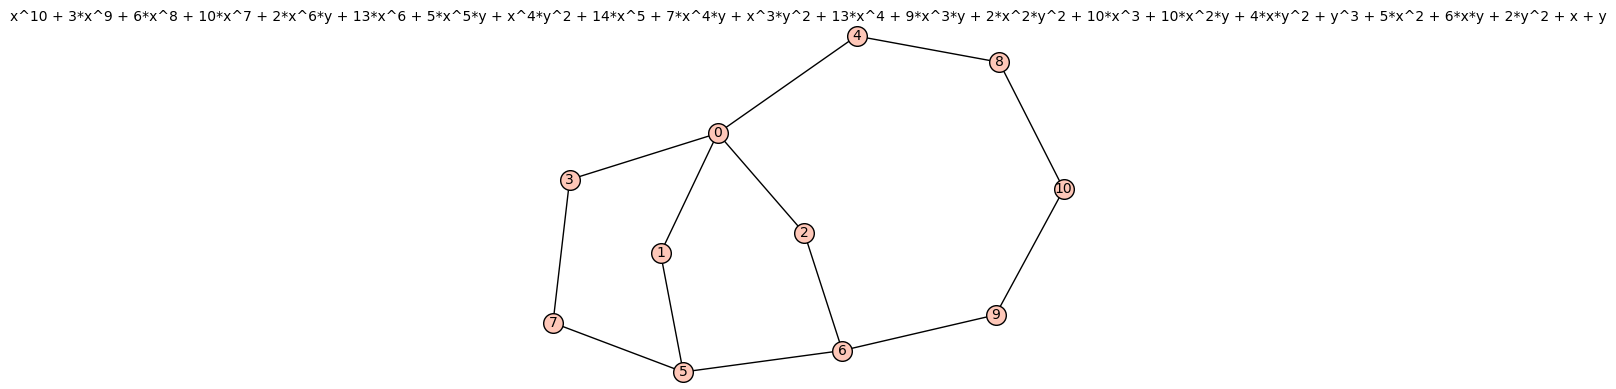

W?????????W?g?c?P?AG?G_?E??a??P??CO??S??GO??D??


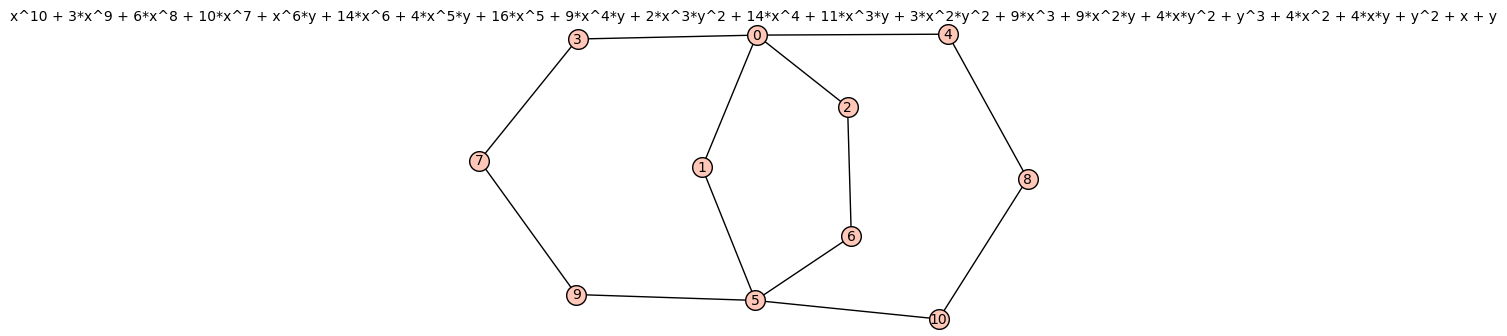

W?????????W?g?c?P?AG?G_?E??a??P??CO??S??CO??D??


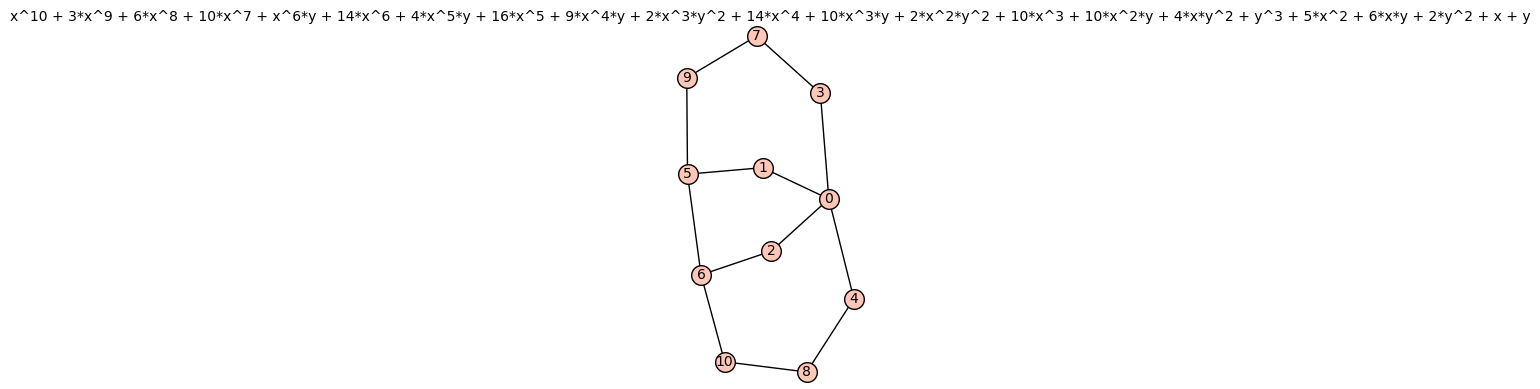

W?????????W?g?c?P?AG?G_?E??a??P??CO??S??@O??B??


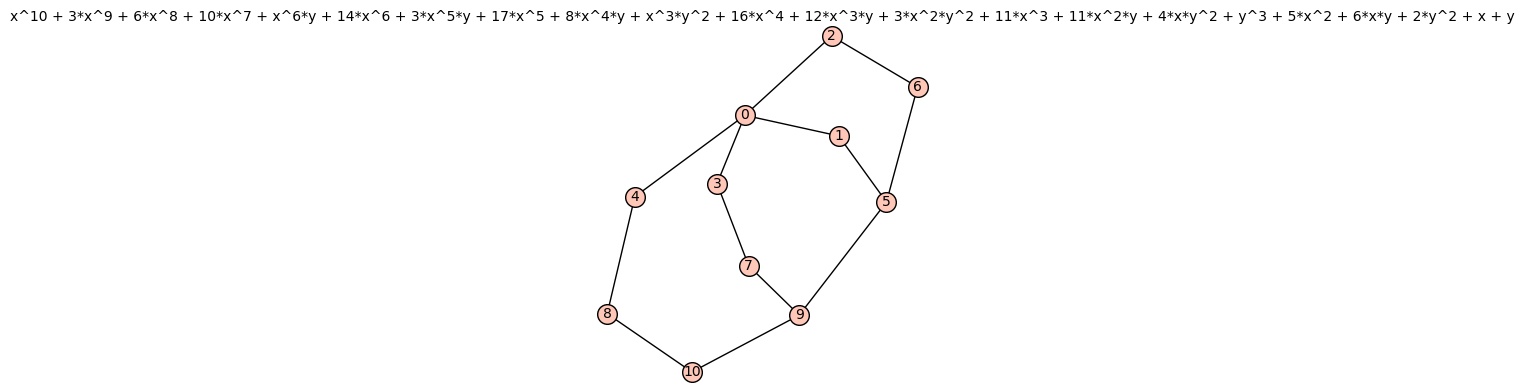

W?????????W?g?c?P?AG?G_?P??P??G_?AO??S??GO??D??


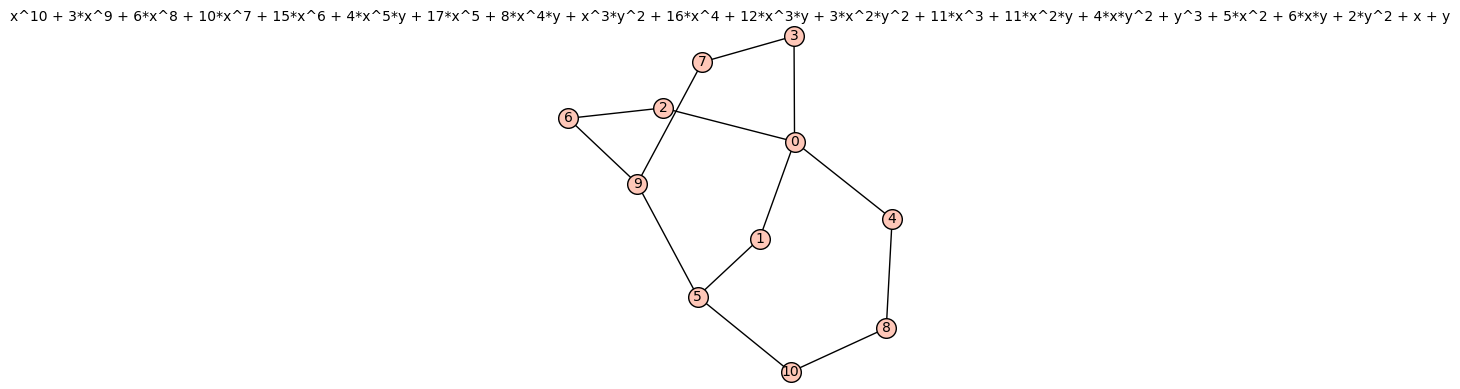

W?????????W?g?c?P?AG?G_?P??P??G_?AO??S??@O??B??


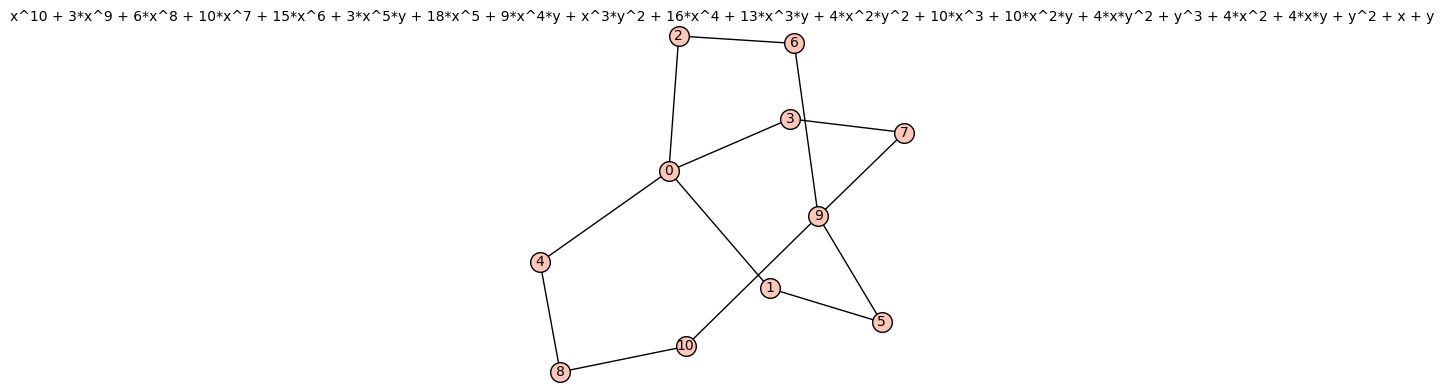

W?????????W?g?c?P?AG?G_?P??P??G_?AO??Q??@O??B??


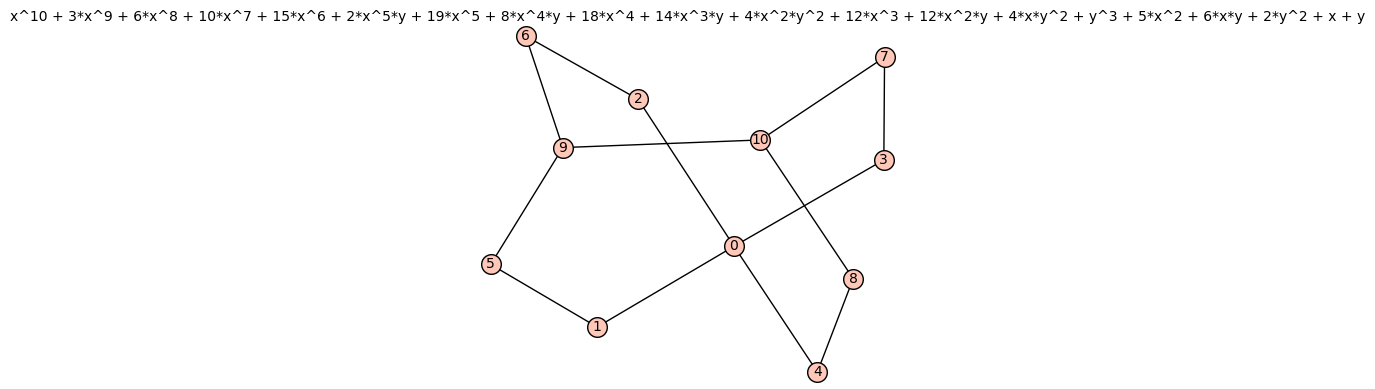

W?????????W?g?c?H?@G?C_?H??I??P??A_?@C??CO??B??


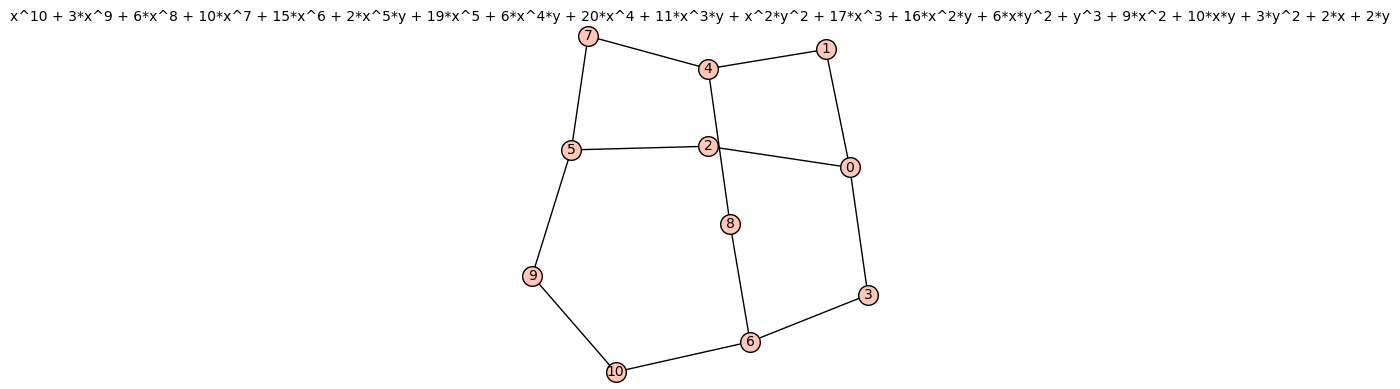

X???????????o?g?Q?AO?I??S??S??I??A_??S??@O??A_??B??


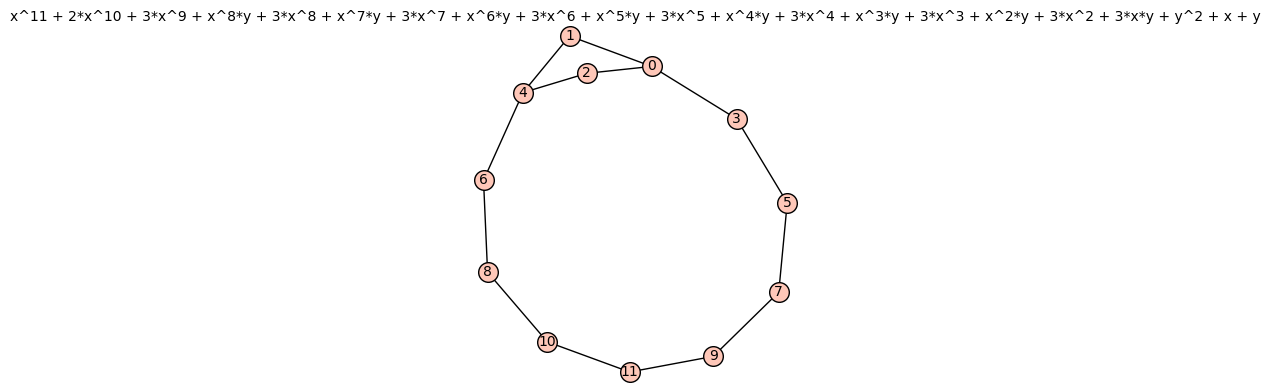

X???????????o?g?Q?AO?H??K??c??Q??A_??S??@O??A_??B??


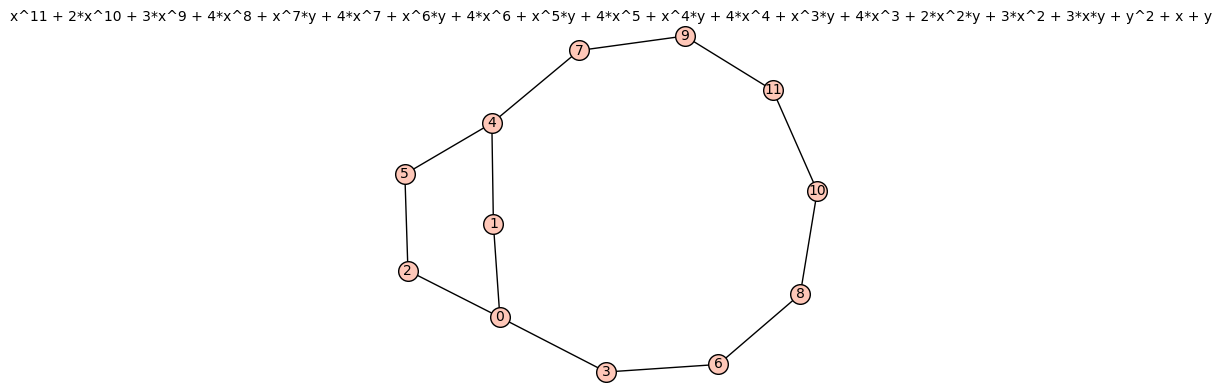

X???????????o?g?Q?AO?H??Q??Q??I??G_??c??@O??A_??B??


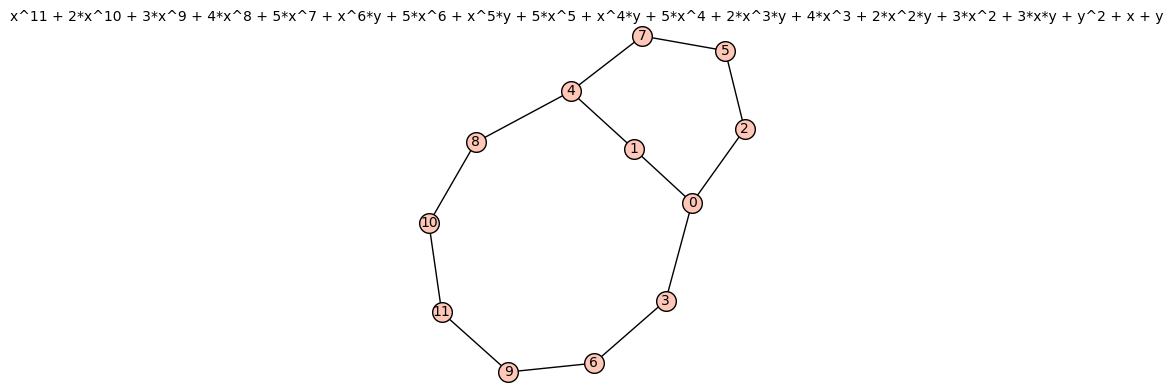

X???????????o?g?Q?AO?H??Q??Q??I??A_??S??@O??A_??B??


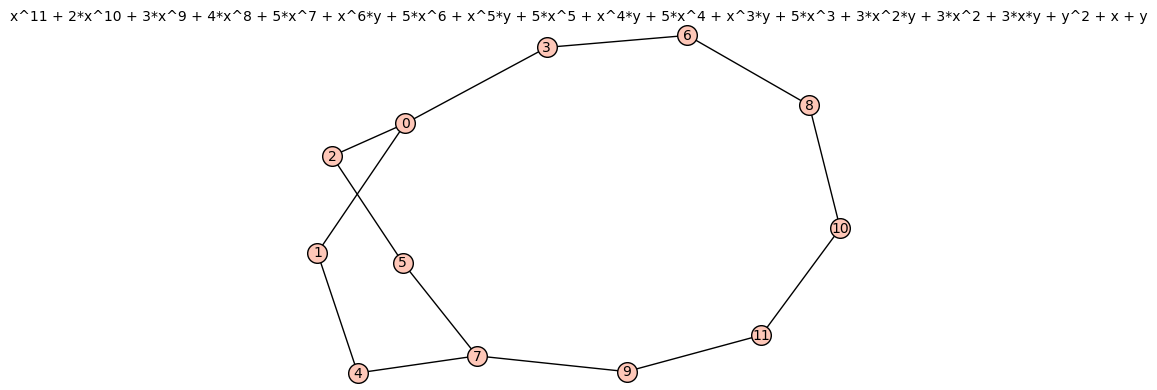

X???????????o?g?Q?AO?H??Q??Q??P??CO??S??CO??C_??B??


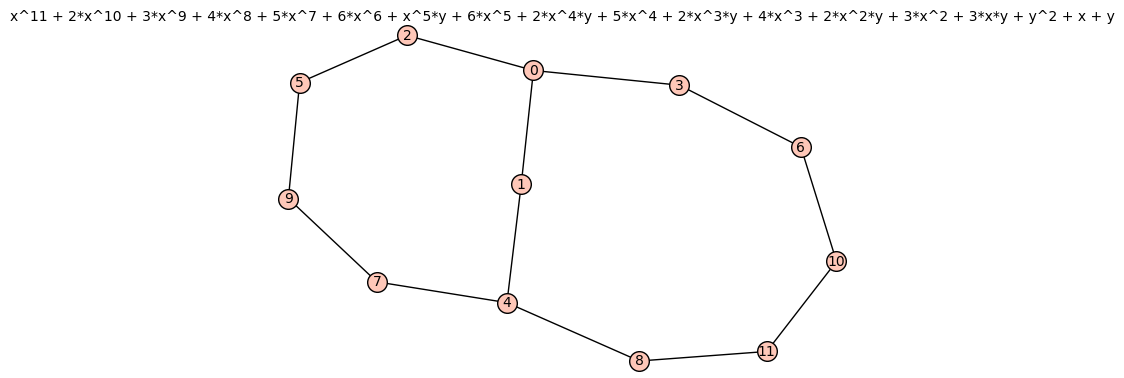

X???????????o?g?Q?AO?H??Q??Q??H??@_??c??AO??A_??B??


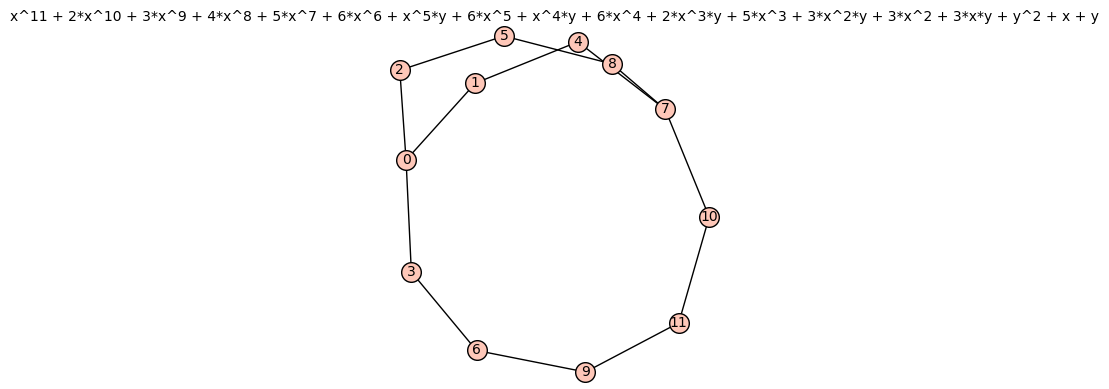

X???????????o?g?Q?AO?H??Q??Q??H??AO??Q??@O??G_??D??


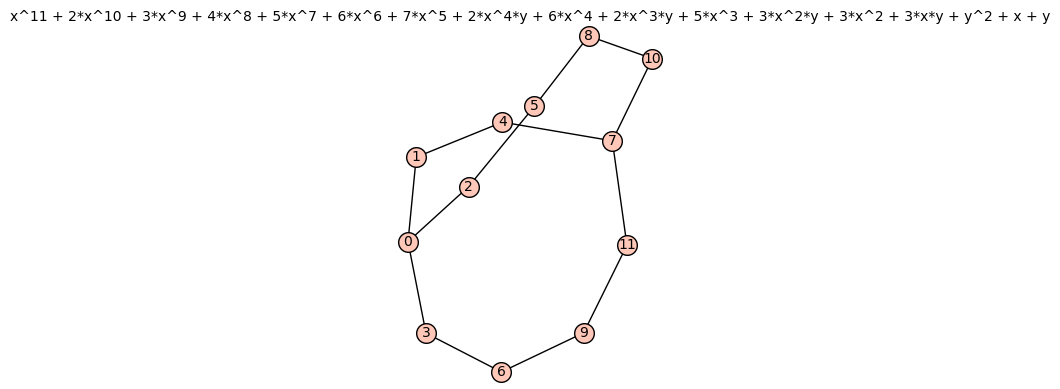

X???????????o?g?Q?AO?H??Q??Q??H??AO??Q??@O??A_??B??


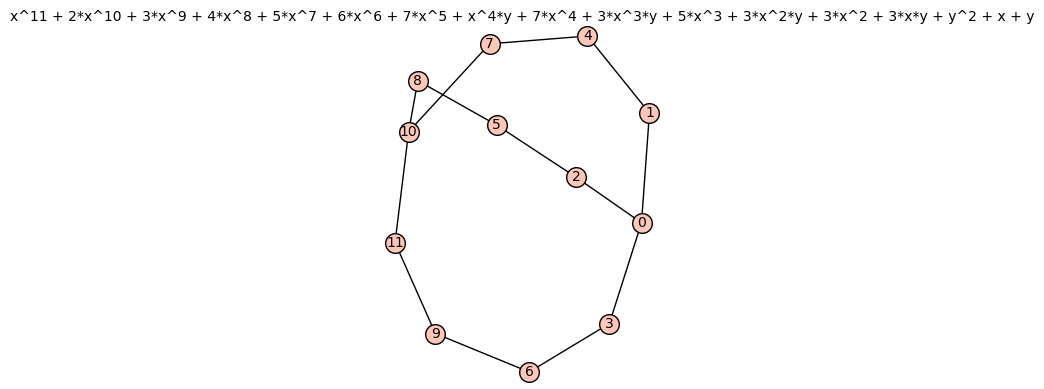

Y?????????????o?S?A_?I??S??S??I??A_??S??@O??A_??A_??@_??


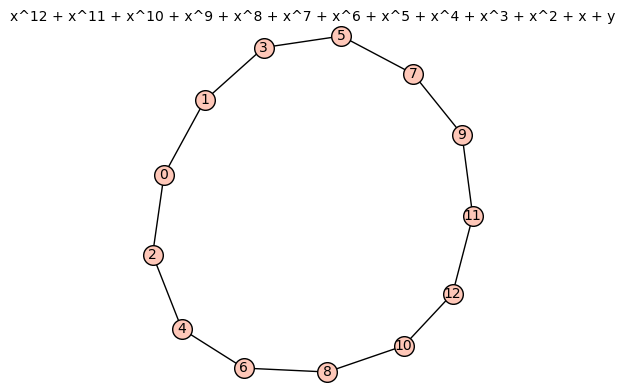

V??????oD?Q?a?`?OOCA?OG?__?`??P??C_??g??B???


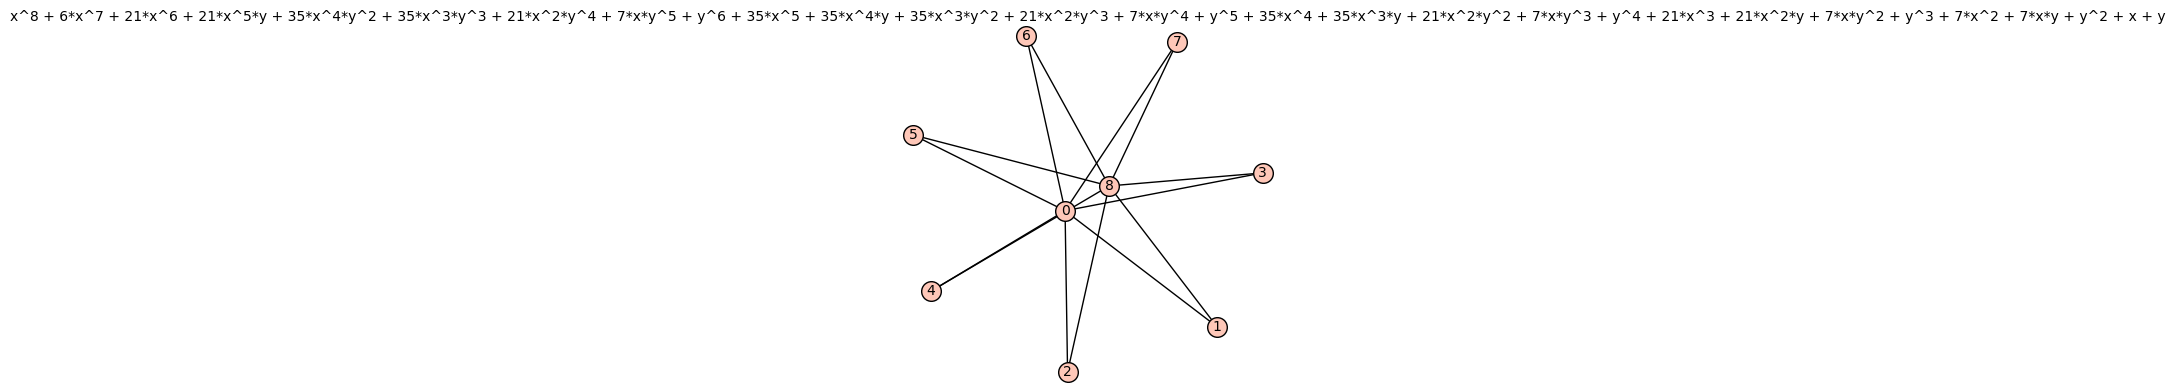

V??????oD?Q?a?`?GO@C?C_?I??K?AA??`??OG?@@???


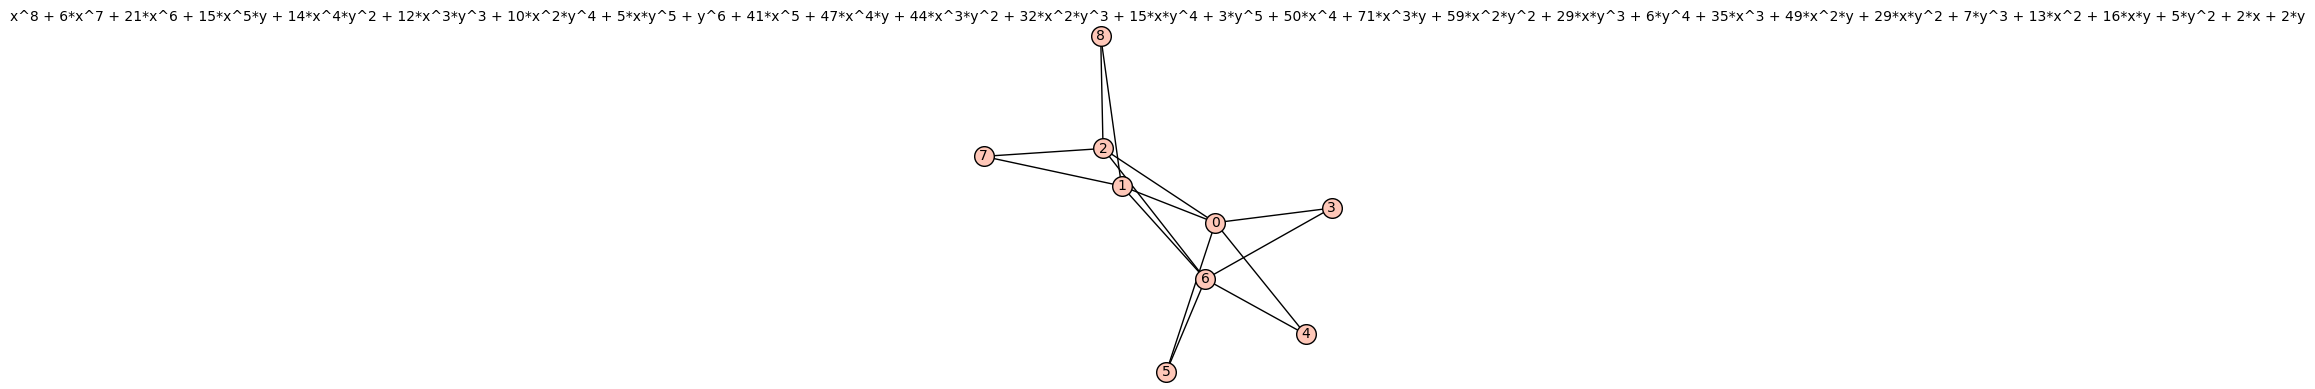

W???????E?S?c?a?O_CC?OO?`??a??Q??D???g??A_??E??


KeyboardInterrupt: 

In [103]:
plotGraphsFromG6(list(g6_has_contraction_only.keys()))